In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os, json, math, librosa

import IPython.display as ipd
import librosa.display

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

import sklearn.model_selection as sk

from sklearn.model_selection import train_test_split

In [48]:
MUSIC = r'C:\Users\bharg\Downloads\archive\Data\genres_original'
music_dataset = [] # File locations for each wav file 
genre_target = [] # 
for root, dirs, files in os.walk(MUSIC):
    for name in files:
        filename = os.path.join(root, name)
        if name!="jazz.00054.wav":
            music_dataset.append(filename)
            genre_target.append(filename.split("\\")[7])

In [50]:
print(set(genre_target))
print(music_dataset)

{'metal', 'pop', 'jazz', 'hiphop', 'reggae', 'rock', 'classical', 'country', 'blues', 'disco'}
['C:\\Users\\bharg\\Downloads\\archive\\Data\\genres_original\\blues\\blues.00000.wav', 'C:\\Users\\bharg\\Downloads\\archive\\Data\\genres_original\\blues\\blues.00001.wav', 'C:\\Users\\bharg\\Downloads\\archive\\Data\\genres_original\\blues\\blues.00002.wav', 'C:\\Users\\bharg\\Downloads\\archive\\Data\\genres_original\\blues\\blues.00003.wav', 'C:\\Users\\bharg\\Downloads\\archive\\Data\\genres_original\\blues\\blues.00004.wav', 'C:\\Users\\bharg\\Downloads\\archive\\Data\\genres_original\\blues\\blues.00005.wav', 'C:\\Users\\bharg\\Downloads\\archive\\Data\\genres_original\\blues\\blues.00006.wav', 'C:\\Users\\bharg\\Downloads\\archive\\Data\\genres_original\\blues\\blues.00007.wav', 'C:\\Users\\bharg\\Downloads\\archive\\Data\\genres_original\\blues\\blues.00008.wav', 'C:\\Users\\bharg\\Downloads\\archive\\Data\\genres_original\\blues\\blues.00009.wav', 'C:\\Users\\bharg\\Downloads\\arch

In [51]:
audio_path = music_dataset[300]
print(audio_path)
x , sr = librosa.load(audio_path)
librosa.load(audio_path, sr=None)

ipd.Audio(audio_path)

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00000.wav


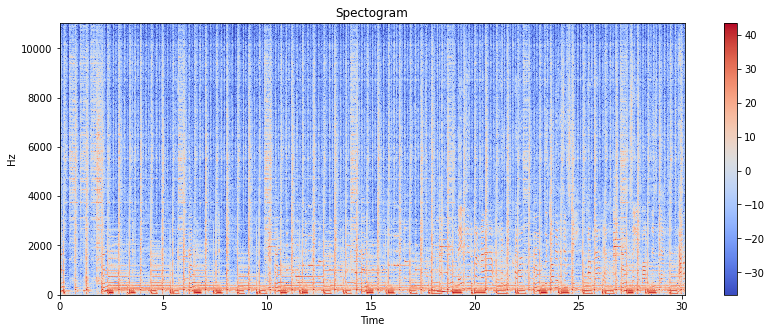

In [52]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectogram')
plt.colorbar()

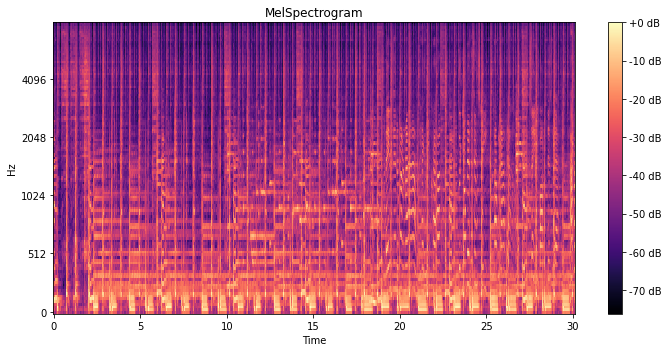

In [53]:
file_location = audio_path
y, sr = librosa.load(file_location)
melSpec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(melSpec_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MelSpectrogram")
plt.tight_layout()
plt.show()

In [68]:
DATASET_PATH = r'C:\Users\bharg\Downloads\archive\Data\genres_original'
JSON_PATH = "C:/Users/bharg/Downloads/data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """
    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("\\")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
            
                if file_path != r'C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00054.wav':

                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                
                    # process all segments of audio file
                    for d in range(num_segments):

                        # calculate start and finish sample for current segment
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                        # extract mfcc
                        mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T

                        # store only mfcc feature with expected number of vectors
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, d+1))
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [69]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=6)


Processing: blues


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.10546875 -0.1083374
 -0.10559082], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13705444 -0.16964722 -0.19995117 ...  0.07623291  0.07675171
  0.08129883], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08428955  0.0763855   0.06439209 ... -0.07147217 -0.00927734
  0.06085205], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00000.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00000.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00000.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00000.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00000.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00000.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00341797 0.00430298 0.00137329 ... 0.17630005 0.1918335  0.19845581], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1873169  0.18701172 0.18460083 ... 0.03823853 0.0512085  0.05776978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05435181  0.0461731   0.03518677 ... -0.18508911 -0.17944336
 -0.18041992], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00001.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00001.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00001.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00001.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00001.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00001.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01901245 0.04769897 0.02941895 ... 0.09967041 0.07192993 0.03436279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01507568 0.02926636 0.06259155 ... 0.14886475 0.18649292 0.22128296], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.23410034  0.23449707  0.2268982  ... -0.03213501 -0.0440979
 -0.03842163], sr=22050 as keyword args. From version 0.10 passing these

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00002.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00002.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00002.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00002.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00002.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00002.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01300049 -0.03060913 -0.03607178 ... -0.02127075 -0.02270508
 -0.02429199], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02426147 -0.02325439 -0.02151489 ...  0.04949951  0.02813721
  0.03616333], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03494263  0.01724243  0.01293945 ... -0.01873779 -0.03579712
 -0.05276489], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00003.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00003.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00003.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00003.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00003.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00003.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00631714 -0.00927734 -0.0083313  ...  0.05923462  0.09005737
  0.11685181], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10723877  0.08538818  0.04443359 ... -0.00738525  0.01171875
  0.03359985], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11462402  0.17321777  0.0831604  ...  0.00439453  0.00033569
 -0.00268555], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00004.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00004.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00004.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00004.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00004.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00004.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02429199 -0.02975464 -0.00961304 ... -0.13632202 -0.13946533
 -0.14175415], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1182251  -0.07867432 -0.03747559 ...  0.08303833  0.03665161
 -0.05581665], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11572266 -0.11044312 -0.09112549 ... -0.02719116 -0.0333252
 -0.03308105], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00005.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00005.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00005.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00005.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00005.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00005.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1822815  0.28302002 0.21020508 ... 0.02032471 0.03250122 0.05053711], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06515503  0.06848145  0.05596924 ... -0.00094604  0.00170898
  0.00189209], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00018311 -0.0022583  -0.00405884 ... -0.00250244 -0.00366211
 -0.00396729], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00006.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00006.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00006.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00006.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00006.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00006.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00007.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00007.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00007.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00007.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00007.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07342529 -0.06307983 -0.05728149 ...  0.03665161  0.02890015
  0.02288818], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02874756 0.03726196 0.04641724 ... 0.02862549 0.02819824 0.02709961], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02706909 0.02624512 0.02154541 ... 0.22012329 0.23760986 0.24203491], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00008.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00008.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00008.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00008.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00008.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00008.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04647827 0.06399536 0.04327393 ... 0.2348938  0.3913269  0.4925232 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.5291748   0.4706726   0.37457275 ... -0.0239563  -0.04330444
 -0.04171753], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0262146  -0.03067017 -0.0255127  ...  0.00582886  0.02511597
  0.01361084], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00009.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00009.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00009.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00009.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00009.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00009.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12014771  0.14956665  0.10458374 ...  0.03308105 -0.04156494
 -0.06967163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13433838 -0.2687378  -0.3986206  ... -0.0284729  -0.03012085
 -0.03121948], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03167725 -0.03213501 -0.03256226 ...  0.01306152  0.01287842
  0.00836182], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00010.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00010.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00010.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00010.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00010.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00010.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02560425 -0.03881836 -0.03527832 ... -0.10412598 -0.1105957
 -0.11303711], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10650635 -0.09115601 -0.08016968 ... -0.01605225 -0.01483154
 -0.02703857], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00561523  0.01449585  0.00613403 ... -0.03079224 -0.02713013
 -0.02786255], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00011.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00011.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00011.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00011.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00011.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00011.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1854248   0.24972534  0.15673828 ... -0.14447021 -0.14654541
 -0.15072632], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15444946 -0.15255737 -0.14385986 ...  0.08346558  0.06848145
  0.06707764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06848145  0.06549072  0.05960083 ... -0.26522827 -0.25708008
 -0.25775146], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00012.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00012.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00012.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00012.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00012.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00012.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13864136 -0.20974731 -0.1781311  ...  0.11578369  0.11218262
  0.10943604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.10650635 0.09985352 0.0932312  ... 0.23364258 0.22528076 0.21691895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.22213745  0.23623657  0.26010132 ... -0.21240234 -0.19998169
 -0.16635132], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00013.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00013.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00013.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00013.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00013.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00013.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07705688 0.11590576 0.09234619 ... 0.01266479 0.01040649 0.00756836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 5.9204102e-03  4.0893555e-03 -2.4414062e-04 ...  4.1299438e-01
  2.9010010e-01  9.5947266e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06433105 -0.12081909 -0.00823975 ...  0.03042603  0.02670288
  0.02545166], sr=22050 as keyword args. From 

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00014.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00014.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00014.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00014.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00014.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00014.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03015137 -0.0453186  -0.04034424 ... -0.00338745 -0.00350952
 -0.00115967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00146484  0.00292969 -0.00137329 ... -0.03479004 -0.0300293
 -0.02566528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02792358 -0.03659058 -0.04278564 ...  0.12200928  0.10308838
  0.08880615], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00015.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00015.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00015.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00015.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00015.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00015.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02941895 -0.02072144  0.00424194 ... -0.06530762  0.08526611
  0.19134521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.19592285  0.07583618 -0.05200195 ... -0.13146973 -0.25888062
 -0.3517151 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.39562988 -0.37783813 -0.3381958  ...  0.05758667  0.06027222
  0.06469727], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00016.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00016.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00016.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00016.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00016.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00016.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02462769 0.03604126 0.02981567 ... 0.14996338 0.15411377 0.15292358], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14855957  0.14822388  0.15426636 ... -0.01281738 -0.01400757
 -0.02108765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02813721 -0.02371216 -0.00378418 ...  0.22491455  0.22433472
  0.20974731], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00017.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00017.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00017.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00017.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00017.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00017.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10031128 -0.1550293  -0.12982178 ... -0.05310059 -0.02459717
 -0.00473022], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00790405 -0.01605225 -0.02038574 ...  0.01016235  0.02197266
  0.0227356 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02145386  0.02761841  0.03097534 ... -0.06100464 -0.05944824
 -0.05975342], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00018.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00018.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00018.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00018.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00018.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00018.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00019.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00019.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00019.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00019.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00019.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07525635 -0.0737915  -0.07150269 ...  0.21780396  0.1937561
  0.1524353 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.11245728 0.08181763 0.04400635 ... 0.03326416 0.03619385 0.03985596], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04354858 0.04727173 0.0512085  ... 0.05636597 0.06231689 0.0696106 ], sr=22050 as keyword args. From version 0.10 passing these

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00020.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00020.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00020.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00020.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00020.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00020.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00021.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00021.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00021.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00021.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02484131 0.01660156 0.01382446 ... 0.0375061  0.02386475 0.01837158], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01443481  0.00180054 -0.01409912 ... -0.06619263 -0.07910156
 -0.08291626], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08105469 -0.08041382 -0.07846069 ... -0.24765015 -0.2559204
 -0.2383728 ], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00021.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00021.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00022.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00022.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0340271   0.03775024  0.04309082 ... -0.01495361 -0.01345825
 -0.01312256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07327271 -0.1105957  -0.10214233 ...  0.1494751   0.11270142
  0.09317017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1078186   0.13476562  0.13674927 ... -0.01730347 -0.01318359
 -0.00775146], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00022.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00022.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00022.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00022.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00756836  0.03662109  0.10736084 ... -0.07192993 -0.07550049
 -0.07693481], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07815552 -0.07571411 -0.07489014 ... -0.01925659 -0.05499268
 -0.02432251], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06433105  0.11526489  0.05886841 ... -0.05526733 -0.05532837
 -0.05535889], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00023.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00023.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00023.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00023.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00023.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00023.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0005188   0.00067139 -0.00146484 ... -0.04415894 -0.04940796
 -0.07214355], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09384155 -0.0920105  -0.07235718 ... -0.02175903 -0.01901245
 -0.01931763], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02062988 -0.01947021 -0.01806641 ...  0.09191895  0.09979248
  0.1104126 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00024.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00024.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00024.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00024.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00024.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00024.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03338623 -0.05020142 -0.03128052 ... -0.01687622 -0.01724243
 -0.0140686 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01345825 -0.01553345 -0.01599121 ... -0.10009766 -0.11477661
 -0.1270752 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1269226  -0.12728882 -0.13543701 ...  0.11273193  0.11004639
  0.10852051], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00025.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00025.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00025.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00025.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00025.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00025.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00026.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00026.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00026.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00026.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00026.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01965332 -0.01919556 -0.01608276 ...  0.07125854  0.07321167
  0.07556152], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07565308 0.07696533 0.07998657 ... 0.05249023 0.04501343 0.03515625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02267456  0.0067749  -0.00784302 ... -0.14633179 -0.15011597
 -0.13809204], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00027.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00027.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00027.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00027.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00027.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00028.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00028.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00028.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00028.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03656006 -0.09091187 -0.08691406 ... -0.02178955 -0.01571655
  0.00387573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02670288 0.04559326 0.05795288 ... 0.26974487 0.2947998  0.3159485 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.3132019   0.29333496  0.27679443 ... -0.10595703 -0.14733887
 -0.18197632], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00028.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00028.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12948608 -0.10623169 -0.07168579 ...  0.00036621  0.00213623
  0.01327515], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01669312 -0.02764893 -0.02191162 ...  0.01971436  0.02206421
  0.02130127], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00029.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00029.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00029.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00029.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00029.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00029.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02099609 0.02374268 0.02542114 ... 0.03582764 0.05187988 0.05566406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06369019 0.08068848 0.08782959 ... 0.01925659 0.01803589 0.03262329], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01010132 0.00131226 0.0173645  ... 0.04650879 0.07772827 0.09347534], sr=22050 as keyword args. From version 0.10 passing these as po

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00030.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00030.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00030.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00030.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00030.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00030.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00031.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00031.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00354004  0.00198364 -0.01864624 ...  0.05871582  0.06317139
  0.05932617], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04916382 0.05947876 0.05026245 ... 0.12417603 0.13128662 0.13006592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13305664  0.13504028  0.13204956 ... -0.05822754 -0.04067993
 -0.01419067], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00031.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00031.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00031.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00031.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00032.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00032.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00032.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00032.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00032.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00032.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00836182 -0.01040649 -0.01641846 ... -0.16809082 -0.162323
 -0.15975952], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16964722 -0.16500854 -0.15234375 ...  0.21289062  0.2060852
  0.18609619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.212677   0.19619751 0.22827148 ... 0.04605103 0.0333252  0.02975464], sr=22050 as keyword args. From version 0.10 passing 

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00033.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00033.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00033.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00033.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00033.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00033.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01361084  0.02810669  0.03515625 ... -0.10678101 -0.11340332
 -0.13491821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14489746 -0.14572144 -0.16091919 ...  0.19390869  0.19433594
  0.19503784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.20062256  0.19299316  0.18707275 ... -0.02099609 -0.03457642
 -0.04580688], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00034.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00034.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00034.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00034.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00034.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00034.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03277588 -0.04876709 -0.04104614 ...  0.24972534  0.25030518
  0.2548828 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.20425415  0.20907593  0.24899292 ... -0.03338623 -0.03515625
 -0.03085327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03198242 -0.0378418  -0.03631592 ... -0.2324524  -0.20941162
 -0.22027588], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00035.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00035.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00035.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00035.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00035.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00035.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.17077637 -0.27716064 -0.26010132 ... -0.02877808 -0.03988647
 -0.05718994], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07574463 -0.0987854  -0.12405396 ... -0.07672119 -0.08349609
 -0.09359741], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1076355  -0.12023926 -0.12808228 ...  0.12145996  0.09976196
  0.0776062 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00036.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00036.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00036.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00036.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00036.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00036.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00037.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00037.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00037.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01296997  0.03488159  0.04623413 ... -0.03518677 -0.07623291
 -0.08441162], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11550903 -0.15216064 -0.16113281 ... -0.00592041 -0.0072937
 -0.00769043], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00842285 -0.01010132 -0.01123047 ...  0.01809692  0.01992798
  0.01727295], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00037.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00037.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00037.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01089478 -0.01052856 -0.00549316 ... -0.08355713 -0.11486816
 -0.13360596], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13195801 -0.15338135 -0.19229126 ... -0.1953125  -0.18869019
 -0.16644287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15768433 -0.15097046 -0.15478516 ... -0.05822754 -0.06442261
 -0.06350708], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00038.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00038.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00038.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00038.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00038.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00038.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01055908 -0.01623535 -0.012146   ... -0.16723633 -0.17050171
 -0.169281  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1736145  -0.18106079 -0.17913818 ... -0.01419067 -0.01257324
 -0.0105896 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00891113 -0.00692749 -0.00418091 ...  0.02026367  0.02114868
  0.02099609], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00039.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00039.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00039.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00039.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00039.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00039.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0980835  -0.08453369 -0.06008911 ...  0.08157349  0.08444214
  0.06735229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05062866  0.01651001  0.02609253 ... -0.06329346 -0.01751709
  0.02267456], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.08407593 0.13494873 0.12216187 ... 0.00228882 0.09143066 0.10327148], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00040.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00040.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00040.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00040.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00040.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00040.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03082275 -0.03540039 -0.03076172 ... -0.02883911  0.00967407
  0.04763794], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05853271 0.08792114 0.11651611 ... 0.012146   0.01528931 0.01077271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01171875  0.01174927  0.00653076 ...  0.01589966 -0.06033325
 -0.16290283], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00041.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00041.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00041.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00041.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00041.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00041.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03710938 0.07446289 0.07992554 ... 0.08084106 0.09561157 0.10949707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.15438843 0.19482422 0.16867065 ... 0.18411255 0.2557373  0.1716919 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.09155273 0.08575439 0.02920532 ... 0.04821777 0.09085083 0.18170166], sr=22050 as keyword args. From version 0.10 passing these as po

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00042.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00042.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00042.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00042.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00042.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00042.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00043.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00043.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00043.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00043.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00043.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11935425  0.11746216  0.09817505 ... -0.13821411 -0.13293457
 -0.12023926], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10800171 -0.11260986 -0.11779785 ...  0.02590942  0.03866577
  0.04718018], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00112915 -0.11437988 -0.10269165 ... -0.12710571 -0.14691162
 -0.20599365], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00044.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00044.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00044.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00044.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00044.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00044.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01901245 -0.04046631 -0.05606079 ...  0.02874756  0.01620483
  0.04736328], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07754517 0.05459595 0.00665283 ... 0.1715393  0.1569519  0.18508911], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.18203735  0.16140747  0.15814209 ... -0.21542358 -0.21548462
 -0.23794556], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00045.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00045.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00045.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00045.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00045.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00045.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01647949  0.03048706  0.01889038 ... -0.03851318 -0.04098511
 -0.02832031], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02227783 -0.02557373 -0.0256958  ... -0.04272461 -0.02563477
 -0.00460815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02334595 -0.09082031 -0.14068604 ...  0.08630371  0.08618164
  0.0796814 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00046.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00046.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00046.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00046.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00046.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00046.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10806274 -0.15075684 -0.17327881 ... -0.07312012 -0.07891846
 -0.08554077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07922363 -0.06021118 -0.05081177 ... -0.10116577 -0.08450317
 -0.06530762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05462646 -0.05661011 -0.05325317 ... -0.11428833 -0.1361084
 -0.16744995], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00047.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00047.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00047.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00047.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00047.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00047.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00048.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00048.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00048.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00048.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00048.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.197052   -0.21676636 -0.2190857  ... -0.07632446 -0.1187439
 -0.10244751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11965942 -0.11132812 -0.05691528 ...  0.05548096  0.050354
  0.04519653], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06292725  0.04437256  0.06152344 ... -0.01797485 -0.00839233
  0.00259399], sr=22050 as keyword args. From version 0.10 p

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00049.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00049.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00049.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00049.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00049.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05978394 -0.04772949 -0.03024292 ... -0.00875854  0.01409912
  0.02069092], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00079346 -0.01037598 -0.00692749 ...  0.00473022  0.01086426
  0.01629639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00958252 -0.04504395 -0.04629517 ...  0.01712036  0.03118896
  0.04495239], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00050.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00050.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00050.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00050.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00050.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00050.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.21359253 -0.35723877 -0.31430054 ... -0.13980103 -0.14297485
 -0.13391113], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09274292 -0.05963135 -0.06295776 ...  0.05499268  0.10525513
  0.09204102], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02362061 -0.01397705  0.05581665 ... -0.12097168 -0.12506104
 -0.07199097], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00051.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00051.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00051.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00051.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00051.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00051.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01705933 0.03436279 0.03353882 ... 0.05279541 0.03353882 0.02722168], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03625488 0.05154419 0.06109619 ... 0.04910278 0.02593994 0.01235962], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00350952 0.00976562 0.0430603  ... 0.00805664 0.00692749 0.00802612], sr=22050 as keyword args. From version 0.10 passing these as po

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00052.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00052.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00052.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00052.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00052.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00052.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00053.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00053.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00053.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00053.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00053.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05157471 0.01928711 0.01452637 ... 0.1940918  0.13757324 0.05758667], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00695801 -0.06539917 -0.06491089 ... -0.17623901 -0.24243164
 -0.16873169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02630615  0.05703735  0.01895142 ...  0.11868286  0.14215088
  0.12786865], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00054.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00054.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00054.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00054.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00054.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00054.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00479126  0.05578613  0.12127686 ... -0.28585815 -0.28567505
 -0.28884888], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.29031372 -0.27035522 -0.24014282 ...  0.09066772 -0.00119019
 -0.03036499], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0090332  0.03689575 0.02386475 ... 0.22250366 0.1607666  0.13040161], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00055.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00055.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00055.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00055.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00055.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00055.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1638794  -0.28948975 -0.26593018 ...  0.08648682  0.10662842
  0.11535645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09362793  0.09716797  0.10211182 ... -0.11694336 -0.02999878
 -0.04766846], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03689575  0.03598022  0.10101318 ...  0.14614868  0.11749268
  0.06170654], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00056.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00056.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00056.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00056.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00056.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00056.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00799561 0.0022583  0.01434326 ... 0.32266235 0.48791504 0.4777832 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.22387695  0.10018921  0.03353882 ... -0.1960144  -0.19366455
 -0.21282959], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.24099731 -0.25097656 -0.22531128 ... -0.02084351 -0.0112915
 -0.0078125 ], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00057.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00057.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00057.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00057.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00057.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00057.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12524414  0.18426514  0.09741211 ...  0.00585938 -0.02804565
 -0.08737183], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05645752  0.02233887  0.00631714 ... -0.12393188 -0.10873413
 -0.14981079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.24404907 -0.3267517  -0.35150146 ...  0.1491394   0.15093994
  0.15118408], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00058.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00058.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00058.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00058.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00058.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00058.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00059.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00059.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00059.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00059.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00059.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.16952515  0.29315186  0.1512146  ... -0.13110352 -0.12680054
 -0.11941528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11090088 -0.10876465 -0.11373901 ... -0.16906738 -0.20123291
 -0.3388977 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.46362305 -0.4612732  -0.41241455 ... -0.04699707 -0.04467773
 -0.0642395 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00060.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00060.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00060.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00060.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00060.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00060.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16659546 -0.23223877 -0.2239685  ...  0.00076294  0.00982666
  0.02246094], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03079224  0.03051758  0.02563477 ... -0.15423584 -0.02990723
 -0.00860596], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1288147  -0.16067505 -0.00457764 ... -0.04519653  0.00375366
  0.02832031], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00061.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00061.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00061.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00061.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00061.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00061.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00062.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00062.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00062.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00062.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.08758545 0.07839966 0.07797241 ... 0.0329895  0.33868408 0.18521118], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16912842 -0.26663208 -0.04199219 ...  0.03610229  0.04330444
 -0.02056885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13821411 -0.22592163 -0.18408203 ...  0.03436279 -0.02368164
 -0.0569458 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00062.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00062.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00063.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00063.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00063.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00063.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00063.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00063.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02407837 -0.05328369 -0.06829834 ...  0.20245361  0.2001648
  0.15667725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.15927124  0.17526245  0.16925049 ... -0.14834595 -0.17419434
 -0.1574707 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11135864 -0.07012939 -0.02011108 ...  0.11660767  0.1222229
  0.01104736], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00064.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00064.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00064.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00064.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00064.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00064.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00065.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00065.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11721802 -0.16766357 -0.08255005 ... -0.12030029 -0.14556885
 -0.09976196], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-8.58154297e-02 -9.16748047e-02 -7.62634277e-02 ...  6.10351562e-05
 -1.13220215e-02 -7.78198242e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02401733 -0.04800415 -0.03942871 ... -0.10140991 -0.04803467
 -0.00848389], sr=22050 as keywor

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00065.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00065.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00065.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00065.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00066.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00066.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00066.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00066.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00066.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00066.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00067.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00921631  0.00387573 -0.08297729 ...  0.1277771   0.13552856
  0.13916016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08807373  0.01470947 -0.00057983 ... -0.18777466 -0.16784668
 -0.14099121], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1515503  -0.19909668 -0.22299194 ... -0.15209961 -0.14779663
 -0.15374756], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00068.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00068.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00068.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00068.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00068.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00068.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06060791  0.08435059  0.06304932 ... -0.15371704 -0.1322937
 -0.10443115], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1244812  -0.15466309 -0.1413269  ...  0.05856323  0.08383179
  0.01629639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11721802 -0.29748535 -0.35455322 ... -0.08666992 -0.05636597
 -0.05819702], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00069.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00069.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00069.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00069.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00069.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00069.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03820801 -0.06240845 -0.06326294 ... -0.05328369 -0.06207275
 -0.06814575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06811523 -0.06854248 -0.07876587 ... -0.26663208 -0.26715088
 -0.28308105], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-2.9086304e-01 -2.6025391e-01 -2.0086670e-01 ...  1.8676758e-02
  2.4414062e-04 -1.7303467e-02], sr=22050 as keyword args

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00070.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00070.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00070.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00070.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00070.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00070.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02502441 -0.15545654 -0.22753906 ...  0.0881958   0.10812378
  0.14248657], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02380371 -0.08288574 -0.07470703 ... -0.08157349 -0.05780029
 -0.02911377], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01904297 -0.02288818 -0.02529907 ... -0.02679443 -0.03439331
 -0.02246094], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00071.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00071.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00071.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00071.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00071.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00071.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04190063  0.11297607  0.15304565 ... -0.03823853  0.00915527
  0.03356934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03067017 0.03219604 0.05407715 ... 0.15423584 0.20803833 0.22991943], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.19381714  0.18084717  0.2131958  ... -0.06472778 -0.07983398
 -0.08197021], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00072.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00072.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00072.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00072.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00072.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00072.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00073.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00073.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00073.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00073.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00073.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06777954 -0.03305054 -0.09204102 ...  0.16174316  0.14334106
  0.16964722], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.23953247  0.2616577   0.22332764 ...  0.0090332  -0.00402832
 -0.12307739], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00427246  0.13058472  0.04119873 ...  0.05789185  0.09326172
  0.21118164], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00074.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00075.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00075.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00075.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00075.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00075.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00075.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.5245056  -0.81640625 -0.5826111  ... -0.6566162  -0.6439209
 -0.5354004 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.36462402 -0.18536377 -0.08483887 ... -0.11022949 -0.14657593
 -0.18292236], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1559143  -0.08883667 -0.08746338 ...  0.39349365  0.32705688
  0.27752686], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00076.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00076.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00076.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00076.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00076.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00076.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.2472229  0.2012024  0.04577637 ... 0.07485962 0.23580933 0.27035522], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.56988525 0.7033081  0.4179077  ... 0.33114624 0.34091187 0.2355957 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01687622 -0.23843384 -0.10067749 ...  0.47357178  0.3577881
  0.3670349 ], sr=22050 as keyword args. From version 0.10 passing these

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00077.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00077.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00077.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00077.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00077.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00077.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.58114624 0.588501   0.46328735 ... 0.07800293 0.0697937  0.0609436 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05664062  0.04641724  0.02737427 ... -0.2514038  -0.25497437
 -0.2453003 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.22946167 -0.07241821  0.18432617 ...  0.05282593  0.10824585
  0.12127686], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00078.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00078.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00078.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00078.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00078.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00078.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.236969   -0.296875   -0.08099365 ...  0.08016968  0.0138855
 -0.06326294], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08413696 -0.06243896 -0.1232605  ... -0.4250183  -0.40356445
 -0.44281006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.18029785 -0.03582764 -0.36395264 ... -0.08706665 -0.11746216
 -0.13845825], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00079.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00079.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00079.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00079.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00079.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00079.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.23739624  0.36120605  0.30667114 ... -0.15682983 -0.10586548
 -0.03424072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05157471  0.13720703  0.18655396 ... -0.01998901 -0.05108643
 -0.08966064], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11618042 -0.13250732 -0.13339233 ... -0.0177002  -0.02145386
 -0.03271484], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00080.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00080.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00080.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00080.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00080.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00080.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13650513 -0.23358154 -0.21896362 ...  0.30749512  0.26385498
  0.12011719], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00601196 -0.10443115 -0.3067932  ...  0.6604004   0.6013794
  0.47842407], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 4.7937012e-01  4.2684937e-01  3.3459473e-01 ... -6.5185547e-02
  2.7465820e-04 -3.8269043e-02], sr=22050 as keyword args.

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00081.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00081.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00081.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00081.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00081.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00081.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00082.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00082.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00082.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00082.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00082.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.4656067   0.39736938  0.25946045 ... -0.0916748  -0.04983521
  0.1711731 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.36901855  0.36779785  0.23190308 ... -0.22634888 -0.21542358
 -0.17111206], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10702515 -0.03210449  0.01998901 ...  0.18087769  0.13330078
  0.07342529], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00083.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00083.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00083.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00083.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00083.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00083.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00338745  0.15115356  0.18841553 ... -0.00430298 -0.0138855
 -0.02566528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0322876  -0.03210449 -0.03060913 ...  0.31881714  0.26879883
  0.22698975], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.24630737  0.27560425  0.26141357 ... -0.02835083 -0.01034546
  0.01898193], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00084.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00084.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00084.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00084.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00084.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00084.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00085.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00085.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00085.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00085.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00085.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03036499  0.01885986  0.02200317 ... -0.07125854 -0.09906006
 -0.11233521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1237793  -0.14578247 -0.16052246 ... -0.14602661 -0.1298523
 -0.11791992], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13153076 -0.13800049 -0.1322937  ... -0.07281494 -0.06390381
 -0.04037476], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00086.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00086.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00086.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00086.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00086.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00086.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00087.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00087.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00087.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00087.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00087.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01138306 0.04946899 0.04223633 ... 0.15429688 0.15310669 0.1560669 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.16033936 0.16522217 0.16772461 ... 0.14453125 0.12286377 0.05560303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03884888 -0.11956787 -0.14834595 ... -0.02362061 -0.02737427
 -0.02954102], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00088.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00088.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00088.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00088.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00088.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00088.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00089.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00089.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00089.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00089.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00089.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01010132 -0.00708008 -0.00244141 ...  0.0562439   0.06091309
  0.06387329], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03161621 0.05133057 0.0489502  ... 0.08129883 0.07589722 0.05996704], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05795288  0.07580566  0.10906982 ... -0.03118896 -0.08895874
 -0.09417725], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00090.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00090.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01480103 -0.02352905 -0.03158569 ... -0.08477783 -0.08163452
 -0.08209229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04489136 0.07424927 0.06942749 ... 0.00909424 0.02264404 0.03622437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04669189 0.0536499  0.05981445 ... 0.15185547 0.16265869 0.16998291], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00091.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00091.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00091.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00091.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00091.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00091.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09863281  0.15170288  0.12884521 ... -0.0305481  -0.03042603
 -0.03091431], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03121948 -0.03170776 -0.03289795 ... -0.01705933 -0.01495361
 -0.01342773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01290894 -0.01049805 -0.00753784 ... -0.01171875 -0.00744629
 -0.00292969], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00092.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00092.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00092.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00092.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00092.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00092.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04281616  0.06796265  0.06079102 ... -0.01077271 -0.01119995
 -0.01074219], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00976562 -0.00906372 -0.00860596 ...  0.02523804  0.02719116
  0.02993774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0322876   0.03442383  0.03659058 ... -0.14675903 -0.15966797
 -0.17092896], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00093.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00093.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00093.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00093.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00093.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00093.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00094.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00094.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00094.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00094.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00094.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03771973 -0.04629517 -0.0569458  ...  0.03475952  0.0319519
  0.03143311], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02642822  0.00540161 -0.02084351 ... -0.28018188 -0.26141357
 -0.28076172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 3.9672852e-03  1.2207031e-04  1.6662598e-02 ... -1.4596558e-01
 -1.2542725e-01 -1.2136841e-01], sr=22050 as keyword args.

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00095.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00095.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00095.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00095.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00095.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07028198 -0.00546265 -0.17449951 ...  0.19628906  0.21728516
  0.22415161], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.23669434  0.2538452   0.25204468 ... -0.25357056 -0.03408813
  0.15545654], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.21606445 -0.3784485   0.16433716 ... -0.05209351 -0.02853394
 -0.02078247], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00096.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00096.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00096.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00096.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00096.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00096.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06954956  0.11352539  0.10494995 ... -0.074646   -0.06414795
 -0.07095337], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1229248  -0.20349121 -0.26287842 ...  0.1402893   0.0894165
  0.11975098], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.18426514  0.24124146  0.25726318 ... -0.10754395 -0.09759521
 -0.09689331], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00097.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00097.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00097.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00097.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00097.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00097.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.17141724 0.23706055 0.10256958 ... 0.06362915 0.07315063 0.06182861], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04751587  0.06634521  0.08859253 ... -0.15881348  0.09512329
  0.3203125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.20666504 -0.09753418 -0.24603271 ...  0.02706909  0.0473938
  0.05432129], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00098.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00098.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00098.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00098.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00098.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00098.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00332642 -0.01135254 -0.00799561 ... -0.08422852 -0.08377075
 -0.07800293], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07913208 -0.07830811 -0.07159424 ...  0.01776123  0.0173645
  0.01809692], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01876831  0.02090454  0.02514648 ... -0.24066162 -0.09136963
  0.07373047], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00099.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00099.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00099.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00099.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00099.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\blues\blues.00099.wav, segment:6

Processing: classical
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00000.wav, segment:1


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0249939  -0.03121948 -0.03314209 ... -0.01968384 -0.02947998
 -0.03625488], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03356934 -0.0227356  -0.01303101 ... -0.02062988 -0.02984619
 -0.03747559], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04129028 -0.03952026 -0.02911377 ...  0.0229187   0.01980591
  0.02108765], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00000.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00000.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00000.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00000.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00000.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00001.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00001.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00001.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00001.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00001.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02142334 0.01217651 0.00534058 ... 0.00769043 0.01080322 0.01187134], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01104736 0.00817871 0.00369263 ... 0.00985718 0.03375244 0.05200195], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06738281  0.07980347  0.08682251 ...  0.00393677 -0.01107788
 -0.03634644], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00002.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00002.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00002.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00002.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00002.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00002.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0083313  -0.02258301 -0.04367065 ... -0.03646851 -0.03457642
 -0.0289917 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0206604  -0.01177979 -0.0043335  ...  0.06768799  0.065979
  0.04547119], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03720093 0.04452515 0.04727173 ... 0.01339722 0.01049805 0.0071106 ], sr=22050 as keyword args. From version 0.10 passing

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00003.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00003.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00003.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00003.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00003.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00003.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01077271 -0.02001953 -0.02426147 ...  0.01446533 -0.03808594
 -0.09558105], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1328125  -0.1439209  -0.150177   ... -0.08242798 -0.09338379
 -0.08084106], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0534668  -0.02328491 -0.00448608 ...  0.01361084  0.01681519
  0.02304077], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00004.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00004.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00004.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00004.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00004.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00004.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02459717 -0.04446411 -0.04428101 ... -0.01223755  0.00262451
  0.00134277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00460815 -0.01647949 -0.03018188 ... -0.05303955 -0.04898071
 -0.04165649], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02783203 -0.01516724 -0.01477051 ... -0.06018066 -0.08810425
 -0.09576416], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00005.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00005.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00005.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00005.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00005.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00005.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00006.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00006.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00006.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00006.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03884888 -0.05050659 -0.06246948 ... -0.00164795 -0.00518799
 -0.00692749], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06890869 -0.10128784 -0.07559204 ... -0.01998901 -0.02371216
 -0.02810669], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03219604 -0.03649902 -0.04199219 ... -0.00482178 -0.00958252
 -0.00918579], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00007.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00007.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00007.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00007.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00007.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00512695  0.00186157  0.00839233 ...  0.01309204  0.03805542
  0.06326294], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05062866  0.01773071 -0.00894165 ... -0.0140686  -0.01373291
 -0.01245117], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01016235 -0.0093689  -0.01190186 ... -0.0083313  -0.00570679
 -0.00634766], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00008.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00008.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00008.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00008.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00008.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00008.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00009.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00009.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00009.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00009.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06109619 -0.065979   -0.06173706 ...  0.02905273  0.03063965
  0.03057861], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02822876  0.0244751   0.02032471 ... -0.00457764 -0.00469971
 -0.00466919], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00463867 -0.00445557 -0.00421143 ... -0.02133179 -0.02590942
 -0.03140259], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00010.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00010.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00010.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00010.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00010.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00010.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01647949  0.03295898  0.04049683 ... -0.01095581 -0.00866699
 -0.00650024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00488281 -0.00350952 -0.00210571 ...  0.0093689   0.00918579
  0.00869751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00772095 0.00561523 0.00289917 ... 0.00646973 0.00619507 0.00445557], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00011.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00011.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00011.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00011.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00011.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00011.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03338623 -0.04043579 -0.02340698 ... -0.01971436 -0.02728271
 -0.02978516], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02786255 -0.02200317 -0.0138855  ...  0.0085144   0.00112915
 -0.00332642], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00808716 -0.01287842 -0.01361084 ...  0.02734375  0.04348755
  0.05703735], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00012.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00012.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00012.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00012.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00012.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00012.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00518799 -0.00723267 -0.00247192 ...  0.04766846  0.04559326
  0.04248047], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03759766 0.02706909 0.01412964 ... 0.00268555 0.00314331 0.00421143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00561523 0.00698853 0.00787354 ... 0.00497437 0.0032959  0.0055542 ], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00013.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00013.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00013.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00013.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00013.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00013.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02685547 -0.06314087 -0.05828857 ...  0.01275635  0.00668335
  0.00323486], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00027466 -0.0017395   0.00271606 ... -0.17886353 -0.14297485
 -0.12384033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11859131 -0.1144104  -0.12457275 ...  0.00482178  0.00582886
  0.00372314], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00014.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00014.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00014.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00014.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00014.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00014.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00112915  0.00262451  0.00341797 ... -0.0005188  -0.00131226
 -0.00231934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0038147  -0.00436401 -0.00323486 ... -0.00161743  0.00198364
  0.00521851], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00680542 0.0050354  0.0022583  ... 0.00488281 0.00588989 0.00756836], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00015.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00015.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00015.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00015.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00015.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00015.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-2.0141602e-03 -3.0517578e-03 -2.5939941e-03 ... -1.4953613e-03
 -8.8500977e-04  6.1035156e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00094604 0.00164795 0.00219727 ... 0.00149536 0.00140381 0.00161743], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00204468  0.00238037  0.00274658 ... -0.00796509 -0.00857544
 -0.00750732], sr=22050 as keyword args. From 

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00016.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00016.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00016.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00016.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00016.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00016.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02362061 -0.03616333 -0.02960205 ... -0.03326416 -0.05841064
 -0.07458496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08065796 -0.08679199 -0.09234619 ... -0.08444214 -0.10058594
 -0.10827637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10110474 -0.0635376  -0.03237915 ...  0.0071106   0.00772095
  0.00698853], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00017.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00017.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00017.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00017.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00017.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00017.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00753784 0.01144409 0.01034546 ... 0.00033569 0.00344849 0.00628662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0083313  0.01287842 0.01824951 ... 0.00247192 0.00195312 0.00210571], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 2.8991699e-03  3.4179688e-03  4.3640137e-03 ...  3.0517578e-05
 -4.7912598e-03 -1.0986328e-02], sr=22050 as keyword args. From version

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00018.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00018.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00018.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00018.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00018.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00018.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00057983 -0.0017395  -0.00259399 ... -0.0177002  -0.01641846
 -0.01553345], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01535034 -0.01547241 -0.01559448 ... -0.01138306 -0.01040649
 -0.00985718], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00933838 -0.00857544 -0.00796509 ...  0.01217651  0.01535034
  0.01757812], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00019.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00019.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00019.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00019.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00019.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00019.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05187988 -0.06655884 -0.04104614 ... -0.00686646 -0.00653076
 -0.00619507], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00460815 -0.00390625 -0.00415039 ...  0.01809692  0.00161743
 -0.01580811], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03207397 -0.04385376 -0.04852295 ...  0.01867676  0.01034546
  0.00817871], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00020.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00020.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00020.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00020.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00020.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00020.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01937866  0.00561523 -0.02761841 ... -0.06030273 -0.04272461
 -0.0375061 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01602173  0.04486084  0.07885742 ... -0.00753784 -0.009552
 -0.00939941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00769043 -0.00646973 -0.00595093 ... -0.00650024 -0.00695801
 -0.00619507], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00021.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00021.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00021.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00021.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00021.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00021.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00952148 -0.0050354   0.00357056 ... -0.05380249 -0.02853394
  0.00546265], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03198242  0.05432129  0.07202148 ... -0.04086304 -0.03088379
 -0.00671387], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02246094  0.04931641  0.07064819 ... -0.07443237 -0.06994629
 -0.06677246], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00022.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00022.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00022.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00022.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00022.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00022.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00708008 -0.00915527 -0.00579834 ... -0.01605225 -0.01428223
 -0.01312256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01266479 -0.01300049 -0.01556396 ...  0.0020752   0.00250244
  0.00274658], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00012207 -0.00335693 -0.00698853 ...  0.01135254  0.00665283
  0.00354004], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00023.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00023.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00023.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00023.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00023.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00023.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00024.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00024.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00024.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00024.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06375122 -0.06658936 -0.08059692 ... -0.02249146  0.01446533
  0.03442383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02905273  0.01501465 -0.00354004 ...  0.05001831  0.04989624
  0.04092407], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0241394   0.00485229 -0.01376343 ...  0.02459717  0.02340698
  0.02697754], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00025.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00025.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00025.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00025.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00025.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00025.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07998657 -0.09335327 -0.0329895  ...  0.12332153  0.1307373
  0.13729858], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.13674927 0.12548828 0.10696411 ... 0.03088379 0.03143311 0.02792358], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01824951  0.00424194 -0.01022339 ...  0.00302124  0.00268555
  0.00222778], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00026.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00026.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00026.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00026.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00026.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00026.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00027.wav, segment:1


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02774048 -0.02072144 -0.01757812 ...  0.00180054  0.01174927
  0.02279663], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03222656 0.03607178 0.03405762 ... 0.0272522  0.01937866 0.01025391], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0007019  -0.01333618 -0.02560425 ... -0.00393677 -0.00485229
 -0.00628662], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00027.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00027.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00027.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00027.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00027.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01916504 -0.04623413 -0.0696106  ...  0.00061035  0.03012085
  0.0553894 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06494141 0.05563354 0.037323   ... 0.05517578 0.07815552 0.09762573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.10772705 0.10986328 0.10220337 ... 0.03335571 0.02145386 0.00869751], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00028.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00028.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00028.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00028.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00028.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00028.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00698853  0.00720215  0.00360107 ... -0.0007019  -0.00054932
  0.00274658], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00708008 0.00976562 0.01202393 ... 0.01559448 0.00888062 0.0039978 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00076294 -0.00476074 -0.00579834 ...  0.03060913  0.03527832
  0.0380249 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00029.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00029.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00029.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00029.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00029.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00029.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0039978  -0.00866699 -0.00790405 ...  0.01971436  0.02316284
  0.02603149], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02545166  0.02252197  0.01846313 ... -0.01086426 -0.00683594
 -0.00296021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00106812 0.00466919 0.00720215 ... 0.1114502  0.1053772  0.09667969], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00030.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00030.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00030.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00030.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00030.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00030.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00031.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00031.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00031.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00031.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04672241 0.0489502  0.05056763 ... 0.019104   0.02078247 0.02227783], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02423096 0.02667236 0.0289917  ... 0.04040527 0.04330444 0.04388428], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04278564  0.04196167  0.04122925 ... -0.00817871 -0.00915527
 -0.01046753], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00032.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00032.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00032.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00032.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00032.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00032.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00439453 -0.00662231 -0.00616455 ... -0.00582886 -0.00689697
 -0.00756836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00778198 -0.00769043 -0.00704956 ... -0.01263428 -0.01275635
 -0.01278687], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.012146   -0.0105896  -0.00848389 ...  0.00082397  0.00082397
  0.00079346], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00033.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00033.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00033.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00033.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00033.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00033.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00034.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00034.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01577759 0.03088379 0.03448486 ... 0.38989258 0.3923645  0.3691101 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.32492065  0.28240967  0.24719238 ... -0.01687622 -0.01855469
 -0.02075195], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02459717 -0.02523804 -0.02148438 ... -0.02694702 -0.03201294
 -0.01974487], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00034.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00034.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00034.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00034.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00930786  0.01437378  0.01144409 ... -0.04998779 -0.0453186
 -0.03994751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03555298 -0.03234863 -0.02999878 ...  0.00738525 -0.00476074
 -0.01028442], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00872803 -0.00253296  0.00457764 ... -0.07904053 -0.07946777
 -0.07879639], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00035.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00035.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00035.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00035.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00035.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00035.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00167847  0.00393677  0.00320435 ... -0.01394653 -0.01446533
 -0.01187134], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00720215 -0.00418091 -0.00146484 ...  0.0329895   0.03311157
  0.03512573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03634644 0.03518677 0.03311157 ... 0.01928711 0.02386475 0.02407837], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00036.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00036.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00036.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00036.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00036.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00036.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.10583496 0.12988281 0.04690552 ... 0.01351929 0.01699829 0.02163696], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02719116 0.03314209 0.03720093 ... 0.00506592 0.00689697 0.00756836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00640869  0.00445557  0.00228882 ... -0.00466919 -0.01245117
 -0.01431274], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00037.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00037.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00037.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00037.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00037.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00037.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00038.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00038.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00038.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00038.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03085327  0.02932739  0.02893066 ... -0.02511597 -0.02005005
 -0.0279541 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03033447 -0.01400757  0.02069092 ... -0.14324951 -0.1357727
 -0.1401062 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02301025 -0.02984619 -0.01959229 ... -0.00149536  0.0010376
 -0.00097656], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00039.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00039.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00039.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00039.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00039.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00039.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00247192 -0.00524902 -0.01144409 ...  0.00863647  0.00189209
 -0.00393677], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00842285 -0.00958252 -0.01052856 ... -0.0369873  -0.03549194
 -0.02957153], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02185059 -0.0085144   0.01147461 ...  0.00109863  0.00354004
  0.00473022], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00040.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00040.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00040.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00040.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00040.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00040.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00041.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00041.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01324463  0.00756836  0.00308228 ... -0.00540161 -0.00592041
 -0.00622559], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.006073   -0.00540161 -0.00466919 ... -0.02233887 -0.00582886
  0.00384521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00640869  0.00402832  0.00366211 ... -0.00106812  0.00054932
  0.00289917], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00041.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00041.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00041.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00041.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00042.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00042.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00042.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00042.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00042.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00042.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02319336  0.0642395   0.12374878 ... -0.09170532 -0.08728027
 -0.06430054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02844238  0.003479    0.01589966 ...  0.2789917   0.28771973
  0.2842102 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.27578735 0.2572937  0.21847534 ... 0.04083252 0.02926636 0.00442505], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00043.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00043.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00043.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00043.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02606201  0.01196289 -0.00695801 ...  0.09710693  0.09509277
  0.08905029], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08660889  0.08041382  0.0703125  ... -0.10971069 -0.11413574
 -0.11828613], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12060547 -0.11172485 -0.09329224 ...  0.          0.
  0.        ], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00044.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00044.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00044.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00044.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00044.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00044.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00485229 -0.00500488 -0.00143433 ... -0.00421143 -0.01260376
 -0.02053833], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0274353  -0.03155518 -0.03274536 ... -0.03509521 -0.02670288
 -0.01742554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00787354  0.00274658  0.01318359 ...  0.04174805  0.04678345
  0.05151367], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00045.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00045.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00045.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00045.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00045.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00045.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06967163  0.06594849  0.04238892 ...  0.02133179  0.03759766
 -0.11581421], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.23797607 -0.21868896 -0.04171753 ... -0.16104126 -0.07409668
  0.01083374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03347778  0.00274658 -0.01556396 ...  0.2515564   0.27337646
  0.28079224], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00046.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00046.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00046.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00046.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00046.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00046.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00784302 0.00726318 0.00582886 ... 0.00921631 0.00979614 0.01034546], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01019287  0.00900269  0.00704956 ... -0.00671387 -0.00985718
 -0.01229858], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01507568 -0.01724243 -0.0184021  ... -0.00064087  0.00259399
  0.00442505], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00047.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00047.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00047.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00047.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00047.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00047.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.22531128 -0.1741333  -0.13241577 ...  0.01965332  0.02026367
  0.01919556], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01644897  0.00375366 -0.0111084  ...  0.25860596  0.21697998
  0.17733765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.14309692 0.11294556 0.08422852 ... 0.5234375  0.43951416 0.35006714], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00048.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00048.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00048.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00048.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00048.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00048.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11593628 -0.15219116 -0.12042236 ... -0.10757446 -0.14715576
 -0.1748352 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.18933105 -0.17437744 -0.13842773 ...  0.04815674  0.08947754
  0.13366699], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.18405151 0.24908447 0.29385376 ... 0.11245728 0.10415649 0.10861206], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00049.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00049.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00049.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00049.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00049.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00049.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00050.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00050.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00050.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00050.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0088501  -0.01052856 -0.01211548 ...  0.0032959   0.00442505
  0.00561523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00622559  0.00646973  0.0067749  ... -0.00616455 -0.00631714
 -0.00723267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00808716 -0.00769043 -0.00643921 ... -0.0043335  -0.00411987
 -0.00485229], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00051.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00051.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00051.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00051.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00051.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00051.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00052.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00052.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00052.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00052.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06387329 -0.07281494 -0.07849121 ...  0.06393433  0.02633667
  0.02130127], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02972412 0.03909302 0.05288696 ... 0.00192261 0.00418091 0.00064087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00778198 0.01034546 0.01208496 ... 0.04602051 0.03527832 0.03710938], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00052.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00052.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00053.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00053.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00053.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.20825195 -0.16204834 -0.12033081 ...  0.00842285 -0.04916382
 -0.06271362], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0579834  -0.06622314 -0.12179565 ... -0.17984009 -0.19992065
 -0.17919922], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11444092 -0.01705933  0.08023071 ...  0.22174072  0.25473022
  0.27575684], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00053.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00053.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00053.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00054.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00054.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00054.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16220093 -0.24996948 -0.22930908 ... -0.1104126  -0.10293579
 -0.09820557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09664917 -0.09069824 -0.07437134 ...  0.07885742  0.06442261
  0.07037354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07437134 0.05462646 0.01452637 ... 0.13842773 0.11077881 0.08078003], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00054.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00054.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00054.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00055.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00055.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00055.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00055.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0022583  -0.00247192 -0.00210571 ...  0.00064087 -0.00033569
 -0.00119019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0020752  -0.00289917 -0.00372314 ...  0.04498291  0.04864502
  0.05105591], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05126953 0.04946899 0.04589844 ... 0.02215576 0.01776123 0.01168823], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00055.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00055.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00056.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00056.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00056.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00056.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00056.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14361572 -0.06741333 -0.02609253 ...  0.14431763  0.14367676
  0.1277771 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14025879  0.14807129  0.14538574 ...  0.04714966 -0.00918579
 -0.07080078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10153198 -0.08703613 -0.02648926 ...  0.4295044   0.3981018
  0.31976318], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00056.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01312256 -0.01367188 -0.01391602 ...  0.00683594  0.01037598
  0.01257324], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01242065  0.01126099  0.00976562 ... -0.00704956 -0.00918579
 -0.01269531], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-1.4434814e-02 -1.4099121e-02 -1.0192871e-02 ...  5.4016113e-03
  3.4484863e-03 -9.1552734e-05], sr=22050 as keyword args

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00057.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00057.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00057.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00057.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00057.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00057.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00137329  0.00549316  0.0149231  ... -0.07113647 -0.0536499
 -0.03485107], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01611328 -0.00164795  0.01049805 ...  0.00994873  0.01107788
  0.01278687], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01473999  0.01742554  0.02053833 ... -0.0269165  -0.02496338
 -0.02047729], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00058.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00058.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00058.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00058.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00058.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00058.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02133179 -0.03128052 -0.0368042  ... -0.209198   -0.22045898
 -0.21099854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.17092896 -0.1265564  -0.11550903 ...  0.00848389 -0.00152588
 -0.01217651], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01828003 -0.01623535 -0.00750732 ... -0.20111084 -0.17733765
 -0.13638306], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00059.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00059.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00059.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00059.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00059.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00059.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03042603 -0.02200317 -0.02359009 ...  0.00796509 -0.01882935
 -0.06765747], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09393311 -0.09259033 -0.08535767 ... -0.00952148 -0.01412964
 -0.01760864], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02139282 -0.02389526 -0.02102661 ...  0.05615234  0.06884766
  0.06143188], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00060.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00060.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00060.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00060.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00060.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00060.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0173645  -0.01702881 -0.01657104 ...  0.01065063  0.00735474
  0.00463867], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00350952  0.0055542   0.00494385 ... -0.05728149 -0.05203247
 -0.04425049], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03738403 -0.03094482 -0.02651978 ... -0.0557251  -0.06936646
 -0.07479858], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00061.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00061.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00061.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00061.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00061.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00061.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0255127   0.01046753 -0.01168823 ...  0.05773926  0.02081299
 -0.01593018], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01019287  0.00457764  0.06072998 ... -0.00030518  0.00762939
  0.00839233], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00906372 0.01052856 0.01223755 ... 0.00054932 0.00027466 0.00045776], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00062.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00062.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00062.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00062.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00062.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00062.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00540161 -0.00619507 -0.00698853 ...  0.00704956 -0.00027466
 -0.00790405], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01556396 -0.02307129 -0.03015137 ... -0.00161743  0.00198364
  0.00588989], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0093689  0.01266479 0.015625   ... 0.0118103  0.01248169 0.01266479], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00063.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00063.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00063.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00063.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00063.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00063.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00656128 0.00662231 0.00665283 ... 0.04940796 0.05419922 0.0581665 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06176758 0.06448364 0.06661987 ... 0.02819824 0.03048706 0.03259277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03295898  0.03302002  0.03283691 ...  0.00952148 -0.003479
 -0.01263428], sr=22050 as keyword args. From version 0.10 passing these 

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00064.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00064.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00064.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00064.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00064.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00064.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00065.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00065.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00065.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00065.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00982666  0.0090332   0.00726318 ... -0.00091553 -0.00518799
 -0.00836182], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01095581 -0.01397705 -0.01638794 ... -0.04507446 -0.05047607
 -0.05493164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05813599 -0.06054688 -0.0612793  ... -0.00674438 -0.0085144
 -0.00994873], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00066.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00066.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00066.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00066.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00066.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00066.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00109863 -0.0010376  -0.00109863 ... -0.0032959  -0.00393677
 -0.00463867], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00491333 -0.00558472 -0.0062561  ...  0.0055542   0.00497437
  0.00485229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00549316 0.0057373  0.00640869 ... 0.0149231  0.01507568 0.01473999], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00067.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00067.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00067.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00067.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00067.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00067.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00068.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00068.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00068.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00068.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00595093 -0.00949097 -0.01473999 ... -0.00274658 -0.00561523
 -0.00732422], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01037598 -0.01126099 -0.01116943 ... -0.02468872 -0.02560425
 -0.01504517], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00112915  0.01693726  0.034729   ...  0.06744385  0.02462769
 -0.00048828], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00069.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00069.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00069.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00069.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00069.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00069.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01803589 -0.02142334 -0.01879883 ... -0.02825928 -0.02688599
 -0.02536011], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02371216 -0.03033447 -0.04037476 ...  0.00421143  0.00341797
  0.00350952], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0045166   0.00576782  0.00585938 ... -0.01638794 -0.01992798
 -0.0229187 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00070.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00070.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00070.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00070.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00070.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00070.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00082397  0.00814819  0.01199341 ... -0.03497314 -0.04385376
 -0.05966187], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08279419 -0.11026001 -0.13195801 ... -0.00735474 -0.00964355
 -0.01403809], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0163269  -0.01730347 -0.01766968 ... -0.00796509 -0.02261353
 -0.03564453], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00071.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00071.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00071.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00071.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00071.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00071.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00072.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00072.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00072.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00072.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00601196  0.00238037  0.00372314 ... -0.01953125 -0.0222168
 -0.02438354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02502441 -0.02398682 -0.02203369 ... -0.03225708 -0.03689575
 -0.03302002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02557373 -0.01846313 -0.0163269  ...  0.09030151  0.1015625
  0.10491943], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00074.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00074.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00074.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00074.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00074.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00074.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00075.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00075.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00075.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00075.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01049805  0.01318359  0.01434326 ...  0.02227783 -0.01000977
 -0.03717041], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04888916 -0.04415894 -0.02896118 ... -0.00268555 -0.00622559
 -0.0088501 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0145874  -0.01757812 -0.01702881 ...  0.22216797  0.16366577
  0.11889648], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00076.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00076.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00076.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00076.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00076.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00076.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00077.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00077.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00077.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00077.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00186157  0.00158691  0.00128174 ... -0.00595093 -0.00646973
 -0.00650024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0062561  -0.00595093 -0.0057373  ... -0.00140381  0.00018311
  0.00170898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00305176  0.00424194  0.00512695 ... -0.0045166  -0.00427246
 -0.00396729], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00078.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00078.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00078.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00078.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00078.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00078.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00079.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00079.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00079.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00079.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.          0.00048828  0.00079346 ... -0.01367188 -0.01257324
 -0.01138306], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-1.0253906e-02 -9.3994141e-03 -8.9111328e-03 ... -1.5258789e-03
  9.1552734e-05  1.8920898e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00360107 0.00482178 0.00561523 ... 0.02072144 0.02194214 0.02230835], sr=22050 as keyword args. From 

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00080.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00080.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00080.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00080.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00080.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00080.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03338623 -0.02575684 -0.0166626  ...  0.00491333  0.00756836
  0.01046753], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01239014 0.01403809 0.01431274 ... 0.01373291 0.01296997 0.01171875], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01025391 0.00854492 0.00692749 ... 0.00762939 0.00784302 0.00790405], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00081.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00081.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00081.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00081.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00081.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00081.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00949097 -0.0078125  -0.0055542  ... -0.03091431 -0.02172852
 -0.01077271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.009552    0.00756836  0.01379395 ... -0.01550293 -0.02261353
 -0.03091431], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04428101 -0.06011963 -0.07736206 ... -0.02584839 -0.03060913
 -0.03555298], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00082.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00082.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00082.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00082.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00082.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00082.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02630615 0.02297974 0.01797485 ... 0.00814819 0.00878906 0.00891113], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00872803 0.00802612 0.00708008 ... 0.04708862 0.04244995 0.0352478 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02560425  0.01693726  0.01101685 ... -0.08349609 -0.07852173
 -0.06567383], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00083.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00083.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00083.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00083.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00083.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00083.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03964233 -0.03643799 -0.03091431 ...  0.01596069  0.01730347
  0.01913452], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02145386 0.02380371 0.02548218 ... 0.01400757 0.01074219 0.00842285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00738525  0.00744629  0.00778198 ... -0.02120972 -0.02105713
 -0.01956177], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00084.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00084.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00084.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00084.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00084.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00084.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00100708  0.00228882  0.00390625 ...  0.025177    0.03720093
  0.03955078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02853394  0.01367188  0.00247192 ... -0.00714111 -0.01376343
 -0.02062988], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02371216 -0.02331543 -0.0218811  ...  0.06689453  0.04519653
  0.0184021 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00085.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00085.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00085.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00085.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00085.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00085.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00086.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00086.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02020264 -0.0229187  -0.02310181 ...  0.01132202  0.00970459
  0.00454712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00149536 -0.01083374 -0.02529907 ...  0.01531982  0.01086426
  0.009552  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00872803 0.00695801 0.01333618 ... 0.00735474 0.01153564 0.01617432], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00086.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00086.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00086.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00086.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00087.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00087.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00087.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00087.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00087.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00087.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00500488 -0.00289917 -0.00109863 ... -0.00668335 -0.00686646
 -0.00738525], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-7.9956055e-03 -8.9721680e-03 -9.3994141e-03 ...  4.3640137e-03
  2.0141602e-03 -9.1552734e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00222778 -0.00427246 -0.00631714 ... -0.05612183 -0.05435181
 -0.05249023], sr=22050 as keyword args

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00088.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00088.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00088.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00088.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00088.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00088.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00167847  0.00335693  0.00469971 ... -0.00860596 -0.01080322
 -0.01132202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00973511 -0.00848389 -0.00704956 ... -0.00079346 -0.0032959
 -0.0067749 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00866699 -0.00894165 -0.00674438 ...  0.01119995  0.01156616
  0.00732422], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00089.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00089.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00089.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00089.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00089.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00089.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01626587  0.01409912  0.00830078 ... -0.04446411 -0.01098633
  0.01754761], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02078247  0.01153564  0.00067139 ... -0.04058838 -0.03140259
 -0.01174927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01126099 -0.01599121 -0.00488281 ... -0.0222168  -0.00579834
 -0.00134277], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00090.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00090.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00090.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00090.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00090.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00090.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00039673  0.01599121  0.02667236 ...  0.00222778 -0.01028442
  0.01132202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05212402 0.07922363 0.08850098 ... 0.00192261 0.00985718 0.00958252], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00402832 -0.0007019  -0.00131226 ...  0.16278076 -0.02218628
 -0.16168213], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00091.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00091.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00091.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00091.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00091.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00091.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02633667  0.04815674  0.05267334 ... -0.0723877  -0.08685303
 -0.09344482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07449341 -0.0440979  -0.02297974 ... -0.03494263 -0.03399658
 -0.03115845], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02856445 -0.02636719 -0.0227356  ... -0.17831421 -0.21472168
 -0.1486206 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00092.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00092.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00092.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00092.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00092.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00092.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00093.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00093.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00093.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00564575  0.02728271  0.03598022 ...  0.01849365  0.00488281
 -0.00091553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00067139 -0.00125122 -0.00372314 ... -0.03695679 -0.03097534
 -0.01147461], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01281738  0.03182983  0.03713989 ... -0.10931396 -0.12512207
 -0.11877441], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00093.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00093.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00093.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00094.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00094.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00094.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00094.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00094.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00094.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00143433 -0.00143433 -0.00152588 ... -0.00436401 -0.01092529
 -0.01791382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0302124  -0.04272461 -0.04653931 ... -0.01812744 -0.01351929
 -0.00949097], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00708008 -0.00698853 -0.01071167 ... -0.00036621 -0.00054932
 -0.00021362], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00095.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00095.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00095.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00095.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00095.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00095.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08078003 -0.09741211 -0.0390625  ...  0.09042358  0.10583496
  0.12127686], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.11410522 0.08007812 0.06643677 ... 0.00643921 0.00497437 0.012146  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02133179 0.02685547 0.02642822 ... 0.0411377  0.04559326 0.03723145], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00096.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00096.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00096.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00096.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00096.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00096.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00097.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00097.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00097.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00097.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_origi

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04946899 0.04278564 0.02145386 ... 0.02774048 0.02142334 0.00531006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00479126  0.00488281  0.0045166  ... -0.04605103 -0.06503296
 -0.05514526], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02532959  0.00549316  0.01504517 ...  0.01879883  0.01544189
  0.00396729], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00098.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00098.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00098.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00098.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00098.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00744629 -0.00796509 -0.00186157 ... -0.00323486 -0.00439453
 -0.0038147 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00262451 -0.00210571 -0.00415039 ... -0.01187134 -0.01083374
 -0.00701904], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00100708 -0.00192261 -0.00341797 ...  0.02905273  0.00521851
 -0.00598145], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00099.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00099.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00099.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00099.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00099.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\classical\classical.00099.wav, segment:6

Processing: country
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00000.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00000.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00000.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00000.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.2383728  0.25289917 0.41067505 ... 0.32025146 0.21160889 0.12374878], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05023193  0.06982422  0.06460571 ... -0.40274048 -0.33346558
 -0.26315308], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.29504395  0.23028564 -0.04922485 ... -0.08224487 -0.07012939
 -0.05776978], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00001.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00001.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00001.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00001.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00001.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00001.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06262207 -0.11260986 -0.19400024 ...  0.15390015  0.16671753
  0.03579712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0696106  -0.0496521  -0.07815552 ... -0.31402588 -0.35968018
 -0.42996216], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.46658325 -0.428833   -0.30651855 ... -0.4270935  -0.32730103
 -0.30630493], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00002.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00002.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00002.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00002.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00002.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00002.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10095215 -0.09753418 -0.09039307 ...  0.01837158  0.06060791
  0.09606934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09118652  0.06585693  0.03363037 ... -0.18722534 -0.15011597
 -0.13903809], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1277771  -0.11450195 -0.11734009 ... -0.31420898 -0.2124939
 -0.14578247], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00003.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00003.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00003.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00003.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00003.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00003.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00004.wav, segment:1


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.27539062  0.04922485 -0.04248047 ...  0.29473877  0.2763977
  0.26464844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.26315308 0.29455566 0.35754395 ... 0.10586548 0.01397705 0.03839111], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03549194 -0.00570679 -0.04885864 ...  0.25906372  0.21896362
  0.24285889], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00004.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00004.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00004.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00004.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00004.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.4046631  -0.31704712 -0.26437378 ...  0.2534485   0.3107605
  0.33364868], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.33520508  0.2828064   0.3111267  ... -0.26553345 -0.2373352
 -0.10305786], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04650879 0.08776855 0.0118103  ... 0.16143799 0.24053955 0.28649902], sr=22050 as keyword args. From version 0.10 passing

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00005.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00005.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00005.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00005.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00005.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00005.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.24227905 -0.2866211  -0.29736328 ... -0.5007324  -0.4973755
 -0.5018921 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.38974    -0.3989563  -0.35372925 ... -0.26644897 -0.34524536
 -0.4176941 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.29745483 -0.17706299 -0.36984253 ... -0.14529419 -0.14648438
 -0.22033691], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00006.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00006.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00006.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00006.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00006.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00006.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00007.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00007.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00007.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00007.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00007.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.22631836 -0.10827637 -0.22955322 ... -0.19631958 -0.28189087
 -0.33953857], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.35873413 -0.321167   -0.23904419 ... -0.0491333   0.00195312
  0.03317261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00939941 -0.03753662 -0.1272583  ... -0.29037476 -0.26254272
 -0.22912598], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00008.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00008.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00008.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00008.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00008.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00008.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00958252  0.00186157  0.21276855 ... -0.0506897   0.10348511
 -0.1164856 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03024292 -0.15985107 -0.14929199 ...  0.08004761  0.2180481
  0.19567871], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.12133789 0.260437   0.21551514 ... 0.59091187 0.51345825 0.48660278], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00009.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00009.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00009.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00009.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00009.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00009.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04135132  0.04818726  0.05679321 ... -0.08248901 -0.07818604
 -0.07324219], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07113647 -0.0682373  -0.08209229 ... -0.07723999 -0.05700684
 -0.06237793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09118652 -0.10409546 -0.06057739 ...  0.0012207  -0.00180054
 -0.00747681], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00010.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00010.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00010.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00010.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00010.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00010.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00011.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00011.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00011.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00011.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00011.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.09204102 0.08724976 0.06512451 ... 0.04046631 0.11557007 0.35110474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.61138916  0.4032898   0.36846924 ... -0.01535034 -0.01428223
 -0.00515747], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00054932 -0.0039978  -0.0067749  ... -0.07894897  0.00585938
  0.00048828], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00012.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00012.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00012.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00012.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00012.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00012.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00013.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00013.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00013.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00013.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00013.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01364136  0.10891724  0.16870117 ...  0.01016235 -0.00756836
  0.02490234], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00680542  0.03500366  0.00408936 ...  0.01498413  0.00378418
 -0.01867676], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01223755  0.00393677 -0.0032959  ... -0.0769043  -0.05453491
 -0.05722046], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00014.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00014.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00014.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00014.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00014.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00014.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00015.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00015.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00015.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00015.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00015.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03903198  0.03497314  0.02886963 ...  0.02740479 -0.03012085
 -0.12258911], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0866394  -0.08599854 -0.13189697 ... -0.06378174 -0.05700684
 -0.01647949], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0057373   0.00201416 -0.0246582  ...  0.00195312  0.01443481
  0.01382446], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00016.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00016.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00016.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00016.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00016.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00016.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03726196  0.02981567  0.02386475 ... -0.03674316 -0.04946899
 -0.06594849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0930481  -0.12667847 -0.14901733 ... -0.1177063  -0.12112427
 -0.12460327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12963867 -0.13543701 -0.13986206 ... -0.07675171 -0.11016846
 -0.15023804], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00017.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00017.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00017.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00017.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00017.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00017.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00531006 -0.00497437 -0.00991821 ... -0.09017944 -0.03421021
 -0.00320435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01763916  0.01315308  0.00396729 ...  0.14202881  0.01739502
 -0.00112915], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03765869  0.00305176 -0.0151062  ... -0.11309814 -0.13327026
 -0.12643433], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00018.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00018.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00018.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00018.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00018.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00018.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02944946 0.05282593 0.08203125 ... 0.01257324 0.01272583 0.01370239], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01528931  0.01345825  0.0128479  ... -0.02908325 -0.02896118
 -0.02938843], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02935791 -0.02865601 -0.02590942 ...  0.05978394  0.05895996
  0.05105591], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00019.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00019.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00019.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00019.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00019.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00019.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09390259  0.09164429  0.09054565 ...  0.0435791   0.00390625
 -0.03753662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03112793 -0.04501343 -0.07601929 ... -0.08078003 -0.09680176
 -0.07711792], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06945801 -0.097229   -0.09881592 ... -0.13293457 -0.13595581
 -0.14318848], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00020.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00020.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00020.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00020.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00020.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00020.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1973877  0.19320679 0.17816162 ... 0.06781006 0.0723877  0.07836914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.08258057 0.08218384 0.07925415 ... 0.0993042  0.12466431 0.15344238], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.18206787  0.20513916  0.21984863 ... -0.11102295 -0.08157349
 -0.04788208], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00021.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00021.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00021.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00021.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00021.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00021.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.18344116 -0.13702393 -0.12280273 ...  0.07510376  0.00875854
 -0.05184937], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10519409 -0.11679077 -0.09240723 ...  0.021698    0.01858521
  0.01318359], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00595093  0.00854492  0.00918579 ... -0.08224487 -0.09680176
 -0.08035278], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00022.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00022.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00022.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00022.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00022.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00022.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00023.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00023.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00023.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00023.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00023.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02520752 -0.04940796 -0.09365845 ... -0.23944092 -0.23272705
 -0.22341919], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.20678711 -0.20532227 -0.22424316 ... -0.15716553 -0.17434692
 -0.11523438], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01831055  0.04248047  0.08721924 ... -0.31240845 -0.31765747
 -0.32180786], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00024.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00024.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00024.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00024.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00024.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00024.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03689575 -0.03115845 -0.02194214 ... -0.0105896  -0.00564575
 -0.00439453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00189209  0.0043335   0.01123047 ...  0.02658081  0.0413208
  0.05050659], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00598145 -0.0151062  -0.00823975 ... -0.00015259 -0.03170776
 -0.04519653], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00025.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00025.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00025.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00025.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00025.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00025.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1972351  0.18109131 0.15893555 ... 0.01916504 0.01043701 0.00439453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00448608 0.01617432 0.03942871 ... 0.14523315 0.16680908 0.17773438], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.19161987  0.22366333  0.25579834 ... -0.11697388 -0.11517334
 -0.10253906], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00026.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00026.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00026.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00026.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00026.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00026.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10757446 -0.1585083  -0.12939453 ... -0.05859375  0.02819824
  0.1192627 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.17666626 0.18145752 0.11083984 ... 0.10580444 0.10739136 0.09869385], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07424927  0.04855347  0.03701782 ... -0.02328491  0.04458618
  0.1199646 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00027.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00027.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00027.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00027.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00027.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00027.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03527832 -0.03302002 -0.02966309 ... -0.03372192 -0.04037476
 -0.04187012], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03915405 -0.03741455 -0.04187012 ... -0.08010864 -0.11437988
 -0.11740112], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10406494 -0.08847046 -0.07119751 ... -0.00216675 -0.0512085
 -0.1005249 ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00028.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00028.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00028.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00028.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00028.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00028.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02224731 -0.0241394  -0.02676392 ... -0.09170532 -0.07104492
 -0.0446167 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02911377 -0.0171814  -0.01733398 ...  0.02960205  0.03521729
  0.04125977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04849243  0.05203247  0.05117798 ... -0.12524414 -0.12442017
 -0.12823486], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00029.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00029.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00029.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00029.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00029.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00029.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00131226 -0.00311279 -0.00738525 ... -0.03952026 -0.04202271
 -0.04037476], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03793335 -0.0362854  -0.0378418  ... -0.07846069 -0.08221436
 -0.08352661], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0814209  -0.07830811 -0.07452393 ... -0.15042114 -0.16445923
 -0.17294312], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00030.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00030.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00030.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00030.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00030.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00030.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00031.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00031.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00031.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00031.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00031.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02597046  0.02261353  0.00454712 ... -0.08578491 -0.1678772
 -0.08242798], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04638672 -0.00204468  0.00930786 ... -0.11294556 -0.13619995
 -0.1390686 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1348877  -0.13323975 -0.12841797 ... -0.10446167 -0.1267395
 -0.09521484], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00032.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00032.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00032.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00032.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00032.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00032.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00033.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00033.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00033.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00033.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00033.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.09545898 0.0401001  0.02285767 ... 0.10797119 0.12432861 0.08981323], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00280762 -0.01260376 -0.01239014 ... -0.04418945 -0.05014038
 -0.06039429], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04943848 -0.05322266 -0.06542969 ...  0.02267456  0.01965332
  0.0184021 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00034.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00034.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00034.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00034.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00035.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00035.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00035.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00631714  0.00619507  0.00061035 ... -0.12319946 -0.12478638
 -0.13482666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12585449 -0.08407593 -0.01123047 ...  0.22164917  0.23147583
  0.11141968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00610352 -0.08850098 -0.05618286 ... -0.05715942 -0.06735229
 -0.03878784], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00035.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00035.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00035.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.15127563  0.12338257  0.08657837 ... -0.05316162 -0.0458374
 -0.04592896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04928589 -0.04937744 -0.06088257 ...  0.10272217  0.07339478
  0.05032349], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00720215  0.00741577  0.00692749 ... -0.01806641 -0.01861572
 -0.00930786], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00036.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00036.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00036.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00036.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00036.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00036.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00037.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00037.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00037.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00037.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00037.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-2.3254395e-02 -9.1552734e-03  6.1035156e-05 ...  4.2175293e-02
  4.8309326e-02  5.5175781e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01098633  0.06634521  0.0524292  ... -0.11828613 -0.15298462
 -0.165802  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15692139 -0.14575195 -0.13607788 ... -0.0597229  -0.06072998
 -0.15625   ], sr=22050 as keyword args

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00038.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00038.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00039.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00039.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00039.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00039.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00039.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00039.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07211304  0.03878784  0.00689697 ... -0.03036499 -0.05715942
 -0.06240845], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12008667  0.17089844  0.11740112 ... -0.20501709 -0.07452393
 -0.07070923], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1326294  -0.0802002  -0.06307983 ...  0.00720215 -0.02484131
 -0.08178711], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00040.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00040.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00040.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00040.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00040.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00040.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.10247803 0.08059692 0.10037231 ... 0.23577881 0.27893066 0.24404907], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.22335815 0.13433838 0.21118164 ... 0.01452637 0.01239014 0.01202393], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0043335   0.01055908  0.01025391 ... -0.02734375 -0.05075073
 -0.03814697], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00041.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00041.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00041.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00041.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00041.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00041.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00042.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00042.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00042.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00042.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00042.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00958252 -0.01986694 -0.0526123  ...  0.01617432  0.00756836
  0.00646973], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00857544  0.00704956 -0.00305176 ... -0.08505249 -0.03009033
 -0.06881714], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1423645  0.11761475 0.06289673 ... 0.03701782 0.05996704 0.02182007], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00043.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00043.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00043.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00043.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00043.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14212036  0.11233521  0.17303467 ... -0.06933594 -0.03109741
 -0.00408936], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00286865  0.00479126  0.00241089 ... -0.09262085 -0.02828979
  0.00531006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02236938  0.00842285 -0.05157471 ... -0.2013855  -0.15298462
 -0.09246826], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00044.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00044.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00044.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00044.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00044.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00044.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01739502  0.00924683  0.03469849 ... -0.10531616 -0.11837769
 -0.10720825], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02154541  0.01333618  0.05337524 ... -0.05892944 -0.04278564
 -0.04019165], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06396484 -0.11352539 -0.14700317 ...  0.10998535  0.10406494
  0.11340332], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00045.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00045.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00045.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00045.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00045.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00045.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05090332  0.05529785  0.04110718 ... -0.03903198 -0.04876709
 -0.04162598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03640747 -0.04391479 -0.04910278 ...  0.08459473  0.07504272
  0.065979  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0635376  0.06692505 0.07766724 ... 0.1711731  0.22180176 0.2722168 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00046.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00046.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00046.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00046.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00046.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00046.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00047.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00047.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00047.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00047.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00047.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12039185  0.12011719  0.12423706 ... -0.09460449 -0.0869751
 -0.09155273], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09265137 -0.10424805 -0.11837769 ... -0.08908081 -0.12289429
 -0.12966919], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16543579 -0.22137451 -0.25149536 ... -0.09170532 -0.11575317
 -0.10980225], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00048.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04144287 -0.03240967 -0.02157593 ...  0.17312622  0.19082642
  0.20202637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.19888306 0.17504883 0.14047241 ... 0.11312866 0.08898926 0.07351685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05465698  0.0234375   0.00527954 ... -0.04190063 -0.05368042
 -0.05828857], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00049.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00049.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00049.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00049.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00049.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00049.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00050.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00050.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00050.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00050.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00050.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00680542 -0.00552368 -0.01135254 ...  0.23068237  0.2258606
  0.24047852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.25958252  0.2658081   0.24356079 ... -0.03106689 -0.04446411
 -0.03442383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00805664  0.04000854  0.05548096 ... -0.00491333 -0.00405884
 -0.01696777], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00051.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00051.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00052.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00052.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00052.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00052.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00052.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13919067  0.16940308  0.14923096 ... -0.24188232 -0.2168274
 -0.18167114], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01470947 -0.02044678 -0.0173645  ... -0.02255249 -0.02642822
 -0.02316284], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01889038 -0.02038574 -0.02191162 ... -0.07232666 -0.0748291
 -0.07574463], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00052.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00053.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00053.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00053.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00053.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00053.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00053.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02081299 -0.03112793 -0.02337646 ...  0.05853271  0.06558228
  0.09069824], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09191895  0.0802002   0.02017212 ... -0.09136963 -0.08178711
 -0.08554077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09402466 -0.11154175 -0.13391113 ... -0.10043335 -0.07540894
  0.02828979], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00054.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00054.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00054.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00054.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00054.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00054.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.09033203 0.11953735 0.10821533 ... 0.26156616 0.22311401 0.18548584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.15655518 0.14117432 0.14907837 ... 0.04943848 0.02166748 0.03570557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05554199  0.04568481  0.04330444 ...  0.0317688   0.00045776
 -0.02276611], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00055.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00055.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00055.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00055.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00055.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00055.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06842041 -0.11776733 -0.11746216 ...  0.02368164  0.07757568
  0.07839966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07583618  0.10491943  0.0947876  ... -0.00799561 -0.05245972
 -0.09423828], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1607666  -0.17266846 -0.22640991 ...  0.11373901  0.10360718
  0.10675049], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00056.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00056.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00056.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00056.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00056.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00056.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00057.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00057.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00057.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00057.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00057.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04397583  0.04098511  0.03668213 ... -0.21902466 -0.25164795
 -0.23599243], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11575317  0.00796509  0.0541687  ...  0.0831604   0.05715942
  0.04248047], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0480957  0.05426025 0.06286621 ... 0.06933594 0.07052612 0.05627441], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00058.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00058.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00058.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00058.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00058.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00058.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00059.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00059.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00059.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00059.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00059.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06329346 -0.10385132 -0.10473633 ...  0.06066895  0.07415771
  0.08404541], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0821228   0.07315063  0.06915283 ... -0.01147461  0.00192261
  0.02758789], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04153442 0.05966187 0.08535767 ... 0.2548523  0.243927   0.27349854], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00060.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00060.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00060.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00060.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00060.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00060.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02011108  0.03500366  0.0355835  ... -0.16452026 -0.16677856
 -0.16366577], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16278076 -0.15908813 -0.15719604 ...  0.01293945  0.01974487
  0.02426147], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02902222 0.03665161 0.04336548 ... 0.04760742 0.03366089 0.01229858], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00061.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00061.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00061.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00061.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00061.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00061.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00164795 -0.00827026 -0.02133179 ... -0.01489258 -0.02444458
  0.01278687], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07489014 -0.0645752  -0.03363037 ...  0.06161499  0.1484375
  0.04373169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05236816 -0.01953125  0.03533936 ...  0.17068481  0.13357544
  0.13699341], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00062.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00062.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00062.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00062.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00062.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00062.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.33493042 0.50271606 0.43899536 ... 0.26535034 0.2468872  0.22555542], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.22265625  0.2250061   0.24606323 ... -0.08978271 -0.03237915
  0.03656006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05227661  0.04412842  0.04821777 ... -0.05630493 -0.04727173
 -0.04373169], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00063.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00063.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00063.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00063.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00063.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00063.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04299927 0.06759644 0.06140137 ... 0.00961304 0.0088501  0.00686646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00494385  0.00479126  0.00436401 ... -0.0760498  -0.03131104
 -0.01583862], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02639771 -0.04159546 -0.0524292  ... -0.00259399  0.03994751
  0.07739258], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00064.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00064.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00064.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00064.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00064.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00064.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02719116 0.04751587 0.04974365 ... 0.01779175 0.01763916 0.01776123], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01724243 0.01480103 0.01095581 ... 0.06253052 0.07064819 0.07995605], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08996582  0.09570312  0.09860229 ... -0.01940918 -0.03347778
 -0.03375244], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00065.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00065.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00065.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00065.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00065.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00065.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00066.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00066.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00066.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00066.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00066.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09643555  0.09671021  0.10049438 ... -0.01895142 -0.01049805
 -0.00506592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00497437  0.0005188   0.0100708  ... -0.02838135 -0.02075195
 -0.0557251 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02627563 -0.03955078 -0.03259277 ... -0.00253296 -0.00378418
 -0.00531006], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00068.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00068.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00068.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00068.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00068.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00068.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02947998  0.06439209  0.08108521 ... -0.02554321 -0.03594971
 -0.04257202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04138184 -0.03201294 -0.02197266 ...  0.08346558  0.0916748
  0.08560181], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07150269 0.05303955 0.03076172 ... 0.0809021  0.06918335 0.05853271], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00069.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00069.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00069.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00069.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00069.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00069.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00070.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00070.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00070.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00070.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00070.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.36480713  0.36953735  0.36026    ... -0.25732422 -0.26348877
 -0.24884033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02487183  0.0380249   0.02770996 ... -0.15734863 -0.16897583
 -0.18200684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.19500732 -0.20361328 -0.20462036 ...  0.00708008  0.00195312
 -0.00735474], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00071.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00071.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00071.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00071.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00488281 -0.00158691  0.00402832 ...  0.03942871  0.06158447
  0.09011841], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.12808228 0.15734863 0.1663208  ... 0.05535889 0.05804443 0.0612793 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06582642  0.0715332   0.07702637 ... -0.03387451 -0.0234375
 -0.02999878], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00072.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00072.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00072.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00072.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00072.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00072.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00073.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00073.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00073.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00073.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00073.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02590942 -0.04568481 -0.05706787 ...  0.01559448  0.0138855
  0.01174927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00881958  0.00564575  0.00274658 ... -0.07321167 -0.06872559
 -0.074646  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08953857 -0.09994507 -0.09970093 ...  0.22854614  0.22399902
  0.13800049], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00074.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00074.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00074.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00074.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00074.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00074.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00075.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00075.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00075.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00075.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00075.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.27148438 0.24838257 0.31478882 ... 0.00775146 0.05987549 0.0871582 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02148438 -0.06439209 -0.16073608 ...  0.21911621  0.23190308
  0.22250366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.26626587 0.21221924 0.00683594 ... 0.06646729 0.06088257 0.05233765], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00076.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00076.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00076.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00076.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00076.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00076.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01889038  0.08700562  0.12216187 ... -0.10571289 -0.08538818
 -0.06335449], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0418396  -0.02124023 -0.00244141 ...  0.06411743  0.13082886
  0.1949768 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.22668457 0.21960449 0.19476318 ... 0.06323242 0.06484985 0.06408691], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00077.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00077.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00077.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00077.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00077.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00077.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02618408  0.0635376   0.17715454 ... -0.02127075 -0.06298828
 -0.04473877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03179932 0.10424805 0.1427002  ... 0.12191772 0.11154175 0.09448242], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07580566 0.06570435 0.05273438 ... 0.00479126 0.10736084 0.27142334], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00078.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00078.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00078.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00078.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00078.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00078.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10232544  0.07290649 -0.05224609 ...  0.08093262  0.08074951
  0.08172607], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.08319092 0.08456421 0.08554077 ... 0.03277588 0.0168457  0.00384521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00686646 -0.01669312 -0.02648926 ... -0.07662964 -0.07485962
 -0.07073975], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00079.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00079.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00079.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00079.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00079.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00079.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00964355 -0.01760864 -0.03842163 ... -0.09417725 -0.09408569
 -0.10623169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11236572 -0.09533691 -0.07980347 ...  0.2015686   0.18984985
  0.12524414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.2453003   0.36364746  0.32174683 ... -0.01434326  0.03817749
  0.07821655], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00080.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00080.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00080.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00080.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00080.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00080.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00081.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00081.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00081.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00081.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00081.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01470947 -0.04962158 -0.05966187 ... -0.03933716 -0.0826416
 -0.04174805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05285645 -0.08276367 -0.11645508 ...  0.1894226   0.18640137
  0.17684937], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1517334  0.16833496 0.19223022 ... 0.22280884 0.11126709 0.02374268], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00082.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00082.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00082.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00082.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00082.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00082.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04705811 -0.0819397  -0.06274414 ...  0.01251221  0.00756836
  0.01107788], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 1.5625000e-02  4.0283203e-03 -9.1552734e-05 ... -1.5582275e-01
 -1.6754150e-01 -1.1166382e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05340576 -0.00125122  0.01239014 ...  0.00323486  0.03207397
  0.05004883], sr=22050 as keyword args

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00083.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00083.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00083.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00083.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00083.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00083.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00084.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00084.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00084.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00084.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00084.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01727295 -0.01516724 -0.00436401 ... -0.32489014 -0.23187256
 -0.21502686], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02883911 0.07489014 0.04855347 ... 0.23144531 0.23028564 0.19189453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13748169  0.13876343  0.20974731 ... -0.04077148 -0.03326416
  0.00350952], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00085.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00085.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00085.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00086.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00086.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00086.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03616333  0.04507446 -0.01882935 ... -0.05725098 -0.05929565
 -0.05880737], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05551147 -0.05758667 -0.06314087 ...  0.13397217  0.14263916
  0.13461304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06518555 0.10369873 0.07818604 ... 0.16323853 0.12945557 0.17807007], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00086.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00086.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00086.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00087.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00087.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00087.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0866394   0.05877686  0.04483032 ... -0.07858276 -0.09133911
 -0.13534546], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.20547485 -0.25601196 -0.2694702  ...  0.47769165  0.5065918
  0.5194397 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07571411 -0.1192627  -0.10812378 ...  0.00338745  0.00036621
  0.00296021], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00087.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00087.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00087.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00012207  0.00598145  0.01864624 ...  0.03500366  0.02578735
 -0.0111084 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02807617  0.01504517  0.0484314  ...  0.06100464  0.00866699
 -0.05950928], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05899048 -0.0944519  -0.07345581 ...  0.00408936  0.01864624
  0.03118896], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00088.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00088.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00088.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00088.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00088.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00088.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03594971 0.0418396  0.04992676 ... 0.36697388 0.26626587 0.18255615], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.12658691 0.11599731 0.1486206  ... 0.4583435  0.27920532 0.12176514], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08364868  0.13531494  0.10565186 ...  0.05081177  0.02584839
 -0.00222778], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00089.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00089.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00089.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00089.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00089.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00089.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00090.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00090.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00090.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00090.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00090.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07064819  0.08731079  0.16189575 ... -0.2071228  -0.14520264
 -0.05776978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01071167  0.0171814   0.0609436  ... -0.06314087 -0.08569336
 -0.08963013], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08795166 -0.07150269 -0.03546143 ... -0.13275146 -0.10913086
 -0.09075928], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00091.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00091.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00091.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00091.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00091.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00091.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00092.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00092.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00092.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00092.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00092.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03189087 -0.0319519  -0.11367798 ...  0.12435913  0.1338501
  0.17016602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.3039856   0.38308716  0.27523804 ... -0.10025024 -0.12741089
 -0.17962646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15280151 -0.06936646 -0.00622559 ...  0.05612183 -0.07592773
 -0.16433716], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00092.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00093.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00093.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00093.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00093.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02157593  0.0458374   0.05740356 ... -0.06832886 -0.06893921
 -0.06655884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0609436  -0.05316162 -0.04714966 ... -0.0206604  -0.00363159
  0.01330566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03494263  0.04544067  0.05050659 ... -0.01345825 -0.0045166
  0.01882935], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00093.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00093.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04998779  0.04949951 -0.01251221 ...  0.14160156  0.19168091
  0.24035645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.28652954  0.31887817  0.31622314 ... -0.02310181 -0.01882935
 -0.02526855], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03326416 -0.04199219 -0.05554199 ... -0.11737061 -0.1298523
 -0.14642334], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00094.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00094.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00094.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00094.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00094.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00094.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00095.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00095.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00095.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00095.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00095.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04074097  0.12823486 -0.0043335  ...  0.15518188  0.2503662
  0.10882568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.20285034  0.38500977  0.3731079  ... -0.08782959 -0.10021973
 -0.12039185], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14324951 -0.16046143 -0.17211914 ...  0.25506592  0.25360107
  0.26239014], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00096.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00096.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00096.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00096.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00096.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00096.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05926514 -0.08779907 -0.05187988 ... -0.05865479 -0.0796814
 -0.08938599], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08129883 -0.06570435 -0.04193115 ...  0.03268433  0.02423096
  0.02468872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02026367  0.00469971 -0.01483154 ... -0.11508179 -0.09188843
 -0.06732178], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00097.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00097.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00097.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00097.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00097.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00097.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.17755127 -0.2388916  -0.15670776 ...  0.01092529  0.01287842
  0.04046631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07562256  0.09854126  0.09893799 ... -0.08932495 -0.07775879
 -0.07110596], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06698608 -0.05502319 -0.02856445 ... -0.02252197 -0.0241394
 -0.01937866], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00098.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00098.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00098.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00098.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00098.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00098.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00099.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00099.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00099.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00099.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\country\country.00099.wav, segment:5

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.41064453 0.42297363 0.28286743 ... 0.10995483 0.34005737 0.5587158 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.5649109   0.33947754  0.11489868 ... -0.01522827  0.0642395
  0.04177856], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00750732 -0.07598877 -0.08526611 ... -0.31744385 -0.21182251
 -0.1461792 ], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00000.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00000.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00000.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00000.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00000.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00000.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.18777466 -0.23693848 -0.15542603 ...  0.16860962  0.06610107
 -0.05413818], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-2.2888184e-02  5.7159424e-02  7.4859619e-02 ...  3.0517578e-05
 -1.5145874e-01 -1.8869019e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03970337 -0.05239868 -0.171875   ...  0.03393555  0.05841064
  0.05105591], sr=22050 as keyword args

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00001.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00001.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00001.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00001.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00001.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00001.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09420776  0.09906006  0.0581665  ...  0.03347778 -0.01010132
  0.07067871], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05273438  0.01416016 -0.01873779 ... -0.1055603  -0.15997314
 -0.15075684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08093262 -0.05056763  0.00738525 ... -0.07000732 -0.06304932
 -0.03265381], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00002.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00002.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00002.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00002.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00002.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00002.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.336792   -0.18792725 -0.21746826 ...  0.10281372  0.07192993
  0.05245972], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00842285 -0.09295654 -0.1072998  ...  0.18832397  0.0708313
 -0.03067017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13723755 -0.02172852 -0.24188232 ... -0.03704834  0.22314453
  0.03216553], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00003.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00003.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00003.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00003.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00003.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00003.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00262451  0.01730347 -0.01803589 ... -0.05377197 -0.02432251
 -0.00634766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00753784 -0.01721191  0.01251221 ...  0.05380249  0.03814697
  0.01245117], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03527832 -0.08291626 -0.10314941 ... -0.1506958  -0.04718018
 -0.18734741], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00004.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00004.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00004.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00004.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00004.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00004.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00005.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00005.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00005.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00005.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00005.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2321167  -0.29992676 -0.34329224 ...  0.6152649   0.61517334
  0.6086731 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.56274414 0.5256653  0.4396057  ... 0.03399658 0.08203125 0.12667847], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1137085  0.12341309 0.13330078 ... 0.36392212 0.23678589 0.20098877], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00006.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00006.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00006.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00006.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00006.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00006.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15805054 -0.14486694 -0.06796265 ...  0.40530396  0.6538086
  0.54074097], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05389404 -0.04898071  0.22970581 ... -0.01708984 -0.04772949
 -0.10241699], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15463257 -0.14608765 -0.06765747 ...  0.21386719  0.10803223
  0.10641479], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00007.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00007.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00007.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00007.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00007.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00007.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02011108  0.02133179  0.0241394  ... -0.05215454 -0.04251099
  0.06314087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09384155 -0.0335083  -0.12762451 ... -0.04379272 -0.0512085
  0.01495361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00668335  0.02334595  0.02151489 ... -0.14102173 -0.11276245
 -0.1060791 ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00008.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00008.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00008.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00008.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00008.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00008.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07189941  0.0133667  -0.0065918  ... -0.2824707  -0.34976196
 -0.36480713], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.27349854 -0.16827393 -0.05206299 ... -0.10339355 -0.05789185
 -0.05557251], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11282349 -0.18209839 -0.25335693 ... -0.07156372 -0.06430054
 -0.01019287], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00009.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00009.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00009.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00009.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00009.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00009.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00010.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00010.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00010.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00010.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00010.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.10552979 0.09744263 0.36291504 ... 0.13265991 0.07159424 0.03488159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02166748  0.04119873  0.00088501 ...  0.00466919  0.0062561
 -0.1303711 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.3423767  -0.45932007 -0.26849365 ...  0.24975586  0.18185425
  0.15863037], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00011.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00011.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00011.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00011.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00011.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00011.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11471558  0.31384277  0.43185425 ... -0.01885986  0.04385376
 -0.00811768], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10858154  0.08087158 -0.01184082 ... -0.01205444 -0.01858521
 -0.00985718], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00872803 -0.00799561 -0.01339722 ... -0.01275635 -0.0324707
 -0.08032227], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00012.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00012.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00012.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00012.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00012.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00012.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.11776733 0.04101562 0.0401001  ... 0.28372192 0.36434937 0.15005493], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12728882  0.14334106 -0.04507446 ...  0.17770386  0.09463501
 -0.08081055], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1272583   0.14019775 -0.00073242 ... -0.03149414  0.04238892
  0.09613037], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00013.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00013.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00013.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00013.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00013.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00013.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.20974731  0.13619995  0.14807129 ... -0.07351685 -0.10375977
 -0.01116943], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00970459 -0.0802002  -0.12625122 ...  0.03903198 -0.05001831
 -0.05975342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.19430542 -0.24575806  0.00952148 ... -0.04333496 -0.16738892
 -0.27871704], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00014.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00014.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00014.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00014.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00014.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00014.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.31549072  0.35754395  0.39300537 ... -0.3809204  -0.30569458
 -0.3102417 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.25894165 -0.2133789  -0.20440674 ... -0.09057617 -0.13143921
 -0.28137207], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.23446655 -0.17807007 -0.1399231  ... -0.34487915 -0.36087036
 -0.3840332 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00015.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00015.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00015.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00015.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00015.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00015.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06985474  0.09182739  0.1703186  ... -0.3869934  -0.43597412
 -0.44067383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.443573   -0.34143066 -0.17242432 ... -0.2749939  -0.26119995
 -0.19448853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12597656 -0.04174805  0.03216553 ... -0.02505493 -0.02645874
 -0.02734375], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00016.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00016.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00016.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00016.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00016.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00016.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05200195 -0.05023193 -0.04733276 ...  0.02313232  0.03488159
  0.05593872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07583618 0.08120728 0.08889771 ... 0.19070435 0.2411499  0.30471802], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.35531616 0.36312866 0.32711792 ... 0.01550293 0.02041626 0.01901245], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00017.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00017.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00017.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00017.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00017.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00017.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.401886    0.31951904  0.34765625 ... -0.00442505 -0.00180054
  0.00128174], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00177002  0.00186157  0.00360107 ... -0.15377808 -0.15673828
 -0.15161133], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15933228 -0.1831665  -0.17764282 ...  0.04763794  0.06100464
 -0.02496338], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00018.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00018.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00018.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00018.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00018.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00018.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08145142 -0.06890869 -0.02340698 ...  0.08843994  0.056427
  0.03573608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01290894 -0.05477905 -0.07693481 ...  0.08444214  0.08041382
  0.0793457 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08041382  0.0824585   0.08068848 ... -0.08691406  0.0201416
  0.08520508], sr=22050 as keyword args. From version 0.10 p

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00019.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00019.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00019.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00019.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00019.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00019.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00085449 -0.00628662 -0.01074219 ... -0.06280518 -0.06311035
 -0.05270386], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03344727 -0.00613403  0.01138306 ...  0.01229858 -0.00054932
 -0.02175903], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04302979  0.11907959  0.19195557 ... -0.14624023 -0.22125244
 -0.33572388], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00020.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00020.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00020.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00020.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00020.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00020.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04623413 -0.01837158  0.01364136 ...  0.09463501 -0.03265381
 -0.04302979], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00241089 -0.06912231 -0.00405884 ...  0.03118896  0.0161438
  0.00820923], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00866699  0.00326538  0.00817871 ... -0.01947021 -0.06283569
 -0.03335571], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00021.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00021.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00021.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00021.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00021.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00021.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10403442 -0.17193604 -0.18429565 ...  0.11087036  0.08947754
  0.02349854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02575684 -0.04196167 -0.0229187  ...  0.06542969  0.09109497
  0.08358765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07775879 0.09020996 0.06265259 ... 0.01806641 0.06274414 0.00604248], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00022.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00022.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00022.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00022.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00022.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00022.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.13760376 0.26376343 0.36972046 ... 0.05755615 0.03820801 0.00524902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02578735 -0.04812622 -0.02481079 ...  0.06820679  0.05413818
  0.09716797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.18215942  0.23352051  0.17556763 ... -0.043396   -0.05117798
 -0.08724976], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00023.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00023.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00023.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00023.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00023.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00023.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00024.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00024.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00024.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00024.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00024.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.44717407 0.33050537 0.39230347 ... 0.28652954 0.40222168 0.38653564], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.2607422   0.09213257 -0.01525879 ... -0.04959106 -0.06491089
 -0.07614136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03063965  0.02542114  0.02191162 ... -0.17645264 -0.17605591
 -0.20437622], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00025.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00025.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00025.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00025.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00025.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00025.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00026.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00026.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03094482 -0.02670288 -0.04049683 ...  0.16775513  0.11587524
  0.06362915], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04690552  0.04919434 -0.05303955 ... -0.20407104 -0.14535522
 -0.12927246], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00354004  0.07620239  0.14770508 ...  0.01757812  0.090271
  0.01516724], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00026.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00026.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00026.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00026.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15853882 -0.15530396 -0.15908813 ... -0.04238892 -0.07946777
 -0.08950806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0128479  -0.01947021 -0.03335571 ...  0.12545776  0.13708496
  0.09921265], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.08328247 0.10662842 0.13311768 ... 0.02612305 0.02224731 0.01867676], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00027.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00027.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00027.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00027.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00027.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00027.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00028.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00028.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00028.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00028.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00028.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02044678 -0.02789307 -0.04391479 ... -0.00622559  0.05630493
  0.01452637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10980225  0.09988403  0.00543213 ... -0.17553711 -0.14141846
 -0.11074829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09832764 -0.09521484 -0.09976196 ... -0.05395508 -0.12576294
 -0.065979  ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00029.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00029.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00029.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00029.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00029.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0456543  -0.04086304  0.00170898 ... -0.32156372 -0.40911865
 -0.3948059 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.32766724 -0.31472778 -0.15783691 ...  0.07858276  0.07519531
  0.05441284], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07235718 0.08789062 0.0980835  ... 0.14349365 0.137146   0.1244812 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00030.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00030.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00030.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00030.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00030.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00030.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00031.wav, segment:1


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08630371  0.09576416  0.13076782 ... -0.00357056  0.00061035
  0.00537109], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02297974  0.03274536 -0.00900269 ...  0.03756714  0.03674316
  0.11413574], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.11859131 0.09869385 0.13150024 ... 0.16989136 0.07504272 0.02615356], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00031.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00031.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00031.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00031.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00031.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01702881 -0.00918579 -0.00271606 ... -0.02160645 -0.01837158
 -0.01141357], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02554321 -0.04101562 -0.03067017 ... -0.26498413 -0.2341919
 -0.16281128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12704468 -0.12966919 -0.1270752  ...  0.04141235  0.02932739
  0.0300293 ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00032.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00032.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00032.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00032.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00032.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00032.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05606079  0.01226807  0.06271362 ...  0.3824463   0.3949585
  0.35662842], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.30422974  0.2574768   0.27752686 ... -0.11590576 -0.10076904
 -0.06668091], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07647705  0.14315796  0.04278564 ... -0.08612061 -0.10586548
 -0.08425903], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00033.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00033.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00033.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00033.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00033.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00033.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03149414 -0.08660889 -0.1427002  ...  0.02606201  0.02407837
 -0.00146484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06124878 -0.03439331  0.012146   ...  0.0559082  -0.09893799
 -0.13095093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1795044  -0.28945923 -0.24798584 ... -0.11746216  0.00967407
 -0.00170898], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00034.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00034.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00034.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00034.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00034.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00034.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00035.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00035.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00035.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00035.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00035.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07614136 -0.11340332  0.07345581 ... -0.18151855 -0.00213623
 -0.03842163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0340271  -0.16992188  0.01055908 ...  0.07797241 -0.00366211
 -0.05999756], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08428955 -0.09405518 -0.09481812 ...  0.00820923 -0.09890747
 -0.0637207 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00036.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00036.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00036.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00036.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00036.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00036.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01626587  0.07577515  0.07928467 ... -0.14797974 -0.08441162
  0.20822144], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07922363 -0.03158569 -0.14846802 ... -0.09310913 -0.08380127
 -0.11651611], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00039673  0.13989258  0.31384277 ...  0.05447388 -0.04223633
 -0.09661865], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00037.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00037.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00037.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00037.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00037.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00037.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00038.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00038.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00038.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00038.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00038.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04180908 -0.03515625 -0.03540039 ...  0.05825806  0.08779907
  0.1565857 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14007568  0.12103271  0.0213623  ...  0.02368164 -0.01296997
 -0.01019287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03945923 -0.00164795  0.1486206  ... -0.35980225 -0.27227783
 -0.16238403], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00040.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00040.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00040.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00040.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00040.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00040.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00041.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00041.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00041.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00041.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00041.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12133789  0.01956177  0.0484314  ...  0.00439453 -0.03427124
 -0.16799927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.24008179 -0.14620972 -0.01165771 ...  0.25405884  0.32196045
  0.41418457], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.35720825  0.27642822  0.16452026 ... -0.00534058 -0.01791382
 -0.01638794], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00042.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00042.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00042.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00042.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00042.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00042.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06143188  0.06384277  0.06430054 ... -0.34643555 -0.5164795
 -0.36782837], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.23684692 -0.08908081 -0.03991699 ... -0.26394653 -0.18231201
 -0.34744263], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.17578125 -0.0743103  -0.3942871  ... -0.10632324 -0.11834717
 -0.10903931], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00043.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00043.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00043.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00043.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00043.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00043.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.26220703 -0.1716919  -0.01559448 ...  0.02206421  0.02429199
  0.05178833], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09915161  0.11749268  0.09490967 ... -0.02340698 -0.03482056
 -0.04708862], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07684326 -0.10235596 -0.1484375  ...  0.12155151  0.01763916
  0.00933838], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00044.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00044.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00044.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00044.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00044.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00044.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07867432 0.12042236 0.14501953 ... 0.09234619 0.09802246 0.05706787], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06567383  0.03884888  0.05606079 ... -0.0675354  -0.09545898
 -0.11801147], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12423706 -0.12484741 -0.1694336  ... -0.019104    0.00738525
  0.02618408], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00045.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00045.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00045.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00045.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00045.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00045.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00046.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00046.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00046.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00046.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00046.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00088501 0.01287842 0.01678467 ... 0.0708313  0.05706787 0.04537964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04550171  0.05688477  0.07214355 ...  0.00476074 -0.00088501
 -0.00854492], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00775146 -0.00305176 -0.00094604 ... -0.01293945 -0.01461792
 -0.01611328], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00047.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00047.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00047.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00047.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00047.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00047.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00048.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00048.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00048.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00048.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00048.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13717651  0.11050415  0.02929688 ... -0.08999634 -0.02218628
 -0.06506348], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.23718262  0.10021973 -0.30282593 ... -0.02825928  0.00820923
  0.09555054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13024902  0.10397339  0.05709839 ...  0.0791626   0.23498535
 -0.04943848], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00049.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00050.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00050.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00050.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00050.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00050.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00050.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1925354   0.03353882 -0.02471924 ...  0.20675659  0.24536133
  0.234375  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07241821 -0.05822754 -0.08728027 ... -0.20684814 -0.22164917
 -0.20092773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2053833  -0.14718628 -0.0838623  ... -0.08364868 -0.01721191
  0.05007935], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00051.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00051.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00051.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00051.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00051.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00051.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1479187  0.10675049 0.04437256 ... 0.07394409 0.03356934 0.00427246], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09146118  0.08898926  0.02337646 ... -0.11785889 -0.04275513
  0.05603027], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07830811  0.02703857 -0.01077271 ...  0.24542236  0.27648926
  0.2966919 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00052.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00052.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00052.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00052.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00052.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00052.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00053.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00053.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00053.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00053.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00053.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.19793701 0.2086792  0.13186646 ... 0.0796814  0.14993286 0.1270752 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08926392  0.14920044  0.08651733 ... -0.51568604 -0.5905762
 -0.49319458], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.36273193 -0.16772461 -0.37210083 ... -0.06884766  0.06500244
  0.1614685 ], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00054.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00054.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00054.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00054.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00054.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00442505  0.02380371  0.00198364 ... -0.00692749 -0.01776123
 -0.01766968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01861572 -0.03363037 -0.03411865 ... -0.06130981  0.00506592
 -0.00265503], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04974365  0.00015259 -0.00317383 ...  0.02017212  0.02191162
  0.0291748 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00055.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00055.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00055.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00055.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00055.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00055.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00056.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00056.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00056.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00056.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00056.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00375366  0.00482178 -0.02020264 ... -0.09078979 -0.04226685
  0.02719116], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11080933  0.14175415  0.1182251  ... -0.02957153 -0.04016113
 -0.03964233], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02581787 -0.0100708  -0.00384521 ...  0.06427002  0.05429077
  0.06185913], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00057.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00057.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00057.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00057.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00057.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00057.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00058.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00058.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00058.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00058.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00058.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04541016  0.03475952  0.04754639 ... -0.21972656 -0.07559204
 -0.01730347], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08630371 -0.1770935  -0.26068115 ...  0.16394043  0.05578613
 -0.03326416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12426758 -0.12994385 -0.05801392 ...  0.10998535  0.03445435
 -0.0244751 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00059.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00059.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00059.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00059.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00059.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00059.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08364868  0.0453186   0.00683594 ... -0.00585938 -0.01004028
 -0.01672363], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00454712  0.00073242 -0.01144409 ... -0.03735352  0.00497437
  0.01855469], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01815796  0.03497314  0.07485962 ...  0.00665283  0.00817871
 -0.00457764], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00060.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00060.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00060.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00060.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00060.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00060.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00061.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00061.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00061.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00061.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00061.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06140137 -0.03152466 -0.00521851 ...  0.11657715  0.07925415
  0.02728271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01235962 -0.03121948 -0.02294922 ...  0.06643677 -0.02536011
 -0.07061768], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02731323  0.02670288 -0.11193848 ... -0.00253296  0.00994873
  0.03674316], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00062.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00062.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00062.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00062.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00062.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00062.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08755493 -0.14620972 -0.16326904 ...  0.33917236  0.35736084
  0.35150146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.32803345 0.28198242 0.23776245 ... 0.03997803 0.21087646 0.28085327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.2579956  0.18884277 0.20513916 ... 0.12176514 0.07223511 0.05935669], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00063.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00063.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00063.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00063.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00063.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00063.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00064.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00064.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00064.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00064.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00064.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.21340942 -0.14624023 -0.13067627 ...  0.2548828   0.26556396
  0.2680664 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.25741577  0.2633667   0.27822876 ... -0.03781128 -0.04104614
 -0.04891968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05041504 -0.04772949 -0.05422974 ...  0.10736084  0.07992554
  0.0539856 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00065.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00065.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00065.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00065.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00065.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00065.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03292847  0.30993652  0.48135376 ...  0.0874939   0.09628296
  0.07662964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05612183  0.05389404  0.04324341 ... -0.05563354 -0.10888672
 -0.02484131], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03414917 0.06292725 0.14709473 ... 0.13839722 0.14001465 0.15023804], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00066.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00066.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00066.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00066.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00066.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00066.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10388184  0.0223999   0.07470703 ... -0.04269409 -0.00305176
  0.04632568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02957153  0.0020752  -0.00195312 ...  0.12948608  0.12649536
  0.10668945], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07440186 0.03903198 0.00527954 ... 0.10134888 0.11740112 0.0821228 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00067.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00067.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00067.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00067.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00067.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00067.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0435791   0.04830933  0.0553894  ... -0.01724243  0.025177
  0.04052734], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07717896  0.13796997  0.23513794 ... -0.0461731  -0.01489258
 -0.00570679], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00735474  0.03622437  0.11392212 ... -0.09442139 -0.06652832
 -0.04190063], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00068.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00068.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00068.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00068.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00068.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00068.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00808716 -0.04266357 -0.02032471 ... -0.46096802 -0.4270935
 -0.44970703], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.44052124 -0.413208   -0.4548645  ...  0.16345215  0.13763428
  0.09176636], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08288574  0.04840088 -0.01419067 ...  0.03884888  0.02487183
 -0.01306152], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00069.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00069.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00069.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00069.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00069.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00069.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00070.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00070.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00070.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00070.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00070.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02255249  0.02035522  0.05734253 ... -0.05352783 -0.02474976
  0.02056885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02331543 -0.06945801 -0.04812622 ... -0.2050476  -0.29638672
 -0.40283203], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.24090576 -0.02450562 -0.14505005 ... -0.07177734 -0.0380249
 -0.02203369], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00071.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00071.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00071.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00071.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00071.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-5.18188477e-02  1.20910645e-01  2.53845215e-01 ... -1.52587891e-04
 -1.89208984e-03  2.13317871e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03134155 -0.02575684 -0.05700684 ...  0.03494263  0.03753662
  0.03430176], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03030396  0.03012085  0.00909424 ...  0.1368103   0.00289917
 -0.14706421], sr=22050 as keywor

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00072.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00072.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00072.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00072.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00072.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00072.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09927368 -0.12609863 -0.11959839 ... -0.11495972 -0.09536743
 -0.04760742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06121826 -0.02349854 -0.00280762 ... -0.00686646 -0.03033447
  0.02062988], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05700684  0.01654053 -0.0234375  ... -0.04467773 -0.04296875
 -0.01507568], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00073.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00073.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00073.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00073.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00073.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00073.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01690674 0.01544189 0.01333618 ... 0.15652466 0.05978394 0.17102051], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12850952  0.03582764  0.02542114 ... -0.00750732 -0.04666138
 -0.04992676], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02902222  0.00204468  0.01733398 ...  0.02090454  0.02230835
  0.0050354 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00074.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00074.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00074.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00074.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00074.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00074.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03042603 0.04797363 0.03930664 ... 0.02139282 0.03317261 0.02850342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0050354  -0.06646729 -0.04031372 ...  0.11404419  0.13320923
  0.14968872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11532593  0.0559082  -0.01489258 ...  0.19503784  0.19354248
  0.1390686 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00075.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00075.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00075.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00075.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00075.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00075.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04318237  0.04827881  0.05279541 ... -0.03555298 -0.04318237
 -0.06622314], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04580688 -0.00610352 -0.03140259 ... -0.05471802 -0.05953979
 -0.06402588], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06619263 -0.06582642 -0.06051636 ... -0.08303833 -0.17630005
 -0.18927002], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00076.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00076.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00076.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00076.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00076.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00076.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02081299  0.08752441  0.06787109 ... -0.17556763 -0.1666565
 -0.14578247], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12057495 -0.11898804 -0.12542725 ...  0.29614258  0.2506714
  0.23577881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.23739624 0.2336731  0.26617432 ... 0.14163208 0.28259277 0.43188477], sr=22050 as keyword args. From version 0.10 passing

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00077.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00077.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00077.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00077.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00077.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00077.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00078.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00078.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00078.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00078.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00078.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02532959 -0.01724243 -0.01724243 ...  0.01257324  0.03097534
  0.03573608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01055908 -0.01324463 -0.00228882 ... -0.06991577 -0.06741333
 -0.06204224], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05593872 -0.0484314  -0.043396   ...  0.2029419   0.2705078
  0.28619385], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00079.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00079.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00079.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00079.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00079.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00079.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03356934 0.03414917 0.02133179 ... 0.05221558 0.05841064 0.05044556], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03781128  0.03329468  0.02813721 ... -0.0512085  -0.04647827
 -0.03988647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04116821 -0.04159546 -0.03848267 ... -0.03890991 -0.05975342
 -0.05163574], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00080.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00080.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00080.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00080.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00080.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00080.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05078125  0.05444336  0.08117676 ...  0.00170898 -0.006073
 -0.01364136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00024414  0.02886963  0.04553223 ... -0.01339722 -0.0612793
 -0.08322144], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02108765 0.07659912 0.04205322 ... 0.04199219 0.07260132 0.10516357], sr=22050 as keyword args. From version 0.10 passing 

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00081.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00081.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00081.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00081.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00081.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00081.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11407471  0.0262146  -0.08010864 ...  0.01950073  0.01174927
  0.05276489], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09976196  0.08761597  0.12142944 ... -0.0435791  -0.00524902
  0.02175903], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09857178  0.0045166   0.04745483 ...  0.14837646  0.1368103
  0.11724854], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00082.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00082.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00082.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00082.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00082.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00082.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00083.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00083.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00083.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00083.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00083.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07901001 -0.09051514 -0.08493042 ...  0.02380371  0.02294922
  0.02352905], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02481079  0.02648926  0.02593994 ...  0.01950073 -0.0296936
 -0.08169556], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1151123  -0.11456299 -0.11703491 ...  0.03448486  0.0378418
  0.03738403], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00085.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00085.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00085.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00085.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00085.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00085.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00805664  0.01867676  0.02676392 ...  0.16769409  0.1894226
  0.19378662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13101196  0.14727783  0.190094   ... -0.00109863 -0.00415039
 -0.00485229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00021362 0.00280762 0.00064087 ... 0.05654907 0.05383301 0.04986572], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00086.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00086.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00086.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00086.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00086.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00086.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.16619873 0.12957764 0.10116577 ... 0.07467651 0.04333496 0.03186035], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04763794  0.0645752   0.07772827 ...  0.10220337  0.06427002
 -0.00726318], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06903076 -0.12619019 -0.20474243 ... -0.08865356 -0.1111145
 -0.11050415], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00087.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00087.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00087.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00087.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00087.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00087.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00088.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00088.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00088.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00088.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00088.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06719971  0.10488892  0.08071899 ... -0.04638672 -0.07687378
 -0.08441162], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05743408 -0.03048706 -0.04281616 ...  0.19448853  0.1484375
  0.05465698], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01663208 -0.05218506 -0.03488159 ...  0.30291748  0.32421875
  0.35159302], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00089.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00089.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00089.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00089.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00089.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07949829  0.0949707   0.10403442 ... -0.0345459   0.01342773
  0.00479126], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03463745  0.08892822 -0.0289917  ...  0.08258057  0.14859009
  0.20755005], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.23999023  0.23406982  0.19833374 ... -0.08581543 -0.04507446
 -0.00283813], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00090.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00090.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00090.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00090.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00090.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00090.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00091.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00091.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00091.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00091.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00091.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00411987 0.00296021 0.00253296 ... 0.1643982  0.21691895 0.2215271 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.15197754  0.10064697  0.12109375 ... -0.3574524  -0.46774292
 -0.44869995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03485107 0.08166504 0.05599976 ... 0.05871582 0.04660034 0.02392578], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00093.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00093.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00093.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00093.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00093.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00093.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00094.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00094.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00094.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00094.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00094.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.24386597  0.26727295  0.2783203  ... -0.08001709 -0.09799194
 -0.10745239], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11569214 -0.09085083 -0.07833862 ... -0.28305054 -0.31155396
 -0.2698059 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.3135376  -0.41125488 -0.4168396  ... -0.09152222 -0.12054443
 -0.14144897], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00095.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00095.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00095.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00095.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00095.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00095.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03497314  0.03442383  0.03503418 ... -0.00820923 -0.01043701
 -0.00241089], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00497437  0.00296021  0.00891113 ... -0.01089478 -0.02511597
 -0.07333374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09350586 -0.06134033 -0.02139282 ...  0.5657959   0.5222473
  0.48825073], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00096.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00096.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00096.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00096.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00096.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00096.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00097.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00097.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00097.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00097.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08074951 -0.00286865 -0.0647583  ... -0.03384399 -0.01205444
  0.01379395], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01937866  0.021698    0.02819824 ... -0.16186523 -0.04528809
  0.08261108], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00097.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00097.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16381836 -0.14376831 -0.11804199 ... -0.21612549 -0.19760132
 -0.25698853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.27893066 -0.21902466 -0.2881775  ... -0.12020874 -0.1182251
 -0.1116333 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09899902 -0.08230591 -0.06878662 ... -0.22756958 -0.18630981
 -0.18588257], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00098.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00098.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00098.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00098.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00098.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00098.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00099.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00099.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00099.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00099.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\disco\disco.00099.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16915894 -0.021698    0.01956177 ...  0.24118042  0.27282715
  0.26080322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.23971558  0.20578003  0.20965576 ... -0.2574463  -0.3942871
 -0.30892944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16723633 -0.19839478 -0.20257568 ... -0.00497437  0.05047607
  0.07226562], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00000.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00000.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00000.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00000.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00000.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00000.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00001.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00001.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00001.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00001.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00001.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.26940918 0.5234375  0.5399475  ... 0.20077515 0.17440796 0.26556396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.3097229   0.23971558  0.22769165 ... -0.11749268  0.20037842
  0.5475464 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04690552  0.16674805  0.68740845 ...  0.08953857  0.31774902
  0.16220093], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00002.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00002.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00002.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00002.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00002.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00003.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00003.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00003.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00003.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00741577  0.00170898  0.00112915 ... -0.05578613 -0.04492188
 -0.02786255], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02713013 -0.02105713 -0.00106812 ... -0.01895142 -0.02261353
 -0.02703857], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03448486 -0.03808594 -0.04443359 ... -0.00314331 -0.01113892
 -0.01968384], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00003.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00003.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00004.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00004.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00004.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00004.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00004.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00004.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04251099 -0.0088501   0.00598145 ... -0.10726929 -0.16860962
 -0.17803955], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.28173828 0.29385376 0.29632568 ... 0.18792725 0.17922974 0.17642212], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.17456055 0.17123413 0.1651001  ... 0.09344482 0.15127563 0.08990479], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00005.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00005.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00005.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00005.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00005.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00005.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00006.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00006.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00006.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00006.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00006.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.58898926 -0.6296387  -0.6058655  ... -0.68865967 -0.6886902
 -0.65219116], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.66134644 -0.6875305  -0.69039917 ... -0.17559814 -0.24575806
 -0.09564209], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.2772522   0.11608887 -0.07937622 ...  0.878479    0.95706177
  0.9774475 ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00007.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00008.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00008.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00008.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00008.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00008.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00008.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00064087 -0.00097656  0.00247192 ...  0.02874756 -0.03936768
 -0.00180054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06637573  0.08401489  0.02783203 ...  0.00799561 -0.00219727
  0.00204468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00930786  0.0065918  -0.0038147  ...  0.31414795  0.16168213
  0.20947266], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00009.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00009.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00009.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00009.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00009.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00009.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06838989  0.04486084 -0.03924561 ... -0.05673218 -0.04107666
 -0.03948975], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01416016  0.01934814  0.02368164 ...  0.02264404 -0.08352661
 -0.17538452], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.097229    0.04998779  0.1242981  ...  0.03436279  0.01977539
 -0.01013184], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00010.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00010.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00010.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00010.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00010.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00010.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07696533 -0.11022949 -0.07870483 ... -0.07540894 -0.25024414
 -0.21115112], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14425659 -0.21005249 -0.16940308 ...  0.10116577  0.07272339
  0.02532959], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06573486 0.15222168 0.0458374  ... 0.24945068 0.20626831 0.18792725], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00011.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00011.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00011.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00011.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00011.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00011.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05737305 -0.10018921 -0.05282593 ...  0.01202393  0.02978516
  0.02496338], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02584839  0.05865479  0.07824707 ... -0.2253418  -0.21957397
 -0.20166016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1647644  -0.11022949 -0.1637268  ...  0.15045166  0.109375
  0.08282471], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00012.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00012.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00012.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00012.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00012.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00012.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00013.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00013.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00013.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00013.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00616455 -0.01806641 -0.05163574 ...  0.00378418 -0.06784058
 -0.13674927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1388855  -0.11462402 -0.07418823 ... -0.03213501 -0.03512573
 -0.04013062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04721069 -0.05432129 -0.05987549 ...  0.00180054  0.015625
  0.04776001], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00013.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00013.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04223633 -0.19863892 -0.24645996 ... -0.0050354  -0.0296936
 -0.08834839], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13214111 -0.13821411 -0.10531616 ...  0.05245972  0.01901245
 -0.01315308], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01745605 -0.015625    0.01306152 ... -0.05029297 -0.12060547
 -0.33215332], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00014.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00014.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00014.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00014.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00014.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00014.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03549194 -0.12539673 -0.07580566 ...  0.05899048  0.04492188
  0.14361572], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.24111938 0.17144775 0.11929321 ... 0.02728271 0.03378296 0.02902222], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01947021 -0.06204224 -0.06817627 ... -0.05154419 -0.04440308
 -0.02548218], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00015.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00015.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00015.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00015.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00015.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00015.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03973389 -0.07177734 -0.08184814 ... -0.3249817  -0.33294678
 -0.2972107 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2368164  -0.1876831  -0.15493774 ...  0.04650879  0.07592773
  0.06878662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05618286  0.06338501  0.06097412 ... -0.01837158  0.13613892
  0.24429321], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00016.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00016.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00016.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00016.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00016.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00016.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14379883 -0.18362427 -0.1538086  ...  0.20657349  0.14596558
  0.09155273], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04748535 -0.01098633 -0.04553223 ... -0.25476074 -0.12921143
 -0.02157593], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01245117  0.03469849  0.03775024 ...  0.1873169   0.2147522
  0.14981079], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00017.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00017.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00017.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00017.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00017.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00017.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02703857  0.0335083   0.01422119 ... -0.25534058 -0.20205688
 -0.18954468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1701355  -0.06930542  0.0362854  ...  0.02764893  0.02636719
  0.01766968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02761841 0.04275513 0.02139282 ... 0.00210571 0.00650024 0.01278687], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00018.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00018.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00018.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00018.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00018.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00018.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02325439 -0.07620239 -0.04766846 ...  0.01464844 -0.01486206
  0.00064087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03012085  0.04449463 -0.01879883 ...  0.08102417  0.09387207
  0.10501099], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12069702  0.1060791   0.10110474 ... -0.26348877 -0.18585205
  0.00335693], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00019.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00019.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00019.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00019.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00019.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00019.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00020.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00020.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00020.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00020.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00020.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.26800537 -0.44262695 -0.403656   ... -0.35791016 -0.2854309
 -0.1298523 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2388916  -0.31341553 -0.25372314 ...  0.35635376  0.35443115
  0.28295898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.24810791  0.2722168   0.30130005 ... -0.03674316 -0.08026123
 -0.14474487], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00021.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00021.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00021.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00021.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00021.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00021.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1395874  -0.1746521  -0.06533813 ...  0.03311157  0.06262207
  0.19067383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13781738  0.00421143 -0.06134033 ...  0.02880859  0.02752686
  0.05154419], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.08331299 0.11029053 0.1387024  ... 0.14215088 0.12438965 0.09603882], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00022.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00022.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00022.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00022.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00022.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00022.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00023.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00023.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00023.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00023.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00023.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05413818 -0.07293701 -0.06710815 ...  0.20028687  0.15612793
  0.16326904], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.17947388 0.18310547 0.09408569 ... 0.0552063  0.08499146 0.09259033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05569458 -0.00872803 -0.0425415  ... -0.06130981  0.02371216
  0.06155396], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00024.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00024.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00024.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00024.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00024.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00024.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.24325562 0.39767456 0.3430786  ... 0.08108521 0.07043457 0.05853271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06866455  0.10714722  0.13796997 ... -0.22802734 -0.21905518
 -0.17840576], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13195801 -0.08291626 -0.03381348 ...  0.07232666 -0.40933228
 -0.32901   ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00025.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00025.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00025.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00025.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00025.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00025.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0581665   0.01168823  0.03125    ... -0.01800537 -0.0022583
  0.040802  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03991699  0.03485107 -0.12936401 ... -0.02432251  0.03308105
 -0.08108521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01931763 -0.04452515 -0.10818481 ...  0.14907837  0.16400146
  0.15386963], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00026.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00026.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00026.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00026.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00026.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00026.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00027.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00027.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00027.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00027.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00027.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00393677  0.02148438  0.04342651 ...  0.09545898 -0.15948486
 -0.12963867], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02142334  0.00601196 -0.10534668 ...  0.10324097  0.07095337
  0.0289917 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02246094 -0.10961914 -0.10162354 ...  0.23971558  0.32904053
  0.2449646 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00029.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00029.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00029.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00029.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00029.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00029.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00338745 -0.03991699 -0.11071777 ... -0.05975342 -0.06036377
 -0.068573  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06732178 -0.05740356 -0.04882812 ... -0.06021118 -0.05126953
  0.01263428], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13494873 -0.05853271  0.00549316 ... -0.17059326 -0.15515137
 -0.17752075], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00030.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00030.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00030.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00030.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00030.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00030.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00031.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00031.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00031.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03463745  0.03555298 -0.00378418 ...  0.36740112  0.40438843
  0.33236694], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.3554077   0.3319397   0.24890137 ... -0.06231689 -0.10879517
 -0.05502319], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04064941  0.09259033 -0.03366089 ... -0.06170654 -0.16394043
 -0.10617065], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00031.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00031.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00031.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09362793  0.09213257 -0.0032959  ...  0.29296875  0.23562622
  0.24121094], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.20245361 0.16369629 0.1940918  ... 0.11120605 0.09216309 0.1697998 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00967407  0.01702881 -0.00170898 ...  0.07202148  0.04406738
  0.01113892], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00032.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00032.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00032.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00032.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00032.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.29486084  0.30841064  0.42001343 ... -0.3710022   0.07138062
  0.41345215], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.5630493   0.62145996  0.5784302  ... -0.25872803 -0.01034546
  0.07919312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12536621  0.31152344 -0.00268555 ... -0.27334595 -0.08230591
  0.05148315], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00033.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00033.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00033.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00033.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00033.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00033.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02984619 0.11419678 0.13949585 ... 0.30075073 0.18844604 0.3277893 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.28723145  0.08065796  0.2272644  ... -0.03692627  0.05728149
  0.10733032], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13891602  0.13113403  0.08926392 ... -0.1836853  -0.12756348
 -0.19689941], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00034.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00034.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00034.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00034.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00034.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00034.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00035.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00035.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00035.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00035.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00035.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.11401367 0.10809326 0.10571289 ... 0.03359985 0.06893921 0.06256104], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05151367 0.0725708  0.03808594 ... 0.09750366 0.09249878 0.05703735], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01818848 0.06124878 0.07922363 ... 0.03372192 0.03161621 0.03198242], sr=22050 as keyword args. From version 0.10 passing these as po

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00036.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00037.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00037.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00037.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00037.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00037.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.16699219 -0.06030273
 -0.06015015], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12216187 -0.21884155 -0.23986816 ... -0.00067139 -0.00106812
  0.00308228], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00393677  0.00067139 -0.00378418 ... -0.14257812 -0.08917236
 -0.02890015], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00037.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00038.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00038.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00038.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00038.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00038.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00038.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.82162476 -0.90600586
 -0.934906  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.92645264 -0.84017944 -0.66915894 ... -0.01449585 -0.07702637
 -0.12609863], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13769531 -0.08773804 -0.03646851 ...  0.01422119 -0.11886597
 -0.19891357], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00039.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00039.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00039.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00039.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00039.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00039.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00040.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00040.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00040.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.         0.         0.         ... 0.00900269 0.00540161 0.00320435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00082397 -0.00112915 -0.00302124 ...  0.04147339  0.05874634
  0.06903076], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06573486  0.05862427  0.05184937 ... -0.19897461 -0.15588379
 -0.15966797], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00040.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00040.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00040.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00041.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00041.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.         0.         0.         ... 0.38153076 0.37261963 0.38223267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.37594604  0.38604736  0.38082886 ... -0.00183105 -0.01434326
  0.0149231 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00491333  0.01028442  0.04266357 ... -0.10491943 -0.13757324
 -0.14505005], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00041.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00041.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00041.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00041.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00238037 -0.0508728
 -0.03656006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04464722  0.03436279  0.03048706 ... -0.04794312 -0.04208374
 -0.04159546], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05276489 -0.07669067 -0.0652771  ... -0.16513062 -0.10018921
 -0.12109375], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00042.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00042.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00042.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00042.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00042.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00042.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.01782227 -0.00964355
  0.00671387], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00634766  0.00189209  0.00765991 ... -0.14175415 -0.14816284
 -0.15170288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15127563 -0.14929199 -0.146698   ... -0.00134277  0.03439331
  0.07998657], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00043.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00043.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00043.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00043.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00043.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00043.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.01397705 -0.02139282
 -0.01168823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02191162 0.04449463 0.03103638 ... 0.01113892 0.00857544 0.00750732], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00881958  0.00204468 -0.00076294 ...  0.00442505  0.00604248
  0.00473022], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00044.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00044.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00044.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00044.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00044.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00044.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00045.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00045.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00045.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00045.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00045.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08398438 -0.09640503 -0.06884766 ... -0.62054443 -0.61221313
 -0.59973145], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.5786438  -0.5632019  -0.5538635  ...  0.05499268  0.04464722
  0.03683472], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02734375  0.02212524  0.0083313  ... -0.2211914  -0.22805786
 -0.24124146], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00047.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00047.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00047.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00047.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00047.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00047.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00048.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00048.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00048.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.29794312 0.29745483 0.33129883 ... 0.1774292  0.16946411 0.11257935], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09020996  0.162323    0.07150269 ... -0.05029297  0.03823853
  0.0463562 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03439331  0.10238647  0.0791626  ... -0.33865356 -0.3288269
 -0.322937  ], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00048.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00048.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00048.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.20336914 0.17797852 0.04135132 ... 0.8123474  0.84332275 0.9058838 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.89385986  0.8632202   0.85046387 ... -0.03109741 -0.13449097
 -0.19522095], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0227356  -0.17202759 -0.16625977 ... -0.09368896 -0.17288208
 -0.23654175], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00049.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00049.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00049.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00049.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00049.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00049.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02008057 -0.00167847  0.00997925 ... -0.23046875 -0.20864868
 -0.18481445], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16537476 -0.1559143  -0.14328003 ...  0.6078491   0.50305176
  0.415802  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.53634644  0.5822449   0.49127197 ... -0.32650757 -0.37991333
 -0.4212036 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00050.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00050.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00050.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00050.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00050.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00050.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00051.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00051.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00051.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00051.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00051.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.52593994  0.5171814   0.50894165 ... -0.07867432 -0.0447998
 -0.02557373], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05957031 -0.09716797 -0.09997559 ... -0.08560181 -0.05609131
 -0.03649902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11593628  0.03067017 -0.04980469 ... -0.12915039 -0.13635254
 -0.04827881], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00053.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00053.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00053.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00053.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00053.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00053.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.24682617  0.1798706   0.21160889 ...  0.02664185 -0.0319519
 -0.01382446], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01016235 -0.15072632 -0.1366272  ...  0.04779053  0.03549194
  0.03433228], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03790283  0.02404785  0.01708984 ... -0.09558105 -0.12011719
 -0.15426636], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00054.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00054.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00054.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00054.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00054.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00054.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00055.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00055.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00055.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01290894  0.05462646  0.02801514 ... -0.14019775 -0.12414551
 -0.10861206], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10067749 -0.10253906 -0.1187439  ...  0.07644653  0.04907227
  0.03860474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0317688   0.01681519 -0.00054932 ...  0.00738525  0.00442505
  0.00524902], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00055.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00055.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00055.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00056.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00056.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00056.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00056.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00056.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00056.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.21896362 -0.22869873 -0.22528076 ... -0.0397644  -0.0534668
 -0.056427  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05651855 -0.0567627  -0.06640625 ... -0.20373535 -0.13214111
 -0.04049683], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02392578  0.00140381 -0.00012207 ... -0.08297729 -0.07580566
 -0.10882568], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00057.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00057.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00057.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00057.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00057.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00057.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.26885986  0.29241943  0.28912354 ... -0.463562   -0.45999146
 -0.475708  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.48010254 -0.4322815  -0.33737183 ...  0.03335571  0.05581665
  0.03509521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01754761 -0.05645752 -0.05981445 ... -0.12454224 -0.0880127
  0.0194397 ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00058.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00058.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00058.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00058.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00058.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00058.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00059.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00059.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00059.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00059.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00059.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2672119  -0.26296997 -0.23422241 ...  0.08969116  0.07113647
  0.07839966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07415771 0.09790039 0.10470581 ... 0.19580078 0.21456909 0.21777344], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.19760132 0.18164062 0.19012451 ... 0.00726318 0.04669189 0.07522583], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00061.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00061.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00061.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00061.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00061.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00061.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04315186  0.09747314  0.05752563 ... -0.5900879  -0.5947876
 -0.600708  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.5964966 -0.5970154 -0.5939026 ... -0.9769592 -0.9885559 -0.9885559], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.98599243 -0.9885254  -0.9885559  ... -0.01379395 -0.01715088
 -0.00994873], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00062.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00062.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00062.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00062.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00062.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00062.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00063.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00063.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00063.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00063.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00063.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05142212  0.09136963  0.1206665  ... -0.08422852 -0.07946777
 -0.07751465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07632446 -0.06802368 -0.0697937  ...  0.17779541  0.2001648
  0.20758057], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.19329834  0.17544556  0.16479492 ... -0.32235718 -0.23712158
 -0.21777344], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00064.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00064.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00065.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00065.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00065.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00065.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00065.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05838013  0.01898193 -0.00741577 ...  0.0262146  -0.02926636
  0.02172852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.9885559  -0.9885559  -0.9885559  ...  0.25402832  0.32070923
  0.2984314 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.316864    0.44107056  0.31643677 ... -0.16558838 -0.19415283
 -0.14996338], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00065.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00066.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00066.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00066.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00066.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.17953491 -0.17953491 -0.17962646 ...  0.11193848  0.0874939
  0.08837891], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.15771484  0.17630005  0.08706665 ... -0.08911133 -0.07568359
 -0.07113647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06777954 -0.08615112 -0.09103394 ...  0.21395874  0.1807251
  0.14797974], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00066.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00066.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00067.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00067.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00067.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00067.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00067.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00067.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14239502  0.10009766  0.08016968 ... -0.03546143 -0.02770996
 -0.04052734], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04376221 -0.04449463 -0.02639771 ... -0.0713501  -0.01489258
  0.35107422], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06576538  0.23931885  0.17428589 ... -0.2013855  -0.16397095
 -0.16061401], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00068.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00068.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00068.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00068.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00068.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00068.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03500366  0.03509521 -0.02508545 ... -0.05413818  0.03775024
  0.28900146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02682495 -0.00842285  0.13858032 ... -0.18991089 -0.22198486
 -0.17285156], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05151367 -0.01333618 -0.36547852 ... -0.6419983  -0.6648865
 -0.6689148 ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00069.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00069.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00069.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00069.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00069.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00069.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.35983276 0.4281311  0.36676025 ... 0.43289185 0.25790405 0.26187134], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.32318115 0.37072754 0.3956604  ... 0.17800903 0.20968628 0.09170532], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0440979   0.01513672 -0.03100586 ... -0.19976807 -0.20742798
 -0.19122314], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00070.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00070.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00070.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00070.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00070.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00070.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00071.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00071.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00071.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00071.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00071.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.20291138 -0.23861694 -0.26919556 ...  0.12741089  0.12689209
  0.13165283], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16305542 -0.17230225 -0.16052246 ... -0.00671387 -0.02005005
 -0.04806519], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06616211 -0.08255005 -0.09890747 ...  0.80584717  0.8015442
  0.76272583], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00072.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00072.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00072.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00072.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00072.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00073.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00073.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00073.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00073.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00073.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00073.wav, segment:6
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.70132446  0.7323303   0.5789795  ... -0.38928223 -0.42025757
 -0.45880127], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.48703003 -0.51083374 -0.5145569  ... -0.3000183  -0.31582642
 -0.3024292 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.28466797 -0.25549316 -0.22741699 ...  0.07250977  0.06240845
  0.08059692], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00074.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00074.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00074.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00075.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00075.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00075.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00075.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00075.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00075.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.034729   -0.18795776 -0.19491577 ...  0.30136108  0.2572937
  0.24679565], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.26342773 0.25888062 0.25915527 ... 0.02481079 0.03878784 0.03695679], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01950073  0.074646    0.1138916  ... -0.03912354  0.01596069
  0.1333313 ], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00076.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00076.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00076.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00076.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00076.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00076.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00077.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00077.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00077.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00077.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00077.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06381226  0.07666016 -0.02029419 ... -0.12860107 -0.12921143
 -0.0826416 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1232605  -0.09085083 -0.11355591 ... -0.25308228 -0.21484375
 -0.18609619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15124512 -0.11611938 -0.05926514 ... -0.07214355 -0.05224609
 -0.08215332], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00078.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00078.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00078.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00078.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00078.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00078.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01690674 -0.01690674 -0.02212524 ...  0.442688    0.31967163
  0.07931519], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16333008 -0.33370972 -0.38772583 ...  0.09106445  0.05377197
  0.01821899], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00308228 0.00842285 0.05767822 ... 0.35461426 0.3734131  0.3708191 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00079.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00079.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00079.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00079.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00079.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00079.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00080.wav, segment:1


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04498291 -0.22296143 -0.1835022  ... -0.12258911  0.10507202
  0.08764648], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13952637  0.06210327  0.03070068 ... -0.23446655 -0.25201416
 -0.23284912], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.21160889 -0.21835327 -0.19189453 ...  0.21307373  0.12295532
  0.05969238], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00080.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00080.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00080.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00080.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00080.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00081.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00081.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04501343 -0.04608154 -0.04818726 ...  0.04766846  0.04293823
  0.03771973], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03863525  0.04959106  0.06414795 ... -0.10791016 -0.09765625
 -0.08908081], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09048462 -0.10192871 -0.11413574 ...  0.03491211  0.01321411
  0.01083374], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00081.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00081.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00081.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00081.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00082.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00082.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00082.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00082.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00082.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00082.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02114868  0.03341675  0.03857422 ...  0.01132202 -0.04241943
 -0.07800293], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0269165   0.00265503  0.01519775 ... -0.02636719 -0.00939941
  0.00024414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01028442 -0.00863647 -0.00094604 ...  0.17340088  0.18331909
  0.19476318], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00083.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00083.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00083.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00083.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00083.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00083.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03256226  0.05160522  0.04821777 ... -0.01928711 -0.01950073
 -0.0168457 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01205444 -0.00634766 -0.00466919 ...  0.00125122 -0.00164795
  0.01556396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04296875  0.06011963  0.06521606 ...  0.00933838 -0.00216675
 -0.01089478], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00084.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00084.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00084.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00084.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00084.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00084.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03118896  0.06994629 -0.09649658 ... -0.02548218 -0.03024292
 -0.0579834 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02532959 -0.00387573 -0.00265503 ... -0.01611328 -0.03103638
 -0.06817627], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06082153 -0.05038452 -0.06585693 ... -0.16824341 -0.19436646
 -0.22592163], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00085.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00085.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00085.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00085.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00085.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00085.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00086.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00086.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00086.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00086.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00086.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1043396  -0.10446167 -0.09472656 ...  0.00918579  0.01705933
  0.02536011], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02706909  0.02935791  0.03167725 ... -0.06536865 -0.0552063
 -0.06750488], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07342529 -0.06826782 -0.06185913 ... -0.04193115 -0.01150513
 -0.01519775], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00087.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00087.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00087.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00087.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00087.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00087.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02380371 -0.0406189  -0.0453186  ... -0.37319946 -0.26687622
 -0.2479248 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13656616 -0.10061646 -0.15679932 ...  0.06417847  0.11715698
  0.05239868], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03421021  0.01040649 -0.00683594 ...  0.09564209  0.03179932
  0.01977539], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00088.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00088.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00088.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00088.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00088.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00088.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00089.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00089.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00089.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00089.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00089.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03118896 -0.00115967  0.00018311 ... -0.11251831 -0.0736084
 -0.07330322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.28259277  0.3574829   0.16244507 ... -0.06439209 -0.07369995
 -0.08477783], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07910156 -0.06600952 -0.06326294 ... -0.19229126 -0.2185669
 -0.2020874 ], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00091.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00091.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00091.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00091.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00091.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00091.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00906372 0.02880859 0.04403687 ... 0.13238525 0.11972046 0.08840942], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12820435  0.13342285  0.12078857 ... -0.2281189  -0.23635864
 -0.19522095], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.18554688 -0.17282104 -0.15762329 ...  0.14178467  0.1980896
  0.24261475], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00092.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00092.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00092.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00092.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00092.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00092.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01818848 0.01361084 0.01654053 ... 0.07217407 0.08505249 0.07546997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07275391  0.08895874  0.09924316 ... -0.02249146 -0.05667114
 -0.02490234], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00616455 -0.01199341 -0.03988647 ...  0.26409912  0.27859497
  0.2939148 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00093.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00093.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00093.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00093.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00093.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00093.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0088501   0.01425171  0.01324463 ... -0.13031006 -0.11135864
 -0.07687378], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08477783 -0.06756592 -0.01907349 ...  0.0748291   0.09613037
  0.0730896 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03469849  0.01153564  0.00247192 ... -0.0329895  -0.02218628
 -0.04803467], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00094.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00094.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00094.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00094.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00094.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00094.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00095.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00095.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00095.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00095.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00095.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11016846 -0.16085815 -0.11538696 ...  0.17825317  0.14208984
  0.11169434], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08853149  0.06954956  0.05389404 ... -0.00921631 -0.0345459
 -0.04776001], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02246094  0.01342773  0.00759888 ... -0.34658813 -0.38442993
 -0.31204224], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00096.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00096.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00096.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00096.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00096.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00096.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11071777 -0.17370605 -0.18719482 ...  0.03491211  0.03643799
  0.03097534], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02453613  0.04064941  0.03579712 ... -0.03353882 -0.01239014
  0.02124023], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03390503  0.02145386  0.01553345 ... -0.24868774 -0.21206665
 -0.19647217], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00097.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00097.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00097.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00097.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00097.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00097.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00098.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00098.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00098.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00098.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00098.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16567993 -0.14718628 -0.13742065 ...  0.12988281  0.1086731
  0.078125  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04971313  0.0149231  -0.0177002  ...  0.00970459  0.05603027
  0.06106567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02679443 0.00448608 0.00811768 ... 0.02862549 0.0329895  0.03890991], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00099.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00099.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00099.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00099.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00099.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\hiphop\hiphop.00099.wav, segment:6

Processing: jazz
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00000.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00000.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00000.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00000.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00000.wav, segment:5
C:\Users\bharg\Download

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01068115  0.00424194 -0.00048828 ... -0.03619385 -0.02923584
 -0.02041626], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01196289 -0.00570679 -0.00390625 ... -0.00732422 -0.00262451
 -0.00234985], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00790405 0.01568604 0.00979614 ... 0.06033325 0.0531311  0.0541687 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00001.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00001.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00001.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00001.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00001.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00001.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00002.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00002.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00002.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00002.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00002.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01065063  0.01318359  0.00186157 ... -0.00222778 -0.00238037
 -0.00289917], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00363159 -0.00448608 -0.00531006 ...  0.0501709   0.05612183
  0.06155396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06716919  0.07321167  0.0796814  ... -0.0043335   0.00961304
  0.02182007], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00003.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00003.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00003.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00003.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00004.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00004.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00004.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00004.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0017395   0.00436401  0.01010132 ...  0.00753784  0.00222778
 -0.00289917], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00790405 -0.01223755 -0.01571655 ... -0.00137329  0.00469971
  0.01113892], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01818848 0.02554321 0.0324707  ... 0.01119995 0.01257324 0.01367188], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00004.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00004.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00005.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00005.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00005.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00005.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00005.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00005.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00024414 -0.00723267 -0.01104736 ... -0.09292603 -0.08441162
 -0.07492065], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06652832 0.16467285 0.2319336  ... 0.10702515 0.11633301 0.17172241], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.19296265  0.17892456  0.18215942 ... -0.009552   -0.0078125
 -0.01104736], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00006.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00006.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00006.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00006.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00006.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00006.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02368164 -0.0335083  -0.02297974 ... -0.04684448 -0.03921509
 -0.03936768], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05957031 -0.08407593 -0.09909058 ...  0.00454712  0.00134277
 -0.00259399], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0057373  -0.00860596 -0.01205444 ...  0.10028076  0.08862305
  0.07009888], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00007.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00007.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00007.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00007.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00007.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00007.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00008.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00008.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00008.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00008.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0229187   0.01101685  0.04495239 ...  0.02236938  0.02746582
  0.03302002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03451538 0.03250122 0.02224731 ... 0.07827759 0.0730896  0.06536865], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.08502197 0.14257812 0.15310669 ... 0.06973267 0.07315063 0.07250977], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00008.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00008.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00009.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00009.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00009.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00009.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00009.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00009.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00010.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00010.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06231689 0.07290649 0.0821228  ... 0.04962158 0.05099487 0.05007935], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05050659 0.05105591 0.05136108 ... 0.01708984 0.02252197 0.02798462], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00827026  0.01028442  0.00604248 ... -0.03341675 -0.03378296
 -0.04702759], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00010.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00010.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00010.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00010.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00011.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00011.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00011.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00011.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00011.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00011.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04943848 -0.06173706 -0.06820679 ...  0.04733276  0.05065918
  0.05380249], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0567627   0.05957031  0.06201172 ... -0.00634766 -0.00369263
 -0.00161743], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00030518  0.0007019   0.00152588 ...  0.05880737  0.07006836
  0.08242798], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00012.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00012.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00012.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00012.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00012.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00012.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02557373  0.04382324  0.03601074 ... -0.13366699 -0.10760498
 -0.09182739], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06668091 -0.04516602 -0.04418945 ... -0.00631714 -0.00897217
  0.00039673], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01080322  0.01260376  0.02697754 ...  0.0229187   0.01190186
 -0.0062561 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00013.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00013.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00013.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00013.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00013.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00013.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15530396 -0.21246338 -0.08627319 ... -0.08084106 -0.11572266
 -0.13793945], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14562988 -0.13815308 -0.13256836 ...  0.01690674  0.01669312
  0.01651001], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01687622 0.01721191 0.01760864 ... 0.02288818 0.02963257 0.03659058], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00014.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00014.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00014.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00014.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00014.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00014.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00015.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00015.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00015.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00015.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00015.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10577393  0.10964966  0.11361694 ...  0.00106812 -0.01538086
 -0.01568604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0241394  -0.03604126 -0.03170776 ... -0.04406738 -0.04388428
 -0.03973389], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02719116 -0.02166748 -0.02069092 ...  0.02938843  0.0189209
  0.01983643], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00016.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00016.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00016.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00016.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00016.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00016.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00017.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00017.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00017.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00017.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00017.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 3.0517578e-05  1.8920898e-02  2.6275635e-02 ... -2.3468018e-02
 -4.2633057e-02 -5.8685303e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.081604   -0.10174561 -0.10247803 ...  0.08432007  0.08892822
  0.08444214], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.08926392 0.07870483 0.07623291 ... 0.02160645 0.02349854 0.00967407], sr=22050 as keyword args. From 

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00018.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00018.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00018.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00018.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00018.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00018.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00869751 -0.00927734 -0.0045166  ...  0.03424072  0.04727173
  0.05392456], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05734253 0.05859375 0.05856323 ... 0.0932312  0.10394287 0.10705566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10101318  0.08691406  0.06628418 ... -0.05722046 -0.07232666
 -0.08334351], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00019.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00019.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00019.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00019.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00019.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00019.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00662231 0.01126099 0.01037598 ... 0.0423584  0.03302002 0.02670288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02453613  0.02313232  0.02081299 ... -0.02481079 -0.02249146
 -0.02099609], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02023315 -0.01925659 -0.01705933 ... -0.00363159 -0.00320435
 -0.00283813], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00020.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00020.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00020.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00020.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00020.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00020.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00039673  0.00686646  0.00769043 ... -0.03878784 -0.01739502
  0.02328491], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00393677  0.01956177  0.05447388 ...  0.00891113  0.00650024
 -0.00476074], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00344849 -0.00177002 -0.00021362 ...  0.02481079  0.01586914
 -0.00430298], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00021.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00021.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00021.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00021.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00021.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00021.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01635742 -0.02282715 -0.01467896 ...  0.00747681  0.00817871
  0.00772095], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00741577  0.00839233  0.00878906 ... -0.01040649  0.02392578
  0.03039551], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04141235  0.06344604  0.06015015 ... -0.03442383 -0.03601074
 -0.02548218], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00022.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00022.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00022.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00022.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00022.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00022.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00979614 -0.00924683  0.00430298 ...  0.19616699  0.20129395
  0.19442749], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.16955566 0.12545776 0.07702637 ... 0.01647949 0.0255127  0.03051758], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05426025  0.07138062  0.03448486 ... -0.08901978 -0.08721924
 -0.06332397], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00023.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00023.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00023.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00023.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00023.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00023.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03207397 -0.05758667 -0.04592896 ...  0.01885986  0.01904297
  0.00778198], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01699829  0.03909302  0.0418396  ... -0.09515381 -0.09875488
 -0.09307861], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05996704 -0.07125854 -0.08261108 ... -0.08279419 -0.06604004
 -0.0447998 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00024.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00024.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00024.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00024.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00024.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00024.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02026367 0.01330566 0.0038147  ... 0.00588989 0.00878906 0.00930786], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00799561  0.00512695  0.00558472 ... -0.06192017 -0.06195068
 -0.05834961], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06231689 -0.06750488 -0.06845093 ... -0.02624512 -0.02075195
 -0.01876831], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00025.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00025.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00025.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00025.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00025.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00025.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00026.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00026.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00026.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00198364  0.00143433 -0.00170898 ...  0.00073242  0.00030518
  0.00027466], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00024414 0.         0.00048828 ... 0.04681396 0.04122925 0.0357666 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03033447 0.02593994 0.02227783 ... 0.04953003 0.05282593 0.05496216], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00026.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00026.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00026.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01651001  0.02923584  0.03015137 ... -0.01037598 -0.00793457
 -0.00119019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00161743  0.00082397 -0.00250244 ... -0.03482056 -0.03564453
 -0.03222656], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03070068 -0.03033447 -0.02789307 ...  0.00177002  0.00701904
  0.01263428], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00027.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00027.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00027.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00027.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00027.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00027.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02191162 -0.03604126 -0.03900146 ...  0.01159668  0.01647949
  0.01287842], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00195312 0.0055542  0.01184082 ... 0.02633667 0.0171814  0.02810669], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04150391 0.04342651 0.05725098 ... 0.02853394 0.06130981 0.09429932], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00028.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00028.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00028.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00028.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00028.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00028.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00029.wav, segment:1


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00747681 -0.00161743 -0.00463867 ...  0.00942993  0.00756836
  0.00872803], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00747681 0.00665283 0.01019287 ... 0.01895142 0.01589966 0.01519775], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01818848 0.01907349 0.02142334 ... 0.04800415 0.04800415 0.04815674], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00029.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00029.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00029.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00029.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00029.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00030.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00030.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00030.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00030.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00030.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00030.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02163696  0.02731323  0.04690552 ... -0.0496521  -0.04876709
 -0.0480957 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04776001 -0.04824829 -0.04928589 ... -0.01757812 -0.02890015
 -0.03805542], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04727173 -0.05490112 -0.06130981 ... -0.00216675 -0.00256348
 -0.0022583 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00032.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00032.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00032.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00032.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00032.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00032.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02810669 -0.03747559  0.01904297 ...  0.01046753  0.01361084
  0.01464844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01596069  0.01733398  0.02026367 ... -0.20413208 -0.17260742
 -0.14437866], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12731934 -0.1357727  -0.16339111 ...  0.01641846  0.01394653
  0.01251221], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00033.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00033.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00033.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00033.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00033.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00033.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04055786 0.0703125  0.07653809 ... 0.14001465 0.144104   0.15719604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1643982   0.14691162  0.13070679 ... -0.01062012 -0.00958252
 -0.01022339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01690674 -0.01556396 -0.0128479  ...  0.06262207  0.08618164
  0.05310059], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00034.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00034.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00034.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00034.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00034.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00034.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03414917 -0.04660034 -0.02764893 ... -0.16381836 -0.16149902
 -0.14605713], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1204834  -0.09591675 -0.07791138 ... -0.1539917  -0.16149902
 -0.16809082], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.17163086 -0.17108154 -0.1680603  ...  0.00265503 -0.00354004
 -0.01147461], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00035.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00035.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00035.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00035.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00035.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00035.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05099487  0.07406616  0.0536499  ... -0.02172852 -0.02841187
 -0.01821899], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00515747 0.0262146  0.03567505 ... 0.09054565 0.16357422 0.19586182], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.20071411 0.18496704 0.16638184 ... 0.46463013 0.33203125 0.04934692], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00036.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00036.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00036.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00036.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00036.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00036.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00037.wav, segment:1


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04675293 0.03897095 0.03314209 ... 0.10055542 0.12753296 0.14212036], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14624023  0.14328003  0.13223267 ... -0.01876831 -0.02001953
 -0.02166748], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02209473 -0.02664185 -0.02954102 ...  0.08718872  0.08532715
  0.08224487], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00037.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00037.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00037.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00037.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00037.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00038.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00038.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00038.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00038.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00038.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00038.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03414917 -0.00778198  0.02276611 ...  0.14291382  0.12817383
  0.11993408], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.12896729 0.15560913 0.16079712 ... 0.0300293  0.02618408 0.03646851], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07025146  0.11108398  0.13998413 ... -0.25042725 -0.24603271
 -0.24053955], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00040.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00040.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00040.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00040.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00040.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00040.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02023315 -0.05187988 -0.07672119 ...  0.03536987  0.04022217
  0.04397583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04431152  0.04302979  0.04299927 ... -0.07269287 -0.08624268
 -0.11141968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13131714 -0.14376831 -0.15612793 ...  0.03140259  0.00616455
 -0.02578735], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00041.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00041.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00041.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00041.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00041.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00041.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04382324 0.06265259 0.04187012 ... 0.04415894 0.04916382 0.05148315], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05352783  0.0562439   0.05722046 ... -0.01568604 -0.00848389
 -0.01223755], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02243042 -0.02664185 -0.0262146  ... -0.09951782 -0.11630249
 -0.12368774], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00042.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00042.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00042.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00042.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00042.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00042.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02554321 -0.07177734 -0.11016846 ... -0.16415405 -0.14749146
 -0.11358643], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05490112 -0.00210571  0.03253174 ... -0.02441406 -0.01663208
 -0.01586914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02548218 -0.03012085 -0.027771   ... -0.14828491 -0.1411438
 -0.11486816], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00043.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00043.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00043.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00043.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00043.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00043.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08374023 -0.12731934 -0.10482788 ... -0.02279663 -0.02319336
 -0.02111816], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01651001 -0.01272583 -0.00720215 ... -0.09848022 -0.10073853
 -0.10583496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10830688 -0.10681152 -0.11016846 ... -0.05984497 -0.05966187
 -0.05825806], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00044.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00044.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00044.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00044.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00044.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00044.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00045.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00045.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00045.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00045.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00045.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.23861694  0.24801636  0.25601196 ...  0.01882935  0.00839233
 -0.0012207 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01004028 -0.01837158 -0.0241394  ... -0.17504883 -0.14645386
 -0.11727905], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08950806 -0.05722046 -0.02429199 ...  0.05148315  0.05334473
  0.05426025], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00046.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00046.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00046.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00047.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00047.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08810425  0.07369995  0.20193481 ...  0.07376099  0.0430603
  0.04043579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04299927  0.03115845  0.00143433 ... -0.05465698 -0.04388428
 -0.03625488], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0062561  -0.00891113 -0.00772095 ...  0.00384521  0.01809692
  0.01022339], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00047.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00047.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00047.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00047.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00048.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00048.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00048.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00048.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00048.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00048.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00741577  0.00723267  0.01208496 ... -0.07388306 -0.07003784
 -0.06088257], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05056763 -0.02935791 -0.00726318 ... -0.05221558 -0.04519653
 -0.03353882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02835083 -0.04586792 -0.06872559 ...  0.05249023  0.05599976
  0.06784058], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00049.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00049.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00049.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00049.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00049.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00049.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13595581 -0.09390259 -0.06210327 ... -0.4565735  -0.4845581
 -0.50601196], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.47976685 -0.43759155 -0.40457153 ...  0.23208618  0.2203064
  0.20474243], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.19952393 0.16098022 0.2097168  ... 0.23394775 0.23904419 0.09490967], sr=22050 as keyword args. From version 0.10 passing

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00050.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00050.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00050.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00050.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00050.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00050.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00051.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00051.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00051.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00051.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00051.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00216675 -0.03436279 -0.03268433 ...  0.24581909  0.11343384
  0.0274353 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01229858  0.09417725  0.17895508 ... -0.17645264 -0.22921753
 -0.10601807], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.22085571 -0.3201599  -0.29577637 ... -0.04980469 -0.06680298
 -0.03952026], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00053.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00053.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00053.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00053.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00053.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00053.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00055.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00055.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1647644   0.14685059  0.1307373  ... -0.01089478 -0.00946045
 -0.01019287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0168457  -0.01550293 -0.01290894 ...  0.06231689  0.08654785
  0.0526123 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01385498 -0.07220459 -0.13226318 ... -0.02423096 -0.0279541
 -0.03564453], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00055.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00055.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00055.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00055.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00056.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00056.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00056.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02102661 -0.03186035 -0.0423584  ... -0.08270264 -0.08288574
 -0.0843811 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08703613 -0.08847046 -0.08615112 ... -0.06747437 -0.02856445
  0.01345825], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03759766  0.03823853  0.02871704 ... -0.00924683 -0.00241089
  0.00283813], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00056.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00056.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00056.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00057.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00057.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00057.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00057.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00057.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.10253906 0.24841309 0.19042969 ... 0.09155273 0.15283203 0.14242554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07455444  0.06936646  0.00097656 ... -0.19955444 -0.30767822
 -0.36120605], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0350647  0.03735352 0.03372192 ... 0.04248047 0.05371094 0.06088257], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00057.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00058.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00058.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07397461  0.06695557  0.0567627  ... -0.02233887 -0.02786255
 -0.01885986], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00521851 0.02627563 0.0357666  ... 0.09069824 0.1633606  0.1960144 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.20046997 0.18515015 0.16619873 ... 0.46481323 0.3315735  0.05029297], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00058.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00058.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00058.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00058.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00059.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00059.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00059.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00059.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07806396  0.09527588  0.10766602 ... -0.01693726  0.00897217
  0.01745605], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0227356   0.03207397  0.04956055 ... -0.29107666 -0.2864685
 -0.23205566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.19189453 -0.11709595 -0.1026001  ... -0.12094116 -0.10760498
 -0.10876465], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00059.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00059.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00060.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00060.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00060.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00060.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00060.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02258301 -0.02624512 -0.02993774 ...  0.08874512  0.08352661
  0.08300781], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05615234  0.02740479  0.01501465 ... -0.00280762  0.00091553
 -0.00167847], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0017395  0.00634766 0.01507568 ... 0.11584473 0.15002441 0.18154907], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00060.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1663208   0.16705322  0.20510864 ... -0.34921265 -0.06848145
 -0.02011108], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02816772  0.03253174  0.04421997 ...  0.12667847  0.1979065
  0.14645386], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1687622   0.2225647   0.21765137 ... -0.01159668  0.02471924
 -0.04425049], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00061.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00061.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00061.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00061.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00061.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00061.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.28155518 -0.3609314  -0.4019165  ...  0.10369873  0.10705566
  0.11068726], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11618042  0.12234497  0.13180542 ... -0.04586792 -0.05203247
 -0.05648804], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03363037 -0.00808716  0.02227783 ...  0.14266968  0.12820435
  0.12008667], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00062.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00062.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00062.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00062.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00062.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00062.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00063.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00063.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00063.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00063.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00063.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.21182251 -0.17733765 -0.13580322 ...  0.2128601   0.274292
  0.21917725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.16378784  0.13931274  0.12713623 ... -0.10830688 -0.09298706
  0.04519653], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12557983  0.16061401  0.15444946 ... -0.11962891 -0.03967285
 -0.04663086], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00065.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00065.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00065.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00065.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00065.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00065.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00066.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00066.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00066.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00066.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00066.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.30978394 0.2272644  0.19473267 ... 0.16546631 0.20458984 0.12780762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07733154 -0.0501709  -0.03863525 ... -0.0246582  -0.00027466
  0.00018311], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00186157  0.02963257  0.06774902 ... -0.22711182 -0.22177124
 -0.22167969], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00068.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00068.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00068.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00068.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00068.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00068.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00069.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00069.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00069.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00069.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00069.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05041504 -0.00610352  0.03491211 ... -0.0244751  -0.0163269
 -0.01629639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0241394  -0.03182983 -0.0256958  ... -0.14855957 -0.14108276
 -0.11489868], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07202148 -0.02377319  0.02789307 ...  0.18252563  0.20410156
  0.21694946], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00071.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00071.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00071.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00071.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00071.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00071.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00072.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00072.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00072.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00072.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00072.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08779907  0.07278442  0.20263672 ...  0.07391357  0.0428772
  0.04037476], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04309082  0.03121948  0.00137329 ... -0.05422974 -0.04376221
 -0.03634644], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07580566 -0.10604858 -0.07144165 ... -0.05715942 -0.04269409
 -0.01425171], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00074.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00074.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00074.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00074.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00074.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00074.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00075.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00075.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00075.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01861572 -0.0229187  -0.00646973 ...  0.08566284  0.07946777
  0.11334229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.21136475 0.3121643  0.29418945 ... 0.1828003  0.16412354 0.15048218], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.17385864 0.11169434 0.01141357 ... 0.27767944 0.19967651 0.13748169], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00075.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00075.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00075.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09100342  0.08599854  0.08410645 ... -0.05041504 -0.05093384
 -0.01998901], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03582764 -0.04989624 -0.04888916 ... -0.04006958 -0.0369873
 -0.02810669], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02072144 -0.01358032 -0.00845337 ...  0.02578735  0.02246094
  0.01397705], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00076.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00076.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00076.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00076.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00076.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00076.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00077.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00077.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00077.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00077.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00077.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00967407  0.00067139 -0.02432251 ... -0.16921997 -0.1982727
 -0.31851196], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.10202026 0.10891724 0.11755371 ... 0.08111572 0.07901001 0.08462524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.08459473 0.07473755 0.06582642 ... 0.22085571 0.21463013 0.15927124], sr=22050 as keyword args. From version 0.10 passing these

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00079.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00079.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00079.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00079.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00079.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00079.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00080.wav, segment:1


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00863647  0.03118896  0.0546875  ... -0.04888916 -0.04074097
 -0.04089355], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05169678 -0.06323242 -0.05953979 ...  0.00708008 -0.00231934
  0.01229858], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01721191  0.01608276 -0.01327515 ... -0.03341675 -0.00378418
 -0.01437378], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00080.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00080.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00080.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00080.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00080.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00081.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00081.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00081.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00081.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00081.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00081.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03701782 0.04418945 0.08813477 ... 0.04403687 0.07385254 0.04766846], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0345459  0.03994751 0.03851318 ... 0.07824707 0.06057739 0.0512085 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00747681 -0.00967407 -0.01113892 ...  0.02075195  0.02435303
 -0.0065918 ], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00083.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00083.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00083.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00083.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00083.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00083.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03375244 -0.02975464 -0.03762817 ...  0.05194092  0.0479126
  0.04571533], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06149292  0.07073975  0.06454468 ...  0.00323486  0.00662231
 -0.00634766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.019104   -0.01370239 -0.00857544 ...  0.04046631  0.02456665
 -0.00262451], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00084.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00084.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00084.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00084.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00084.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00084.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02148438  0.003479   -0.00161743 ...  0.00509644 -0.05175781
 -0.03369141], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03259277 -0.07562256 -0.12857056 ... -0.17626953 -0.18463135
 -0.175354  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14642334 -0.12850952 -0.0776062  ...  0.01873779  0.02307129
  0.03640747], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00085.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00085.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00085.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00085.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00085.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00085.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00086.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00086.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00086.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00086.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00086.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0335083   0.03646851 -0.02041626 ...  0.04077148  0.01965332
 -0.02990723], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07226562  0.0708313  -0.01037598 ... -0.03652954 -0.02423096
 -0.02575684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02529907 -0.02175903 -0.03149414 ...  0.12051392  0.04849243
  0.00537109], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00087.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00088.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00088.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00088.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00088.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00088.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00088.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09240723 -0.06481934 -0.06246948 ...  0.13046265  0.1204834
  0.14318848], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.14282227 0.14868164 0.14639282 ... 0.2295227  0.1859436  0.12442017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06066895  0.0078125  -0.02572632 ... -0.02536011 -0.03335571
 -0.00366211], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00089.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00089.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00089.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00089.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00089.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00089.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00090.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00090.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00090.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00090.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00090.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03302002 0.03686523 0.04000854 ... 0.02926636 0.04647827 0.06231689], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06933594  0.06802368  0.05944824 ... -0.08575439 -0.08810425
 -0.08526611], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08721924 -0.08462524 -0.08642578 ... -0.05200195 -0.04232788
 -0.03552246], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00091.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00091.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00091.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00091.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00091.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00091.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0489502  -0.03887939  0.0038147  ... -0.04608154  0.03231812
  0.02783203], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07458496  0.05584717 -0.05841064 ...  0.00076294 -0.01477051
  0.02896118], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02526855  0.02520752  0.02957153 ... -0.02154541 -0.00872803
  0.00280762], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00092.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00092.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00092.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00092.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00092.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00092.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00093.wav, segment:1


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00921631  0.00726318 -0.00234985 ... -0.05029297 -0.04721069
 -0.05578613], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05944824 -0.0475769  -0.0592041  ...  0.0328064   0.02685547
  0.0112915 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00344849 -0.00378418 -0.00469971 ... -0.06445312 -0.06500244
 -0.04476929], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00093.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00093.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00093.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00093.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00093.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00094.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00094.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00094.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03860474 -0.05270386 -0.02633667 ... -0.01739502 -0.0196228
 -0.0222168 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02407837 -0.02630615 -0.02819824 ...  0.06341553  0.05834961
  0.05136108], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04223633 0.02893066 0.01113892 ... 0.02215576 0.01663208 0.01318359], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00094.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00094.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00094.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00095.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00095.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00095.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00095.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00095.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00095.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00096.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00096.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04501343  0.07720947  0.05825806 ... -0.02105713 -0.01449585
  0.00125122], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00408936 0.00054932 0.00054932 ... 0.02767944 0.03146362 0.01364136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04754639 0.04675293 0.02185059 ... 0.01916504 0.0340271  0.09344482], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00097.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00097.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00097.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00097.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00097.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00097.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00098.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00098.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00098.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00098.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00098.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04714966  0.00250244  0.03808594 ...  0.00048828  0.00756836
  0.00595093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00033569 -0.00793457 -0.00558472 ...  0.02236938  0.01019287
  0.00192261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01013184 -0.02206421 -0.02294922 ... -0.00512695 -0.00552368
 -0.00109863], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00099.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\jazz\jazz.00099.wav, segment:6

Processing: metal
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00000.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00000.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00000.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00000.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00000.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00000.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01037598  0.01159668  0.01611328 ... -0.03781128 -0.04214478
 -0.04266357], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12237549 -0.04919434  0.04440308 ...  0.08953857  0.11386108
  0.1605835 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.17376709  0.16470337  0.14736938 ... -0.10513306 -0.18734741
 -0.0345459 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00001.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00001.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00001.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00001.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00001.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00001.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0234375  -0.1100769  -0.11660767 ...  0.04772949  0.0383606
 -0.06015015], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.17816162 -0.24172974 -0.2492981  ...  0.35516357  0.31204224
  0.21801758], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1776123   0.20465088  0.24234009 ... -0.25131226 -0.20007324
 -0.19561768], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00002.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00002.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00002.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00002.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00002.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00002.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0395813   0.02209473 -0.01251221 ...  0.00332642  0.00140381
 -0.0256958 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02578735  0.10467529  0.1308899  ... -0.25665283 -0.24655151
 -0.26412964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.33758545 -0.28616333 -0.19067383 ...  0.02859497  0.00762939
  0.0112915 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00003.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00003.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00003.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00003.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00003.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00003.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00004.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00004.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00004.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00004.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00004.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03198242 -0.02099609  0.02209473 ... -0.08859253 -0.01321411
  0.01757812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06427002  0.05230713 -0.01113892 ... -0.00393677 -0.00976562
 -0.00720215], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00073242  0.00332642  0.00714111 ... -0.06097412 -0.00088501
 -0.01062012], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00005.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00005.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00005.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00005.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00005.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00005.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00180054  0.02932739  0.00665283 ... -0.06359863 -0.03796387
 -0.02008057], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02767944 -0.04260254 -0.02529907 ...  0.00750732  0.06097412
  0.06741333], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00964355 -0.00915527  0.02056885 ...  0.00613403  0.09118652
  0.00967407], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00006.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00006.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00006.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00006.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00006.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00006.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03479004 0.08447266 0.0668335  ... 0.11508179 0.08740234 0.08041382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08990479  0.08602905  0.06332397 ... -0.05706787 -0.01577759
 -0.00152588], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03128052 -0.06835938 -0.10882568 ... -0.0843811  -0.04714966
 -0.07635498], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00007.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00007.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00007.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00007.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00007.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00007.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00008.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00008.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00008.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00008.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00008.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07171631  0.03762817  0.01773071 ... -0.3753662  -0.4142456
 -0.4827881 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.38311768 -0.37979126 -0.48129272 ...  0.36523438  0.17889404
  0.10043335], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11682129  0.09057617  0.01049805 ... -0.07174683 -0.0597229
 -0.08840942], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00009.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00009.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00009.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00009.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00009.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00009.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.18701172 -0.11355591 -0.06124878 ... -0.05883789 -0.19778442
 -0.2046814 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13586426 -0.01293945 -0.03164673 ...  0.43301392  0.35943604
  0.25704956], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.2076416  0.24285889 0.22799683 ... 0.00152588 0.02233887 0.03942871], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00010.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00010.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00010.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00010.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00010.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00010.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00011.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00011.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00011.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00011.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00011.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13967896 -0.09915161 -0.29833984 ... -0.26452637 -0.1822815
 -0.08300781], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.18252563  0.04763794  0.05682373 ...  0.01901245 -0.00906372
  0.07781982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0987854   0.07507324  0.07113647 ... -0.21206665  0.01248169
  0.27288818], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00013.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00013.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00013.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00013.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00013.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00013.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00014.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00014.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00014.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00014.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00014.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04202271 -0.02835083 -0.05194092 ...  0.01208496 -0.05239868
 -0.05123901], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02093506 -0.04916382 -0.08374023 ...  0.03808594  0.05957031
  0.01513672], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14898682  0.02368164 -0.16418457 ...  0.02319336 -0.12423706
 -0.17706299], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00015.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00015.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11187744 -0.13186646 -0.10931396 ...  0.00784302  0.01309204
 -0.00909424], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00723267 -0.09487915  0.         ... -0.24862671 -0.04455566
  0.03631592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00827026 -0.10189819 -0.32400513 ...  0.16186523  0.24526978
  0.16513062], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00016.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00016.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00016.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00016.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00016.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00016.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05142212 0.07095337 0.0239563  ... 0.07061768 0.08129883 0.11761475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08422852  0.00079346 -0.01531982 ...  0.05667114  0.12380981
  0.18301392], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.22610474  0.240448    0.16479492 ... -0.06948853  0.04980469
  0.08889771], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00017.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00017.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00017.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00017.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00017.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00017.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00018.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00018.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00018.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00018.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00018.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06213379 -0.05795288 -0.08651733 ... -0.12875366 -0.06903076
  0.00054932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06192017  0.01989746 -0.03140259 ... -0.01965332  0.07803345
  0.08499146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01583862 -0.04168701  0.03082275 ...  0.10614014  0.15979004
  0.16329956], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00020.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00020.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00020.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00020.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00020.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00020.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00021.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00021.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00021.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00021.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00021.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03897095 -0.06414795 -0.09539795 ... -0.19760132 -0.16696167
 -0.20227051], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2866516  -0.4407959  -0.4970398  ... -0.3527832  -0.4267578
 -0.44332886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.40423584 -0.34814453 -0.30947876 ...  0.31796265  0.27896118
  0.23580933], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00022.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00022.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00022.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00022.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00022.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00022.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00023.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00023.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00023.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00023.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00023.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05221558  0.01483154 -0.0201416  ...  0.08557129  0.08233643
  0.11169434], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.16769409  0.15982056  0.14202881 ... -0.40682983 -0.49169922
 -0.49142456], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.45007324 -0.40930176 -0.31155396 ...  0.16555786  0.25561523
  0.40594482], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00024.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00024.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00024.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00024.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00024.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00024.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00025.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00025.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00025.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00025.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00025.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11505127 -0.12127686 -0.13723755 ...  0.05529785  0.05444336
  0.06903076], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07324219  0.06555176  0.05722046 ... -0.0039978  -0.03411865
  0.01904297], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03237915  0.04672241  0.09475708 ...  0.04360962 -0.00115967
 -0.04248047], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00026.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00026.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00026.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00026.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00026.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00026.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00027.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00027.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00027.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00027.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00027.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00836182  0.00436401 -0.01062012 ... -0.01513672 -0.00076294
 -0.04321289], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06359863 -0.10534668 -0.22219849 ... -0.19995117 -0.15579224
 -0.1217041 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12838745 -0.0597229  -0.01171875 ... -0.0632019  -0.11016846
 -0.12771606], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00028.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00028.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00028.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00028.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00762939  0.00402832  0.01251221 ... -0.02270508 -0.00799561
  0.00189209], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01879883 0.04516602 0.05117798 ... 0.13598633 0.14971924 0.15255737], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13989258  0.1305542   0.13000488 ... -0.08221436 -0.01815796
 -0.00588989], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00029.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00029.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00029.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00029.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00029.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00029.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.3647461  -0.39352417 -0.40853882 ... -0.15414429 -0.08804321
 -0.05465698], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09228516 -0.1559143  -0.17053223 ...  0.24636841  0.27789307
  0.27261353], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.2814026  0.30923462 0.31115723 ... 0.20446777 0.23519897 0.2341919 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00030.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00030.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00030.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00030.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00030.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00030.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.41107178  0.43389893  0.36236572 ... -0.4222107  -0.36880493
 -0.23956299], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09429932 -0.07797241 -0.06207275 ... -0.38726807 -0.3804016
 -0.23156738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.20547485 -0.34735107 -0.33163452 ...  0.17282104  0.26174927
  0.30026245], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00031.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00031.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00031.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00031.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00031.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00031.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07992554 -0.08685303 -0.05004883 ... -0.16833496 -0.17245483
 -0.17025757], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1559143  -0.15130615 -0.1602478  ... -0.12322998 -0.04141235
 -0.01773071], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00061035  0.04611206  0.17425537 ...  0.10894775  0.11782837
  0.09951782], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00032.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00032.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00032.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00032.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00032.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00032.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.236969   -0.26339722 -0.25302124 ...  0.17047119  0.125
  0.12036133], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.16992188 0.20941162 0.21536255 ... 0.36532593 0.38208008 0.43722534], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.47018433  0.39266968  0.32843018 ... -0.554657   -0.5426636
 -0.5340271 ], sr=22050 as keyword args. From version 0.10 passing the

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00033.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00033.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00033.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00033.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00033.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00033.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0173645   0.01452637  0.02264404 ... -0.05142212 -0.00866699
  0.00543213], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00344849  0.03207397  0.00473022 ...  0.07592773  0.0411377
 -0.03231812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02523804 -0.00723267 -0.04528809 ...  0.03335571  0.04168701
  0.01403809], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00034.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00034.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00034.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00034.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00034.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00034.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01220703  0.02713013  0.15164185 ...  0.33520508  0.34710693
  0.36279297], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.3632202  0.33758545 0.3059082  ... 0.36395264 0.309021   0.08773804], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.19610596 0.43130493 0.2915039  ... 0.4933777  0.42422485 0.42666626], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00035.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00035.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00035.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00035.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00035.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00035.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.034729   0.07818604 0.0899353  ... 0.03503418 0.02316284 0.04034424], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06838989 0.08215332 0.09915161 ... 0.25143433 0.19696045 0.1671753 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13598633  0.08306885  0.12988281 ... -0.02050781  0.05715942
  0.177948  ], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00036.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00036.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00036.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00036.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00036.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00036.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00037.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00037.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00037.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00037.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00037.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03427124 -0.0246582  -0.10128784 ...  0.00234985  0.02020264
  0.03552246], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05575562 0.07080078 0.08911133 ... 0.07849121 0.08276367 0.07998657], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.09432983 0.10165405 0.10302734 ... 0.11523438 0.08770752 0.03427124], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00038.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00038.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00038.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00039.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00039.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00039.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00039.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00039.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00039.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03570557  0.06130981  0.14660645 ... -0.10412598 -0.04840088
 -0.12930298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.26229858 -0.04708862  0.20584106 ... -0.40655518 -0.58639526
 -0.51989746], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04263306 -0.01522827 -0.02587891 ...  0.04434204  0.00939941
  0.00192261], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00040.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00040.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00040.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00040.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00040.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00040.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03417969 -0.02215576  0.01190186 ... -0.08251953 -0.07461548
 -0.04754639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00390625  0.02877808  0.01672363 ... -0.20315552 -0.1572876
 -0.12277222], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10690308 -0.08926392 -0.0625     ... -0.03414917 -0.01654053
 -0.0296936 ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00041.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00041.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00041.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00041.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00041.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00041.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0222168   0.0296936   0.03231812 ... -0.04244995 -0.03125
  0.00817871], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 5.4656982e-02  6.3812256e-02  6.3537598e-02 ...  8.8500977e-04
 -3.0517578e-05 -4.9743652e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01010132 -0.01977539 -0.0223999  ... -0.07244873 -0.10403442
 -0.04116821], sr=22050 as keyword args. F

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00042.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00042.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00042.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00042.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00042.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00042.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08648682 -0.16723633 -0.12652588 ... -0.00421143  0.00723267
 -0.00228882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00692749  0.05761719  0.06509399 ... -0.02069092  0.03530884
  0.04095459], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04553223 -0.01193237 -0.09475708 ...  0.3388977   0.24914551
  0.18829346], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00043.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00043.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00043.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00043.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00043.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00043.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01809692  0.00430298  0.01394653 ... -0.12783813 -0.09207153
 -0.06900024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09695435 -0.14718628 -0.16412354 ... -0.03091431 -0.06088257
 -0.08035278], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10614014 -0.09158325 -0.01071167 ...  0.06976318  0.12741089
  0.1348877 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00044.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00044.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00044.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00044.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00044.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00044.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00045.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00045.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00045.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00045.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00045.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.17126465  0.1401062   0.11404419 ...  0.10421753  0.02145386
 -0.12042236], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14624023 -0.08947754 -0.03463745 ... -0.14672852 -0.10662842
 -0.19567871], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.3164673  -0.27886963 -0.22988892 ...  0.2690735   0.22875977
  0.11639404], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00047.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00047.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00048.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00048.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00048.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00048.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00048.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00048.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.45178223  0.42599487  0.20718384 ... -0.04455566 -0.206604
 -0.3164673 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.29144287 -0.59036255 -0.6340332  ...  0.01779175 -0.01278687
 -0.08197021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05258179 -0.00897217 -0.03753662 ... -0.25506592 -0.05368042
 -0.20602417], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00049.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00049.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00049.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00049.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00049.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00049.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00050.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00050.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00050.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00050.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00050.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.34439087  0.42144775  0.19821167 ... -0.08102417 -0.02520752
  0.22756958], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.15356445  0.28128052  0.24850464 ... -0.22613525 -0.17584229
 -0.12103271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06921387 -0.0864563  -0.24169922 ...  0.2142334   0.40756226
  0.2642212 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00051.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00051.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00051.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00051.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00051.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00051.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.39987183 0.567688   0.3338318  ... 0.35775757 0.3347473  0.12103271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04782104 -0.13131714 -0.29489136 ...  0.0222168  -0.0385437
 -0.14074707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.20852661 -0.2746582  -0.0697937  ...  0.10144043  0.1260376
  0.24423218], sr=22050 as keyword args. From version 0.10 passing

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00052.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00052.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00052.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00052.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00052.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00052.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00053.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00053.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00053.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00053.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00053.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.59542847  0.30395508  0.09432983 ...  0.09036255 -0.00619507
 -0.19647217], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.32733154 -0.31030273 -0.15814209 ... -0.17858887 -0.056427
  0.03417969], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00039673 -0.04397583 -0.04882812 ...  0.22665405  0.3357849
  0.3015747 ], sr=22050 as keyword args. From version 0.10 p

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00054.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00054.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00054.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00054.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00054.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00055.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00055.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00055.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00055.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00055.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00055.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08270264  0.12945557  0.05447388 ...  0.40731812  0.2142334
  0.08538818], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.16079712  0.32037354  0.20129395 ... -0.04003906  0.07699585
  0.16567993], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10220337 -0.03900146 -0.05383301 ...  0.1637268   0.04522705
 -0.01296997], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00056.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00056.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00056.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00056.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00056.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00056.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04806519  0.11572266  0.17010498 ... -0.184021   -0.29647827
 -0.16259766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.17770386 -0.22210693 -0.21359253 ...  0.4328308   0.3215027
  0.5079651 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.5378723   0.520813    0.45996094 ... -0.32992554 -0.21591187
 -0.16055298], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00057.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00057.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00057.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00057.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00057.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00057.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00058.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00058.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00058.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00058.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00058.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02770996 -0.08151245 -0.09231567 ...  0.03759766  0.09326172
  0.18249512], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.13586426 0.11584473 0.16421509 ... 0.02716064 0.11532593 0.21530151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.16592407 0.06237793 0.05493164 ... 0.18432617 0.16125488 0.02709961], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00060.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00060.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00060.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00060.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00060.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00060.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00061.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00061.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00061.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.25390625 0.2310791  0.19500732 ... 0.15298462 0.18878174 0.17984009], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1402893   0.11834717  0.08016968 ...  0.1748352   0.05929565
 -0.00152588], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01452637 0.04214478 0.04147339 ... 0.24880981 0.1887207  0.22314453], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00061.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00061.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00061.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00062.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00062.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00062.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00062.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00062.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00062.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00063.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00063.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12936401 -0.14221191 -0.11578369 ... -0.07641602 -0.15988159
 -0.20706177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2182312  -0.18566895 -0.16983032 ... -0.22528076 -0.2569275
 -0.10839844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.25079346  0.3779602   0.00698853 ... -0.48336792 -0.4454651
 -0.2855835 ], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00067.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00067.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00067.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00067.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00067.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00067.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00068.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00068.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00068.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00068.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00068.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12661743 -0.1796875  -0.18563843 ... -0.0335083  -0.01824951
 -0.01687622], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01135254 -0.01739502 -0.04299927 ... -0.00152588  0.00610352
 -0.00863647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.19439697  0.16574097  0.10437012 ... -0.01782227 -0.03182983
 -0.00836182], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00069.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00069.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00069.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00069.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00069.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00069.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00775146 -0.02368164 -0.03305054 ... -0.00097656 -0.00152588
  0.00115967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00158691 -0.00134277 -0.00708008 ...  0.01296997  0.00793457
 -0.0138855 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02282715 -0.01519775 -0.00616455 ...  0.00518799  0.00286865
  0.00650024], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00070.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00070.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00070.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00070.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00070.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00070.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00071.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00071.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00071.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00071.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00071.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0324707   0.0524292   0.06463623 ...  0.01159668 -0.05203247
 -0.1635437 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.20724487 -0.17922974 -0.07333374 ... -0.06799316 -0.04556274
 -0.0227356 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14147949 -0.05548096  0.10794067 ... -0.0213623  -0.00140381
  0.03250122], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00073.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00073.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00073.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00073.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00073.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00073.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00074.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00074.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00074.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00074.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00074.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03662109 -0.05895996 -0.01623535 ...  0.00262451  0.00460815
 -0.0085144 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0072937   0.00497437  0.01031494 ... -0.01922607  0.01559448
 -0.03909302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03878784  0.05355835  0.00912476 ... -0.3135376  -0.41171265
 -0.46392822], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00075.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00075.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00076.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00076.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06555176 -0.02532959 -0.02767944 ...  0.07833862  0.10140991
  0.05731201], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02087402 -0.02761841 -0.04104614 ... -0.00732422 -0.0135498
 -0.01278687], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01239014 -0.05249023 -0.10317993 ... -0.13900757 -0.15567017
 -0.05529785], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00076.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00076.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00076.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00076.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04397583 -0.05758667 -0.00683594 ...  0.02059937 -0.01101685
 -0.06060791], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00762939  0.01260376 -0.040802   ... -0.15274048 -0.07546997
 -0.0944519 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14981079 -0.09103394 -0.13937378 ... -0.06723022 -0.05545044
 -0.07211304], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00077.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00077.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00077.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00077.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00077.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00077.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00078.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00078.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00078.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00078.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00078.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13748169  0.06796265  0.0697937  ...  0.06137085 -0.01794434
 -0.02035522], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06491089 -0.09494019 -0.06750488 ... -0.03231812 -0.23556519
 -0.18548584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06970215 -0.15509033 -0.14923096 ... -0.00344849 -0.02145386
 -0.05072021], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00079.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00079.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00079.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00079.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00079.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00079.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00080.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00080.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00080.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00080.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00080.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0057373   0.07980347 -0.0484314  ... -0.05355835  0.02905273
  0.05828857], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04412842 -0.04046631 -0.1739502  ... -0.06137085 -0.20465088
 -0.21011353], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08920288 -0.03170776 -0.04064941 ... -0.06903076 -0.00714111
  0.02828979], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00083.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00083.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00083.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00083.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00083.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00083.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00084.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00084.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00084.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00084.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00084.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.29574585 -0.26992798 -0.15057373 ... -0.02825928 -0.01873779
 -0.01107788], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02389526 -0.00881958  0.08920288 ... -0.02807617 -0.02578735
 -0.08047485], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08157349 -0.05862427 -0.05291748 ...  0.00759888  0.03811646
  0.06158447], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00086.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00086.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00086.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00086.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00086.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00086.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00087.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00087.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00087.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00087.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01040649  0.01052856  0.01043701 ...  0.14648438  0.14666748
  0.16506958], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14556885  0.05297852  0.05239868 ... -0.10943604 -0.10739136
 -0.12576294], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10354614 -0.06512451 -0.0609436  ... -0.09829712 -0.11611938
 -0.1324768 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00087.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00087.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00088.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00088.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0241394   0.05383301  0.08557129 ...  0.02682495 -0.01785278
 -0.06576538], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-8.5052490e-02 -7.0098877e-02 -4.8309326e-02 ...  2.7893066e-02
  6.1035156e-05 -3.5430908e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06515503 -0.08572388 -0.10626221 ...  0.01046753 -0.01849365
 -0.03244019], sr=22050 as keyword args

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00088.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00088.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00088.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00088.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00089.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00089.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00089.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00089.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03286743  0.03845215  0.06991577 ... -0.14562988 -0.14233398
 -0.13565063], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12240601 -0.11169434 -0.12097168 ... -0.0062561   0.00201416
  0.0211792 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03839111 0.03308105 0.00753784 ... 0.4836731  0.47930908 0.35443115], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00089.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00089.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00090.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00090.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00090.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00090.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00090.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00090.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08712769 -0.12106323 -0.14590454 ...  0.02090454  0.01733398
  0.07806396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12625122  0.10760498  0.0741272  ...  0.00326538 -0.14477539
 -0.15386963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09210205 -0.1937561  -0.30374146 ...  0.04330444  0.01629639
  0.01922607], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00091.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00091.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00091.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00091.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00091.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00091.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03787231 0.04629517 0.06582642 ... 0.19863892 0.14129639 0.06518555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00134277 -0.01568604 -0.01623535 ... -0.19213867 -0.19998169
 -0.15988159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06845093  0.01571655  0.03396606 ...  0.15408325  0.13388062
  0.09069824], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00092.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00092.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00092.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00092.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00092.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00092.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1156311  -0.04870605 -0.02822876 ...  0.0163269   0.0447998
  0.03598022], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04641724  0.07672119  0.09677124 ... -0.03509521 -0.08810425
 -0.06814575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03326416  0.02865601 -0.04293823 ... -0.03408813 -0.07327271
 -0.08483887], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00093.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00093.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00093.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00093.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00093.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00093.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00094.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00094.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00094.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00094.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00094.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12442017 -0.20019531 -0.14730835 ...  0.04598999 -0.00143433
 -0.07183838], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11669922 -0.04708862  0.06671143 ...  0.05407715 -0.03439331
 -0.14407349], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16296387 -0.14331055 -0.06268311 ... -0.27111816 -0.14233398
 -0.12863159], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00095.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00095.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00096.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00096.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00096.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00096.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00096.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00096.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04193115  0.06799316  0.05114746 ...  0.00311279  0.00045776
 -0.0222168 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02606201  0.01019287  0.02560425 ... -0.02615356  0.04327393
  0.11270142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12820435  0.04968262 -0.00112915 ... -0.3020935  -0.27648926
 -0.25564575], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00097.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00097.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00097.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00097.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00097.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00097.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00098.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00098.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00098.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00098.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00098.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genre

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.22640991 -0.38705444 -0.40716553 ...  0.04986572  0.04034424
  0.00460815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02474976 -0.02075195  0.01663208 ... -0.16592407 -0.10021973
 -0.17376709], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14352417 -0.09277344 -0.14459229 ...  0.15664673  0.24093628
  0.32269287], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00099.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00099.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00099.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00099.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00099.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\metal\metal.00099.wav, segment:6

Processing: pop


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0887146  -0.09524536 -0.10275269 ... -0.03442383 -0.03363037
  0.01812744], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04650879 -0.01776123  0.00112915 ... -0.12792969 -0.07669067
 -0.05203247], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08972168 -0.1305542  -0.14016724 ...  0.06396484  0.1491394
  0.14266968], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00000.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00000.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00000.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00000.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00000.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00000.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.7692261  0.2246399  0.69036865 ... 0.31784058 0.28475952 0.34362793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.21038818  0.26983643  0.27929688 ... -0.02111816  0.04293823
 -0.13531494], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08966064 -0.22647095 -0.09783936 ...  0.25030518  0.00567627
  0.10476685], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00001.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00001.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00001.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00001.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00001.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00001.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09274292 -0.11630249 -0.11886597 ...  0.06570435  0.05258179
  0.06433105], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0692749   0.08117676  0.07168579 ... -0.36773682 -0.30233765
 -0.26467896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.21438599 -0.21166992 -0.23153687 ... -0.17141724 -0.16174316
 -0.16455078], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00002.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00002.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00002.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00002.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00002.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00002.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00003.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00003.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00003.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00003.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00003.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00003.wav, segment:6
C:\U

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12844849 -0.10952759 -0.06726074 ...  0.03445435  0.00286865
  0.02731323], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05029297  0.02548218  0.04309082 ... -0.5376587  -0.42425537
 -0.3291626 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16827393 -0.20480347 -0.14242554 ... -0.23355103 -0.3963623
 -0.29141235], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00005.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00005.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00005.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00005.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00005.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00005.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00006.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00006.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00006.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00006.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00006.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00006.wav, segment:6
C:\U

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0295105  -0.03182983 -0.02349854 ...  0.02389526  0.02484131
  0.02850342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03295898  0.03781128  0.04229736 ... -0.02728271 -0.04159546
 -0.04711914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0640564  -0.0730896  -0.09024048 ... -0.04632568 -0.05221558
 -0.06408691], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00008.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00008.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00008.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00008.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00008.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00008.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05612183 -0.02548218  0.00076294 ...  0.11621094  0.0696106
  0.03948975], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01123047 -0.01257324 -0.00888062 ...  0.0632019   0.02062988
 -0.10247803], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1395874  -0.06384277 -0.13934326 ...  0.2984314   0.24377441
  0.22467041], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00009.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00009.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00009.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00009.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00009.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00009.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06268311 -0.07568359 -0.08706665 ... -0.1673584  -0.1643982
 -0.16171265], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13406372 -0.09857178 -0.02044678 ...  0.14511108  0.1331482
  0.10070801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00888062 -0.06561279 -0.10760498 ... -0.01849365 -0.01544189
 -0.02124023], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00010.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00010.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00010.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00010.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00010.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00010.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02270508 0.05072021 0.06884766 ... 0.12930298 0.09503174 0.06954956], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.12936401 0.12780762 0.20697021 ... 0.01629639 0.00994873 0.00708008], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0072937   0.00543213  0.00402832 ... -0.0239563  -0.02227783
 -0.01815796], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00011.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00011.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00011.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00011.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00011.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00011.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00012.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00012.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00012.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00012.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00012.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00012.wav, segment:6
C:\U

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.20922852 0.22949219 0.22106934 ... 0.18896484 0.16433716 0.14324951], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.13446045  0.1348877   0.09298706 ... -0.27197266 -0.27633667
 -0.20440674], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15029907 -0.06378174  0.05224609 ... -0.11798096 -0.07998657
 -0.13671875], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00014.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00014.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00014.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00014.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00014.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00014.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00015.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00015.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00015.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00015.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00015.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00015.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00137329 -0.00704956  0.00338745 ... -0.05374146 -0.06478882
 -0.06451416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07324219 -0.06817627 -0.06924438 ... -0.04794312 -0.03024292
 -0.10879517], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0848999  -0.01889038 -0.04516602 ...  0.04626465 -0.05480957
 -0.00604248], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00016.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00016.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00016.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00016.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00016.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00016.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00017.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00017.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00017.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00017.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00017.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00017.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.19973755 0.19616699 0.2041626  ... 0.0093689  0.00369263 0.01751709], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01812744  0.04156494  0.0484314  ... -0.11590576 -0.14559937
 -0.20214844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.4100647  -0.44256592 -0.717865   ...  0.1296997   0.10174561
  0.0597229 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00018.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00018.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00018.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00018.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00018.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00018.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00019.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00019.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00019.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00019.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00019.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00019.wav, segment:6
C:\U

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01794434 -0.01464844 -0.04418945 ... -0.81918335 -0.59832764
 -0.68200684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.56555176 -0.43789673 -0.28704834 ...  0.09317017  0.02005005
  0.07150269], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12496948  0.07849121  0.09359741 ...  0.08847046 -0.316864
 -0.20196533], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00021.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00021.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00021.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00021.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00021.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00021.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.19979858  0.16345215  0.16397095 ...  0.01419067 -0.03347778
  0.00640869], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04550171 -0.05673218 -0.05825806 ...  0.09063721 -0.02572632
 -0.03387451], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05865479 -0.10565186  0.06616211 ... -0.16287231 -0.14526367
 -0.19509888], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00022.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00022.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00022.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00022.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00022.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00022.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-3.7841797e-03  4.2633057e-02  4.5043945e-02 ... -2.6885986e-02
 -1.6113281e-02  6.1035156e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02020264 -0.01309204 -0.01522827 ... -0.09451294  0.05578613
 -0.06088257], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02468872 -0.03518677 -0.01940918 ... -0.0284729  -0.02203369
 -0.02297974], sr=22050 as keyword args

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00023.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00023.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00023.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00023.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00023.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00023.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00024.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00024.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00024.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00024.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00024.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00024.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02984619 -0.05477905 -0.06448364 ... -0.0222168  -0.01599121
 -0.01409912], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01766968 -0.00515747 -0.01806641 ... -0.2001648  -0.2182312
 -0.2303772 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.18096924 -0.21716309 -0.24569702 ...  0.02935791  0.04211426
  0.05065918], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00025.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00025.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00025.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00025.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00025.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00025.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00026.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00026.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00026.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00026.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00026.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00026.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.18243408  0.17706299  0.07299805 ... -0.25198364 -0.26037598
 -0.27416992], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.26513672 -0.20748901 -0.16125488 ... -0.07373047 -0.03765869
 -0.04925537], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08654785 -0.13409424 -0.16799927 ... -0.14605713 -0.01837158
  0.16644287], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00027.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00027.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00027.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00027.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00027.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00027.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00028.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00028.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00028.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00028.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01177979 -0.03552246 -0.03964233 ... -0.26019287 -0.13302612
 -0.4317932 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.31103516 -0.1413269  -0.5378113  ... -0.00708008 -0.02590942
 -0.00656128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01504517  0.02441406 -0.00476074 ... -0.23956299 -0.2444458
 -0.25064087], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00028.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00028.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00029.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00029.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00029.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00029.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00029.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00029.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.36535645 -0.36346436 -0.3817749  ...  0.39898682  0.4396057
  0.57510376], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.2156372   0.18945312  0.15414429 ... -0.20050049 -0.28771973
 -0.3201294 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11010742 -0.15396118  0.02597046 ...  0.2512207   0.07745361
  0.24246216], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00030.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00030.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00030.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00030.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00030.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00030.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00031.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00031.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03140259 -0.00027466  0.02642822 ...  0.01358032  0.00360107
  0.01303101], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02566528  0.0458374  -0.01901245 ... -0.09506226 -0.08428955
 -0.10812378], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1362915  -0.11743164 -0.11297607 ... -0.01565552  0.01568604
 -0.00378418], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00031.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00031.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00031.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00031.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13400269 -0.10455322 -0.16378784 ...  0.12417603  0.10250854
  0.13348389], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11642456  0.03857422 -0.01144409 ...  0.0241394   0.02609253
 -0.02752686], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12408447  0.10028076  0.03765869 ... -0.10437012  0.13415527
  0.28744507], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00032.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00032.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00032.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00032.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00032.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00032.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00033.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00033.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00033.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00033.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00033.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08612061  0.01242065  0.00695801 ... -0.00170898 -0.01409912
  0.03463745], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.08847046 0.02981567 0.04919434 ... 0.13198853 0.10076904 0.09939575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0690918   0.06069946  0.06686401 ...  0.02108765 -0.02633667
 -0.0249939 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00033.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00034.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00034.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00034.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.401886   -0.44421387 -0.40725708 ...  0.24645996  0.21868896
  0.22131348], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.19259644  0.20080566  0.15753174 ... -0.41638184 -0.38119507
 -0.34692383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.36245728 -0.32211304 -0.3085327  ... -0.18319702 -0.12124634
 -0.1963501 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00034.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00034.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00034.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14556885  0.09173584  0.03552246 ... -0.25619507 -0.26864624
 -0.18688965], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08886719 -0.04846191 -0.02212524 ... -0.10250854  0.00631714
  0.07546997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.25854492  0.29440308  0.3567505  ... -0.34451294 -0.35238647
 -0.29574585], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00035.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00035.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00035.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00035.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00035.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00035.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00036.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00036.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00036.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00036.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00036.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00036.wav, segment:6
C:\U

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02392578 0.00357056 0.00018311 ... 0.01116943 0.02020264 0.02142334], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02148438  0.01553345  0.0213623  ...  0.02957153 -0.17477417
 -0.05401611], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.32260132  0.28216553  0.27111816 ... -0.16537476 -0.15478516
 -0.06292725], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00038.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00038.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00038.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00038.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00038.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00038.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00039.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00039.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00039.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05111694 -0.03140259 -0.04766846 ... -0.24264526  0.19332886
  0.03363037], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1572876  0.55255127 0.07681274 ... 0.18331909 0.15411377 0.15859985], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.15789795 0.14035034 0.10702515 ... 0.10745239 0.00717163 0.0625    ], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00039.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00039.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00039.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00040.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00040.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00708008 -0.00595093 -0.00735474 ... -0.09042358 -0.08792114
 -0.08651733], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07714844 -0.07171631 -0.06262207 ...  0.00189209 -0.05728149
 -0.09243774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11038208 -0.10601807 -0.06729126 ... -0.30145264 -0.31536865
 -0.31524658], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00040.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00040.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00040.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00040.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06167603  0.06103516  0.06005859 ... -0.01071167 -0.00881958
 -0.02072144], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02020264 -0.02566528 -0.01953125 ... -0.02276611 -0.00039673
 -0.00231934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0071106  -0.00930786 -0.00836182 ... -0.06106567 -0.04867554
 -0.04302979], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00041.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00041.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00041.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00041.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00041.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00041.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00042.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00042.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00042.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00042.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00042.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00042.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.17501831  0.16119385  0.12557983 ... -0.32885742 -0.30981445
 -0.32269287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.30599976 -0.31967163 -0.3059082  ...  0.02005005  0.06188965
  0.11300659], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.15408325 0.14266968 0.17764282 ... 0.2084961  0.24383545 0.21453857], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00043.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00043.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00043.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00043.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00043.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00043.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00044.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00044.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00044.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00044.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00044.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00044.wav, segment:6
C:\U

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14987183  0.15823364  0.15844727 ...  0.05883789 -0.00521851
 -0.0569458 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01782227  0.12680054  0.18322754 ...  0.00192261 -0.03726196
  0.00268555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03762817  0.0128479  -0.02758789 ...  0.21221924  0.33721924
  0.2808838 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00046.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00046.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00046.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00046.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00046.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00046.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00047.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00047.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00047.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00047.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00047.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00047.wav, segment:6
C:\U

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08377075  0.35510254  0.3043213  ...  0.18310547  0.04208374
  0.01199341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09463501 -0.11407471 -0.13574219 ...  0.0987854   0.1300354
  0.1296997 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.15481567  0.18728638  0.19372559 ... -0.07086182 -0.1020813
 -0.08450317], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00048.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00048.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00049.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00049.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00049.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00049.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08843994 -0.05786133 -0.11904907 ... -0.02532959  0.1055603
  0.12121582], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00158691 -0.00152588 -0.0118103  ... -0.01678467 -0.01074219
  0.00363159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01217651  0.02862549  0.03408813 ... -0.16516113 -0.16360474
 -0.17163086], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00049.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00049.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00050.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00050.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00050.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00050.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00050.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00050.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.57321167 0.51763916 0.49771118 ... 0.04724121 0.04214478 0.03082275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03704834  0.03735352  0.037323   ... -0.15005493  0.10018921
  0.25942993], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.25628662 0.2128601  0.02615356 ... 0.10122681 0.16647339 0.21072388], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00051.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00051.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00051.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00051.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00051.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00051.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.62197876 0.526947   0.5707092  ... 0.00808716 0.0664978  0.03585815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07177734 -0.04519653  0.04943848 ... -0.822876   -0.81307983
 -0.74050903], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.7799988  -0.7539978  -0.8276367  ...  0.16534424  0.02807617
  0.0453186 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00052.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00052.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00052.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00052.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00052.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00052.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00053.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00053.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00053.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00053.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00053.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00053.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2562561  -0.25360107 -0.23303223 ... -0.27285767 -0.26708984
 -0.22143555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.21496582 -0.17202759 -0.19161987 ...  0.04379272 -0.0010376
 -0.05041504], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01223755 -0.00576782 -0.01812744 ... -0.01947021  0.00100708
 -0.03973389], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00054.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00054.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00054.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00054.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00054.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00054.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00055.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00055.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00055.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00055.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00055.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06695557 -0.06600952 -0.08377075 ... -0.46047974 -0.22311401
  0.01467896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04644775  0.18829346  0.00753784 ... -0.44259644 -0.700531
 -0.61932373], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05755615 0.53012085 0.15597534 ... 0.03710938 0.02545166 0.04370117], sr=22050 as keyword args. From version 0.10 passing

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00055.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.22735596  0.23406982  0.23345947 ... -0.3117981  -0.30230713
 -0.19580078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16339111 -0.2514038  -0.294281   ...  0.2494812   0.5178528
  0.38189697], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.34817505  0.30804443  0.48034668 ... -0.00265503 -0.01602173
  0.00405884], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00056.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00056.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00056.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00056.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00056.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00056.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05557251 -0.0430603  -0.13937378 ...  0.45233154  0.01727295
  0.49868774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.11077881  0.30804443  0.3779297  ...  0.5961914   0.40005493
  0.33129883], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.47354126  0.56903076  0.41671753 ... -0.2579651  -0.2272644
 -0.5484314 ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00057.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00057.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00057.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00057.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00057.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00057.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00058.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00058.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00058.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00058.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00058.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00058.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1217041  -0.11859131 -0.12683105 ... -0.1338501  -0.13497925
 -0.1612854 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16546631 -0.08584595 -0.02813721 ...  0.27020264  0.39624023
  0.37783813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.51348877 0.3723755  0.31463623 ... 0.01681519 0.01370239 0.00738525], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00059.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00059.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00059.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00059.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00059.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00059.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00060.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00060.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00060.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00060.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00060.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00060.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01672363  0.00247192 -0.0020752  ...  0.18591309  0.16500854
  0.12954712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08303833 -0.00448608  0.03683472 ... -0.12619019 -0.02346802
 -0.06808472], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0196228   0.07351685 -0.25390625 ... -0.26159668 -0.20077515
 -0.17758179], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00061.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00061.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00061.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00061.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00061.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00061.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.35333252 -0.26159668 -0.04421997 ...  0.21722412  0.12008667
 -0.1378479 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.35653687 -0.4753723  -0.5841675  ... -0.23898315 -0.48580933
 -0.6788635 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.764801  -0.7318115 -0.5362549 ... -1.        -0.9162903 -0.7759094], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00062.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00062.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00062.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00062.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00062.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00062.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00063.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00063.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00063.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00063.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00063.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00063.wav, segment:6
C:\U

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10812378 -0.09533691 -0.08981323 ... -0.08328247 -0.07351685
 -0.09902954], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10888672 -0.10183716 -0.11352539 ... -0.2043457  -0.33581543
 -0.34384155], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.31002808 -0.12979126 -0.11013794 ...  0.11282349  0.09286499
  0.08074951], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00064.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00065.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00065.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00065.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00065.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00065.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02783203  0.03942871  0.01895142 ...  0.04376221  0.04745483
  0.00982666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01278687  0.02337646 -0.01577759 ... -0.00091553  0.12362671
  0.06369019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00735474  0.05819702  0.06866455 ...  0.05340576  0.068573
  0.0546875 ], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00065.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00066.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00066.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00066.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00066.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00066.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00066.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.4133606  0.38659668 0.35443115 ... 0.16885376 0.21380615 0.17132568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10229492  0.21078491  0.12591553 ...  0.12176514  0.1109314
 -0.01907349], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06286621 -0.19116211 -0.19317627 ...  0.31036377  0.5479431
  0.53045654], sr=22050 as keyword args. From version 0.10 passing

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00067.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00067.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00067.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00067.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00067.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00067.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00068.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00068.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00068.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00068.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00068.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00068.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00906372 0.09326172 0.0508728  ... 0.06298828 0.03222656 0.01467896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00021362 -0.00463867 -0.00134277 ...  0.13427734  0.0378418
 -0.17462158], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2578125  -0.24841309 -0.21170044 ... -0.17687988 -0.1836853
 -0.1933899 ], sr=22050 as keyword args. From version 0.10 passing

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00069.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00069.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00069.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00069.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00069.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00069.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03933716 0.04083252 0.04171753 ... 0.04968262 0.16558838 0.25616455], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.16955566 0.07571411 0.08969116 ... 0.02752686 0.07049561 0.06356812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04034424  0.06604004  0.09841919 ... -0.3024292  -0.27075195
 -0.33792114], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00070.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00070.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00070.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00070.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00070.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00070.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00071.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00071.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00071.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00071.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00071.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00071.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.35791016 0.3979187  0.32870483 ... 0.00857544 0.01748657 0.08197021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1609497   0.1991272   0.13909912 ... -0.2597351  -0.23422241
  0.00061035], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.16864014 0.27304077 0.22503662 ... 0.18933105 0.21688843 0.21282959], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00072.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00072.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00072.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00072.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00072.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00072.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10684204  0.13616943  0.074646   ... -0.2236023   0.10543823
 -0.08566284], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.17922974  0.03927612 -0.24960327 ... -0.30612183 -0.29782104
 -0.2920227 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2791748  -0.26608276 -0.25842285 ...  0.28900146  0.13320923
  0.0345459 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00073.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00073.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00073.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00073.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00073.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00073.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02587891 -0.00012207  0.03683472 ... -0.02102661  0.01858521
 -0.00512695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02075195  0.04348755 -0.00378418 ... -0.14663696 -0.08166504
 -0.03991699], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08914185 -0.16207886 -0.20455933 ...  0.13296509  0.14834595
  0.13562012], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00074.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00074.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00074.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00074.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00074.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00074.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10604858 -0.08395386 -0.09460449 ...  0.31604004  0.34542847
  0.34277344], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.24621582  0.37979126  0.1777649  ... -0.26071167 -0.26397705
 -0.3293152 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.37704468 -0.3128662  -0.19970703 ... -0.02359009 -0.00289917
  0.06008911], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00075.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00075.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00075.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00075.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00075.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00075.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00076.wav, segment:1


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06622314 -0.08670044 -0.09283447 ... -0.02404785 -0.03759766
  0.03012085], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00973511  0.00244141 -0.05471802 ...  0.25357056  0.06021118
 -0.07531738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12640381  0.07745361 -0.12872314 ... -0.4202881  -0.21911621
 -0.35925293], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00076.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00076.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00076.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00076.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00076.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00077.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00077.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00077.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00077.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00077.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00077.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04043579 -0.11618042  0.04278564 ... -0.1701355  -0.09985352
 -0.17120361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.12225342 -0.2840271  -0.2190857  ...  0.05813599  0.01852417
  0.04663086], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0864563   0.04949951  0.03097534 ... -0.0027771   0.02868652
  0.08953857], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00078.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00078.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00078.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00078.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00078.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00078.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00079.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00079.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00079.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00079.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00079.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00079.wav, segment:6
C:\U

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00759888 -0.00949097 -0.01101685 ...  0.07614136  0.06375122
  0.03515625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00463867 -0.01907349 -0.03015137 ...  0.05871582  0.07092285
  0.08477783], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.09072876 0.08654785 0.08331299 ... 0.02084351 0.01931763 0.01855469], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00081.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00081.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00081.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00081.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00081.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00081.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04116821 -0.0506897  -0.07846069 ... -0.07809448 -0.09710693
 -0.10598755], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1237793  -0.14956665 -0.17703247 ... -0.1281128  -0.09011841
 -0.11587524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10876465 -0.10168457 -0.0894165  ... -0.41397095 -0.42462158
 -0.4163208 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00082.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00082.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00082.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00082.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00082.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00082.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00083.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00083.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00083.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00083.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00083.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00083.wav, segment:6
C:\U

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.19024658  0.24099731  0.25857544 ... -0.14346313 -0.17303467
 -0.22213745], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.51446533 -0.1772461  -0.33996582 ...  0.32876587  0.21109009
  0.1736145 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11843872  0.14788818  0.1279602  ... -0.0692749  -0.06903076
 -0.05978394], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00085.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00085.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00085.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00085.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00085.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00085.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02709961 -0.02371216  0.05221558 ... -0.02416992 -0.08261108
 -0.08239746], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03106689 -0.12268066 -0.046875   ...  0.11517334  0.10211182
  0.03408813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1111145  0.03692627 0.04714966 ... 0.21322632 0.23736572 0.34191895], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00086.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00086.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00086.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00086.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00086.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00086.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09573364  0.10336304  0.03237915 ... -0.06951904 -0.15023804
 -0.12911987], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00564575 -0.1796875  -0.24938965 ... -0.08706665 -0.19509888
 -0.10876465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.24884033 -0.24206543 -0.20214844 ... -0.08267212 -0.05160522
 -0.08096313], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00087.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00087.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00087.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00087.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00087.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00087.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00088.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00088.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00088.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00088.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00088.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0105896   0.08514404  0.01913452 ... -0.20358276  0.57369995
  0.04916382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.47595215  0.36538696 -0.04620361 ...  0.15292358  0.1303711
  0.08999634], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04315186 -0.03616333 -0.03182983 ...  0.02374268  0.01638794
  0.02651978], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00088.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00089.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00089.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01693726 -0.01861572  0.00778198 ... -0.01879883 -0.00881958
 -0.04324341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03121948 -0.04119873 -0.05187988 ...  0.16644287  0.33224487
  0.36071777], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.2052002  0.09231567 0.03527832 ... 0.3026123  0.44900513 0.03536987], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00089.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00089.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00089.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00089.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.34866333 0.33044434 0.3052063  ... 0.1661377  0.12536621 0.11853027], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.11566162 0.07546997 0.04101562 ... 0.23944092 0.19613647 0.0680542 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.19927979 0.17816162 0.20898438 ... 0.16589355 0.11148071 0.1005249 ], sr=22050 as keyword args. From version 0.10 passing these as po

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00090.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00090.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00090.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00090.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00090.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00090.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00091.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00091.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00091.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00091.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00091.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00091.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04397583 0.04302979 0.08114624 ... 0.11920166 0.16973877 0.21832275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.28179932  0.3461914   0.39260864 ...  0.1749878  -0.1343689
 -0.20193481], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2675476  -0.11901855  0.11376953 ... -0.31323242 -0.02426147
  0.14550781], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00092.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00092.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00092.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00092.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00092.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00092.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0725708  -0.00869751 -0.01080322 ...  0.48477173  0.43722534
  0.44863892], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.49371338 0.40472412 0.39508057 ... 0.1545105  0.11749268 0.0703125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02783203  0.01071167 -0.03231812 ...  0.2237854   0.2600708
  0.4399414 ], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00093.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00093.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00093.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00093.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00093.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00093.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.20877075  0.05661011  0.1496582  ... -0.02212524 -0.02667236
 -0.04196167], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04302979  0.00515747  0.03585815 ...  0.1055603   0.02328491
  0.02456665], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02896118 -0.04153442 -0.07592773 ... -0.13467407 -0.12625122
 -0.08050537], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00094.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00094.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00094.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00094.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00094.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00094.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.9907532  -0.9530945  -0.99102783 ...  0.9999695   0.9999695
  0.9999695 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.9999695   0.9999695   0.98861694 ... -0.24630737 -0.31655884
 -0.37728882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.5809021  -0.38690186 -0.6069336  ...  0.27890015  0.31048584
  0.31256104], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00095.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00095.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00095.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00095.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00095.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00095.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.2557068  0.2401123  0.27786255 ... 0.02459717 0.05749512 0.07458496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10397339  0.10940552  0.09396362 ... -0.22140503 -0.08865356
 -0.00604248], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11795044  0.21832275  0.22903442 ... -0.43615723  0.0947876
 -0.33120728], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00096.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00096.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00096.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00096.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00096.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00096.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00097.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00097.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00097.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00097.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00097.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00097.wav, segment:6
C:\U

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02316284 -0.15615845 -0.16830444 ...  0.174469    0.1425476
  0.18710327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.10720825 0.16122437 0.28585815 ... 0.05258179 0.00512695 0.02941895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16378784  0.13012695  0.06585693 ...  0.0362854  -0.00604248
 -0.04315186], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00099.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00099.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00099.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00099.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00099.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\pop\pop.00099.wav, segment:6

Processing: reggae


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01037598  0.00775146  0.03887939 ... -0.0675354  -0.03378296
 -0.0586853 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04492188 -0.01431274  0.02301025 ...  0.01037598  0.01348877
  0.01504517], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0133667   0.01654053  0.01565552 ... -0.08633423 -0.07998657
 -0.07092285], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00000.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00000.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00000.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00000.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00000.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00000.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00001.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00001.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00001.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00001.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00001.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[5.1666260e-02 5.0903320e-02 3.0517578e-05 ... 2.9357910e-02 2.7282715e-02
 3.0426025e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02993774 0.03399658 0.04721069 ... 0.10964966 0.08996582 0.03982544], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00793457 0.00540161 0.01278687 ... 0.0274353  0.03295898 0.03323364], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00003.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00003.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00003.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00003.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00003.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00003.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0401001  0.05599976 0.03945923 ... 0.03790283 0.02130127 0.03713989], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00540161  0.02081299  0.12142944 ... -0.04678345 -0.04324341
 -0.04464722], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03924561 -0.0357666  -0.03967285 ...  0.1621399   0.16149902
  0.1673584 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00004.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00004.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00004.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00004.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00004.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00004.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.23120117 0.25952148 0.07669067 ... 0.1965332  0.1550293  0.10214233], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05361938  0.0352478   0.04571533 ... -0.27194214 -0.30575562
 -0.32781982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.33901978 -0.34106445 -0.33746338 ...  0.1446228   0.144104
  0.09133911], sr=22050 as keyword args. From version 0.10 passing

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00005.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00005.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00005.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00005.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00005.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00005.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01864624 -0.03515625 -0.0078125  ... -0.08938599 -0.11480713
 -0.10601807], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1081543  -0.1352539  -0.12661743 ... -0.04846191 -0.05545044
 -0.0592041 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05853271 -0.05664062 -0.05545044 ... -0.07965088 -0.07363892
 -0.06619263], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00006.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00006.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00006.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00006.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00006.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00006.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00007.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00007.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00007.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00007.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00007.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02319336 -0.0241394  -0.02432251 ...  0.07315063  0.0763855
  0.0713501 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06362915  0.06173706  0.05825806 ... -0.15213013 -0.15274048
 -0.14212036], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03631592  0.05316162  0.04891968 ... -0.02334595 -0.02624512
 -0.03106689], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00009.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00009.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00009.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00009.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00009.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00009.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00010.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00010.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00010.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00010.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00010.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03820801  0.05532837  0.06430054 ...  0.0166626   0.04672241
 -0.02346802], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02102661  0.06771851  0.06832886 ...  0.01187134 -0.01855469
  0.01119995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0055542  -0.01882935 -0.0123291  ...  0.04516602  0.01077271
 -0.01486206], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00011.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00011.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00011.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00011.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00011.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00011.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00012.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00012.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00012.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00012.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00012.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06750488 0.07614136 0.06463623 ... 0.08554077 0.12915039 0.17733765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.21859741  0.2331543   0.22842407 ... -0.03659058 -0.02508545
  0.03674316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05249023  0.05145264  0.04733276 ... -0.00561523  0.0168457
  0.04046631], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00013.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00013.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00013.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00013.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00013.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00013.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07025146 -0.08233643 -0.06170654 ...  0.00827026  0.00598145
  0.00775146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00482178  0.00231934 -0.00418091 ...  0.08691406  0.08123779
  0.07363892], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06710815 0.06356812 0.06115723 ... 0.0206604  0.02593994 0.01428223], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00014.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00014.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00014.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00014.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00014.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00014.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00790405  0.00491333  0.01147461 ... -0.03042603 -0.02688599
 -0.03018188], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03436279 -0.0333252  -0.03326416 ...  0.03356934  0.02377319
  0.01986694], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01266479 -0.0015564  -0.01397705 ... -0.10021973 -0.13040161
 -0.15252686], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00015.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00015.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00015.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00015.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00015.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00015.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00016.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00016.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00016.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00016.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00016.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11798096  0.18365479  0.16143799 ... -0.03399658  0.00561523
  0.03430176], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04324341  0.01705933 -0.01937866 ...  0.00021362 -0.00888062
 -0.01470947], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01727295 -0.01846313 -0.01837158 ...  0.03268433  0.04705811
  0.05273438], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00017.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00017.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00017.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00017.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00017.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00017.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14349365  0.16488647  0.09347534 ... -0.05023193 -0.02627563
  0.02230835], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04519653 -0.01379395  0.02682495 ... -0.04882812 -0.05184937
 -0.03158569], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01300049 -0.02459717 -0.04971313 ... -0.1569519  -0.15698242
 -0.15213013], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00018.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00018.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00018.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00018.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00018.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00018.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02355957 -0.03036499 -0.02444458 ... -0.11157227 -0.09643555
 -0.1005249 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09585571 -0.068573   -0.08389282 ...  0.00231934  0.00231934
  0.00170898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00097656 -0.00030518 -0.00219727 ...  0.0249939  -0.02420044
 -0.0526123 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00019.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00019.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00019.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00019.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00019.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00019.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12490845  0.19439697  0.16830444 ...  0.00924683 -0.0027771
 -0.01132202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02099609 -0.03610229 -0.04391479 ...  0.19787598  0.24188232
  0.20230103], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14172363  0.1421814   0.17111206 ...  0.00750732 -0.01126099
 -0.01837158], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00020.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00020.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00020.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00020.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00020.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00020.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03271484  0.02819824 -0.00933838 ... -0.10992432 -0.0743103
 -0.01367188], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00967407 -0.05731201 -0.05691528 ... -0.08251953 -0.08755493
 -0.09020996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09875488 -0.09841919 -0.09100342 ...  0.04995728  0.04882812
  0.04998779], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00021.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00021.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00021.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00021.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00021.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00021.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00022.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00022.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00022.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00022.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00022.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10598755 -0.05950928 -0.02874756 ... -0.2965393  -0.3354187
 -0.3418579 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2887268  -0.33087158 -0.3512268  ... -0.1137085  -0.09057617
 -0.07458496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07565308 -0.09320068 -0.10421753 ...  0.24209595  0.21142578
  0.24273682], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00023.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00023.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00023.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00024.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00024.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00024.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00024.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00024.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00024.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.20315552 0.21380615 0.22790527 ... 0.03833008 0.03445435 0.01956177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02041626  0.03381348  0.04605103 ...  0.06643677  0.03286743
 -0.01675415], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0947876  -0.15338135 -0.1439209  ... -0.18804932 -0.09313965
 -0.0645752 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00025.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00025.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00025.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00025.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00025.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00025.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00991821 -0.03305054 -0.0279541  ...  0.04553223  0.04904175
  0.03897095], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0255127  -0.00109863 -0.01116943 ... -0.07723999 -0.05752563
 -0.02096558], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.00909424 0.03131104 0.01730347 ... 0.07141113 0.06744385 0.06607056], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00026.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00026.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00026.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00026.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00026.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00026.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06414795 -0.10864258 -0.10760498 ... -0.02236938 -0.02734375
 -0.02703857], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02307129 -0.01745605 -0.01016235 ... -0.12512207 -0.14016724
 -0.15628052], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16323853 -0.15008545 -0.1499939  ... -0.01834106 -0.00811768
 -0.02005005], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00027.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00027.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00027.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00027.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00027.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00027.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00028.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00028.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00028.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00028.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00028.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01977539 -0.02035522 -0.02069092 ... -0.00314331 -0.00656128
 -0.00915527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01217651 -0.01165771 -0.00860596 ...  0.02011108  0.01428223
  0.02392578], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03237915 0.02630615 0.01531982 ... 0.01538086 0.0135498  0.0038147 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00030.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00030.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00030.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00030.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00030.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00030.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01254272 -0.01623535  0.00213623 ... -0.00332642 -0.00668335
 -0.00842285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00952148 -0.01168823 -0.01751709 ...  0.03686523  0.05484009
  0.07803345], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08114624  0.0776062   0.0758667  ... -0.0383606  -0.03887939
 -0.04116821], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00031.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00031.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00031.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00031.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00031.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00031.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00091553  0.00552368  0.01049805 ... -0.00454712 -0.00454712
 -0.00531006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00032.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00032.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00032.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00032.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00032.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00032.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00033.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00033.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00704956 -0.00613403 -0.00204468 ...  0.00762939  0.0093689
  0.00750732], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 3.3569336e-03  9.1552734e-05 -1.5258789e-03 ... -1.2786865e-02
 -3.6621094e-03 -6.7138672e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00564575 -0.01361084 -0.01727295 ...  0.00140381 -0.00033569
 -0.00027466], sr=22050 as keyword args.

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00033.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00033.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00033.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00033.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00034.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00034.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00034.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00034.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00034.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01071167 -0.01187134 -0.01318359 ... -0.03457642 -0.06481934
 -0.06134033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04156494  0.1699524   0.2585144  ... -0.02423096 -0.03018188
 -0.03213501], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02404785 -0.00860596 -0.0201416  ...  0.01315308  0.01095581
  0.01193237], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00034.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00035.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00035.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00035.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00035.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00732422 -0.00878906 -0.00521851 ... -0.02099609 -0.01931763
 -0.0151062 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02566528 -0.04464722 -0.03094482 ...  0.02532959  0.01177979
  0.00335693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00137329 -0.00961304 -0.00787354 ...  0.10525513  0.10916138
  0.11468506], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00035.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00035.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02072144 0.04492188 0.05422974 ... 0.01553345 0.01287842 0.02252197], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03713989 0.05175781 0.06637573 ... 0.09661865 0.0708313  0.05557251], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03683472  0.0322876   0.04315186 ... -0.01034546 -0.0062561
  0.01132202], sr=22050 as keyword args. From version 0.10 passing these

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00036.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00036.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00036.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00036.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00036.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00036.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0357666  -0.06692505 -0.03018188 ... -0.0798645  -0.07635498
 -0.07369995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07055664 -0.06204224 -0.05258179 ...  0.07302856  0.08395386
  0.09222412], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09710693  0.10229492  0.10848999 ... -0.07009888 -0.09637451
  0.0196228 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00037.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00037.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00037.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00037.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00037.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00037.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01907349 -0.03610229 -0.03683472 ...  0.01696777 -0.00265503
 -0.02786255], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02008057 -0.00588989 -0.019104   ... -0.00961304 -0.0105896
 -0.01528931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01846313 -0.0149231  -0.00982666 ... -0.01132202 -0.01202393
 -0.01205444], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00038.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00038.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00038.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00038.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00038.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00038.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02325439 -0.03765869 -0.03546143 ...  0.06677246  0.06356812
  0.05938721], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05477905  0.05142212  0.04660034 ... -0.06939697 -0.07150269
 -0.07650757], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08575439 -0.08911133 -0.09024048 ... -0.01452637 -0.01699829
 -0.01947021], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00039.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00039.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00039.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00039.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00039.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00039.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00323486 -0.00701904 -0.02740479 ... -0.01473999  0.02301025
  0.04656982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03414917 0.01437378 0.00076294 ... 0.09664917 0.07098389 0.05706787], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04779053  0.02157593 -0.01419067 ...  0.02764893 -0.00274658
  0.01098633], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00040.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00040.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00040.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00040.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00040.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00040.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06219482 0.05770874 0.06124878 ... 0.16937256 0.1673584  0.15771484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.15655518 0.17004395 0.1748352  ... 0.05929565 0.05728149 0.05303955], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05618286 0.05758667 0.04928589 ... 0.04742432 0.04263306 0.04022217], sr=22050 as keyword args. From version 0.10 passing these as po

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00041.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00041.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00041.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00041.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00041.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00041.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.27105713 -0.22567749 -0.09362793 ... -0.04998779 -0.0463562
 -0.02453613], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02401733 -0.04696655 -0.06661987 ... -0.02416992 -0.01965332
 -0.01568604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01385498 -0.01956177 -0.02926636 ...  0.03326416  0.04574585
  0.04238892], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00042.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00042.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00042.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00042.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00042.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00042.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08181763  0.06604004  0.05450439 ... -0.02960205 -0.01766968
 -0.00772095], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00457764  0.00054932  0.00064087 ... -0.07937622 -0.07995605
 -0.07952881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07601929 -0.07803345 -0.08068848 ...  0.07327271  0.0690918
  0.05892944], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00043.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00043.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00043.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00043.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00043.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00043.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14257812 -0.1408081  -0.07382202 ... -0.03115845 -0.02310181
 -0.0022583 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00131226  0.03369141  0.05563354 ... -0.03823853 -0.05001831
 -0.05621338], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05957031 -0.06665039 -0.08117676 ... -0.6541443  -0.6805725
 -0.620636  ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00044.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00044.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00044.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00044.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00044.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00044.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02566528 -0.03268433 -0.01937866 ... -0.02801514 -0.05679321
 -0.09802246], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03793335 -0.01623535 -0.12713623 ... -0.00302124  0.00540161
  0.02804565], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0177002  -0.00976562  0.00784302 ... -0.04675293 -0.10543823
  0.43249512], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00045.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00045.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00045.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00045.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00045.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00045.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08255005 -0.12149048 -0.18081665 ... -0.12557983 -0.11062622
 -0.15234375], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1699524  -0.12628174 -0.09164429 ...  0.1816101   0.18206787
  0.18307495], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.20251465  0.19763184  0.19036865 ...  0.01690674 -0.02215576
 -0.05422974], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00046.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00046.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00046.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00046.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00046.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00046.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07211304 -0.05154419 -0.02157593 ... -0.06335449 -0.08914185
 -0.08538818], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07601929 -0.08654785 -0.11120605 ... -0.08108521 -0.03839111
 -0.02932739], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03543091 -0.03585815 -0.04403687 ...  0.14459229  0.1439209
  0.13885498], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00047.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00047.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00047.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00047.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00047.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00047.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04727173  0.02368164 -0.00256348 ...  0.01345825  0.03582764
  0.05474854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05300903  0.02761841 -0.02328491 ... -0.16131592 -0.15740967
 -0.14971924], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1343689  -0.13311768 -0.13146973 ...  0.04653931  0.04846191
  0.05447388], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00048.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00048.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00048.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00048.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00048.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00048.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14013672 -0.14840698 -0.06219482 ...  0.2626953   0.25897217
  0.25604248], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.2763672  0.28512573 0.29641724 ... 0.02682495 0.00939941 0.01528931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0050354  -0.00424194 -0.08346558 ...  0.11413574  0.10818481
  0.13189697], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00049.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00049.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00049.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00049.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00049.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00049.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03982544 0.04125977 0.03393555 ... 0.09310913 0.11959839 0.09753418], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10125732  0.07196045  0.08786011 ... -0.05053711 -0.0725708
 -0.0814209 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07702637 -0.05685425 -0.02493286 ...  0.12527466  0.0692749
  0.01763916], sr=22050 as keyword args. From version 0.10 passing

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00050.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00050.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00050.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00050.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00050.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00050.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14089966 -0.15338135 -0.1572876  ...  0.01516724 -0.11447144
  0.06268311], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07162476  0.143219    0.04003906 ... -0.26312256 -0.1628418
 -0.31570435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.4328003  -0.17605591 -0.20404053 ...  0.02664185  0.01651001
  0.00875854], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00051.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00051.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00051.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00051.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00051.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00051.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06442261  0.05731201  0.08111572 ... -0.33511353 -0.18087769
 -0.0770874 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03582764 -0.1053772  -0.23394775 ...  0.21533203  0.21560669
  0.20004272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.23043823  0.19967651  0.23278809 ...  0.04016113  0.1845398
 -0.04519653], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00052.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00052.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00052.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00052.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00052.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00052.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13345337 -0.12698364 -0.12200928 ... -0.07495117 -0.00787354
 -0.07839966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01525879 -0.0430603  -0.0776062  ...  0.04284668  0.04632568
  0.04571533], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04193115 0.04034424 0.04257202 ... 0.01055908 0.00796509 0.00778198], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00053.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00053.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00053.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00053.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00053.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00053.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00054.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00054.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00054.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00054.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00054.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1494751  -0.15100098 -0.14349365 ... -0.03878784 -0.02804565
 -0.04397583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01773071 -0.02841187 -0.02212524 ...  0.08270264  0.00042725
  0.00183105], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0630188  -0.01773071 -0.0612793  ...  0.00259399  0.01104736
  0.01968384], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00056.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00056.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00056.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00056.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00056.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00515747  0.08648682  0.13052368 ... -0.24093628 -0.25775146
 -0.26141357], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2559204  -0.25427246 -0.23834229 ... -0.1296997   0.05709839
  0.16149902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07702637  0.07391357  0.13763428 ... -0.23770142 -0.20458984
 -0.1496582 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00057.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00057.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00057.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00057.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00057.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00057.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00058.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00058.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00058.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00058.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00058.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.09957886 0.10235596 0.10070801 ... 0.01690674 0.0138855  0.01132202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02264404  0.02960205  0.02233887 ... -0.10144043 -0.10775757
 -0.12457275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.13137817 -0.12536621 -0.13323975 ... -0.05514526 -0.05764771
 -0.05584717], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00059.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00059.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00059.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00059.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00060.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00060.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00060.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00060.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00060.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00060.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1354065  -0.14456177 -0.15759277 ... -0.08209229  0.05554199
  0.13739014], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.15985107 0.16921997 0.20379639 ... 0.07128906 0.0562439  0.06134033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03207397 -0.13272095 -0.25720215 ... -0.36676025 -0.3867798
 -0.29574585], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00061.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00061.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00061.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00061.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00061.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00061.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00062.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00062.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00062.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00062.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00062.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09060669  0.08786011  0.08853149 ... -0.03051758 -0.0289917
 -0.02218628], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01681519 -0.01062012 -0.0065918  ... -0.03790283 -0.03189087
 -0.02731323], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01895142 -0.01278687 -0.00845337 ...  0.0619812   0.05914307
  0.05706787], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00064.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00064.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00064.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00064.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00064.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00064.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0123291  -0.0269165  -0.0670166  ...  0.09429932  0.08721924
  0.06137085], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04089355  0.03753662  0.04968262 ...  0.18533325 -0.04867554
  0.31100464], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1302185   0.00662231 -0.02029419 ...  0.03234863  0.0305481
  0.01412964], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00065.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00065.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00065.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00065.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00065.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00065.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.06243896 0.04812622 0.03561401 ... 0.1489563  0.16674805 0.19049072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.22207642  0.24795532  0.26382446 ... -0.05938721 -0.06610107
 -0.07244873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07800293 -0.07983398 -0.08380127 ...  0.15917969  0.14883423
  0.14440918], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00066.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00066.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00066.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00066.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00066.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00066.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.072052   -0.06845093 -0.06713867 ...  0.00842285  0.01123047
  0.02410889], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.040802    0.0585022   0.0718689  ... -0.00283813  0.01040649
  0.04135132], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08731079  0.13369751  0.15301514 ... -0.25686646 -0.2632141
 -0.26724243], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00067.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00067.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00067.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00067.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00067.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00067.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00068.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00068.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00068.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00068.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00068.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05807495  0.0965271   0.12042236 ... -0.01754761  0.03475952
  0.1281128 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.15844727  0.09185791  0.08117676 ... -0.00476074 -0.01156616
 -0.04476929], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.24630737 0.23175049 0.17788696 ... 0.04705811 0.06793213 0.08319092], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00070.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00070.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00070.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00070.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00070.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00070.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00071.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00071.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00071.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00071.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00071.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.28475952  0.24075317  0.3190918  ... -0.4547119  -0.4553833
 -0.45562744], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.5645447  -0.43930054 -0.51989746 ...  0.00442505  0.06091309
  0.04141235], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02746582  0.07644653 -0.00112915 ... -0.01412964 -0.10134888
 -0.04507446], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00073.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00073.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00073.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00073.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00073.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00073.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00074.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00074.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00074.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00074.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00074.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.3312378  0.34439087 0.30252075 ... 0.2552185  0.333313   0.3673401 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.37530518  0.3887024   0.3882141  ...  0.00234985 -0.00845337
 -0.01037598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02926636 -0.04718018 -0.05618286 ...  0.33099365  0.33389282
  0.3501587 ], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00075.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00075.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00075.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00076.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00076.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00076.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00076.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00076.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00076.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.65493774 -0.7476196  -0.71203613 ...  0.144104    0.13339233
  0.12713623], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.20700073  0.18939209  0.21948242 ... -0.0239563  -0.10412598
 -0.13418579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09777832  0.04702759  0.35583496 ... -0.20355225 -0.19500732
 -0.23632812], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00077.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00077.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00077.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00077.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00077.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00077.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00078.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00078.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00078.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00078.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00078.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03637695  0.00280762 -0.05218506 ...  0.09680176  0.08828735
  0.10147095], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.12576294  0.1272583   0.09841919 ... -0.009552    0.00354004
  0.0397644 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06604004  0.05252075  0.02883911 ... -0.09814453 -0.09246826
 -0.09442139], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00079.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00079.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00079.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00079.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00079.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00079.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00112915  0.00494385 -0.00338745 ...  0.17575073  0.34136963
 -0.18365479], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02935791  0.27075195  0.00436401 ... -0.02148438  0.0039978
  0.05792236], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03308105 -0.0447998  -0.03417969 ... -0.00900269  0.00091553
  0.00112915], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00080.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00080.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00080.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00080.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00080.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00080.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00081.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00081.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00081.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00081.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00081.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07510376 -0.06628418 -0.04177856 ...  0.02575684  0.04928589
  0.05462646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00082.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00082.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00082.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00082.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00082.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00082.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10681152  0.00787354  0.08511353 ... -0.01333618 -0.01077271
 -0.01043701], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01248169 -0.01187134 -0.00741577 ...  0.00665283  0.13336182
  0.11032104], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00775146 -0.10852051 -0.16375732 ...  0.00683594 -0.02075195
 -0.0534668 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00083.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00083.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00083.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00083.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00083.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00083.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00084.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00084.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.16131592  0.1234436   0.09558105 ... -0.11495972 -0.11752319
 -0.12094116], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1229248  -0.12200928 -0.12686157 ...  0.16543579  0.17019653
  0.17526245], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.17514038  0.17041016  0.16036987 ... -0.12347412 -0.09106445
 -0.07003784], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00084.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00084.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00084.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00084.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00085.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00085.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00085.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00085.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00085.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00085.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00086.wav, segment:1
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02206421 -0.01855469 -0.01934814 ...  0.26654053  0.22341919
  0.2109375 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.19024658  0.1675415   0.16345215 ... -0.16738892 -0.22549438
 -0.2800598 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2793274  -0.21963501 -0.1786499  ... -0.18981934 -0.18203735
 -0.18450928], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00086.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00086.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00086.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00086.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00087.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00087.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00087.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00087.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00087.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00087.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.23464966 -0.24234009  0.17184448 ... -0.40625     0.7811279
 -0.40649414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.16378784 -0.48461914 -0.4298401  ...  0.10214233  0.03359985
 -0.03271484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0814209  -0.09780884 -0.0925293  ... -0.11035156 -0.12585449
 -0.13122559], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00088.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00088.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00088.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00088.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00088.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00088.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00089.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00089.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00089.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00089.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00089.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.15917969  0.13516235  0.11154175 ... -0.30343628 -0.35671997
 -0.36331177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01669312 -0.01657104 -0.01553345 ... -0.03686523 -0.11843872
 -0.15563965], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1529541  -0.10656738 -0.04153442 ...  0.37557983  0.3380432
  0.2258606 ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00090.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00090.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00091.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00091.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00091.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00091.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00091.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00091.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04949951  0.00036621  0.03659058 ...  0.02426147 -0.03500366
 -0.0637207 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.03512573 0.06054688 0.07858276 ... 0.11004639 0.11096191 0.11279297], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10702515  0.10211182  0.11340332 ...  0.10061646  0.03634644
 -0.00982666], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00092.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00092.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00092.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00092.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00092.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00092.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00093.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00093.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00093.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00093.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00093.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00137329 -0.01751709 -0.01190186 ... -0.01409912 -0.04016113
 -0.01559448], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04400635 -0.02728271 -0.08279419 ...  0.12194824  0.08346558
  0.06033325], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.056427    0.0703125   0.06375122 ...  0.0166626   0.00289917
 -0.00952148], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00094.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00094.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00094.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00094.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00094.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00094.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00095.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00095.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00095.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00095.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00095.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05679321  0.01721191  0.0206604  ... -0.48272705 -0.5607605
 -0.5750122 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.580719   -0.57632446 -0.59033203 ... -0.17495728 -0.1852417
 -0.13195801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03881836 -0.00982666 -0.04898071 ... -0.34677124 -0.24649048
 -0.08050537], sr=22050 as keyword args. From version 0.10 

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00096.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00096.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00096.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00097.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00097.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00097.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16378784 -0.14706421 -0.12347412 ...  0.04956055  0.03451538
  0.01782227], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00402832 -0.00177002 -0.00109863 ... -0.02453613 -0.02099609
 -0.03701782], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03222656 -0.04006958 -0.10153198 ... -0.04162598 -0.00866699
  0.00787354], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00097.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00097.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00097.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02276611 0.04278564 0.06219482 ... 0.03033447 0.03329468 0.0199585 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01239014  0.0168457   0.02261353 ... -0.18719482 -0.2210083
 -0.23007202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.18087769 0.20031738 0.21447754 ... 0.3079834  0.29489136 0.2539673 ], sr=22050 as keyword args. From version 0.10 passing these

C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00098.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00098.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00098.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00098.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00098.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00098.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00099.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00099.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00099.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00099.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\reggae\reggae.00099.wav, segment:5
C:\Users\bharg\Downlo

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.19799805 0.15267944 0.08428955 ... 0.24465942 0.24642944 0.2373352 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.24624634  0.27172852  0.2901001  ... -0.07305908 -0.08099365
 -0.06256104], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06375122 -0.0586853  -0.14477539 ...  0.168396    0.01803589
  0.09130859], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00000.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00000.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00000.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00000.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00000.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00000.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.36239624 0.6494751  0.6317444  ... 0.08300781 0.09378052 0.09533691], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.08666992 0.09329224 0.1071167  ... 0.11312866 0.13302612 0.15878296], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.14984131 0.12667847 0.14187622 ... 0.20718384 0.22451782 0.23532104], sr=22050 as keyword args. From version 0.10 passing these as po

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00001.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00001.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00001.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00001.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00001.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00001.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00002.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00002.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00002.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00002.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00002.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01333618  0.02328491  0.02740479 ... -0.03503418 -0.07366943
 -0.09439087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09442139 -0.14968872 -0.13104248 ...  0.17886353  0.18215942
  0.18603516], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1904602  0.19534302 0.19818115 ... 0.13500977 0.11724854 0.10501099], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00003.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00003.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00003.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00004.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00004.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00004.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02761841  0.00683594 -0.02700806 ... -0.13748169 -0.14624023
 -0.1499939 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15188599 -0.1522522  -0.1482544  ... -0.15805054 -0.1673584
 -0.18780518], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01242065  0.07501221  0.05819702 ... -0.06784058 -0.07287598
 -0.08221436], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00004.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00004.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00004.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00005.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00005.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00005.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00005.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00005.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00005.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.22045898 -0.20349121 -0.17358398 ...  0.3215332   0.31863403
  0.30950928], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.29537964 0.2861328  0.2770691  ... 0.08129883 0.06307983 0.06689453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05627441  0.09179688  0.10171509 ... -0.27719116 -0.3069458
 -0.3355713 ], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00006.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00006.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00006.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00006.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00006.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00006.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00007.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00007.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00007.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00007.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00007.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.18255615 -0.16000366 -0.16705322 ... -0.19326782 -0.22589111
 -0.25180054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.2810974  -0.28607178 -0.28115845 ...  0.14779663  0.14212036
  0.13626099], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.27770996 -0.38571167 -0.23297119 ... -0.5184326  -0.38085938
 -0.28466797], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00009.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00009.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00009.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00009.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00009.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00009.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07510376 -0.09121704 -0.05618286 ... -0.22573853 -0.23797607
 -0.29299927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.25878906 -0.2000122  -0.29736328 ... -0.02026367 -0.00756836
  0.00582886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00814819 -0.00375366 -0.00933838 ... -0.37850952 -0.25576782
 -0.1942749 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00010.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00010.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00010.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00010.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00010.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00010.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00011.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00011.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00011.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00011.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00011.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.006073    0.0144043   0.04669189 ...  0.05917358  0.05932617
  0.05975342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05853271 0.05618286 0.05511475 ... 0.03237915 0.03726196 0.04086304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01803589 -0.09768677 -0.0904541  ...  0.01306152  0.01470947
  0.00991821], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00012.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00012.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00012.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00012.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00012.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00012.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06588745  0.10037231  0.08508301 ... -0.11422729 -0.12335205
 -0.11425781], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.10418701 -0.11499023 -0.12088013 ...  0.12164307  0.16558838
  0.12203979], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10809326  0.16226196  0.11538696 ... -0.23913574 -0.2401123
 -0.23861694], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00013.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00013.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00013.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00013.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00013.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00013.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01702881 -0.02908325 -0.02832031 ... -0.01980591 -0.01126099
  0.00308228], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01339722 0.00787354 0.00643921 ... 0.0111084  0.03479004 0.0552063 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06851196  0.0730896   0.06402588 ... -0.02227783 -0.01721191
 -0.01867676], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00014.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00014.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00014.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00014.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00014.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00014.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01150513  0.02304077  0.02468872 ... -0.00793457 -0.00985718
 -0.0105896 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01187134 -0.01275635 -0.01239014 ...  0.03970337  0.01205444
  0.04190063], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10119629  0.10507202  0.03436279 ...  0.00372314 -0.00119019
  0.01290894], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00015.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00015.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00015.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00015.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00015.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00015.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00016.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00016.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00016.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00016.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00016.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01455688 -0.06048584 -0.02310181 ... -0.01358032  0.03634644
  0.03634644], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04983521 -0.14367676 -0.21087646 ...  0.10784912  0.05844116
  0.01049805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00415039  0.01477051 -0.02380371 ...  0.00308228  0.00527954
 -0.07272339], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00018.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00018.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00018.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00018.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00018.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00018.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00019.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00019.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00019.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00019.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00019.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07727051 -0.08712769 -0.05581665 ... -0.07269287 -0.03463745
 -0.03909302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0144043  0.06188965 0.02459717 ... 0.01370239 0.00674438 0.0241394 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.21063232 0.3618164  0.3668213  ... 0.09542847 0.03674316 0.04177856], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00021.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00021.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00021.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00021.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00021.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00021.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08343506  0.11889648  0.06570435 ... -0.34088135 -0.27493286
 -0.20037842], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1565857  -0.1394043  -0.16629028 ...  0.02612305  0.06918335
  0.04125977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02835083 0.13754272 0.23043823 ... 0.5760498  0.5057068  0.44308472], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00022.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00022.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00022.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00022.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00022.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00022.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00023.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00023.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00023.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00023.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00023.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09228516 -0.20037842 -0.27676392 ...  0.31967163  0.2401123
  0.10305786], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.11148071 0.16125488 0.13839722 ... 0.13531494 0.22512817 0.17044067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08270264  0.09912109  0.17163086 ... -0.1873169  -0.24816895
 -0.22711182], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00024.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00024.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00024.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00024.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00024.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00024.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00025.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00025.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00025.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00025.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00025.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05249023  0.08755493  0.09542847 ... -0.08892822 -0.09857178
 -0.05297852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03106689  0.0378418   0.134552   ...  0.04605103  0.16592407
  0.19769287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1510315  0.14627075 0.13967896 ... 0.02526855 0.04077148 0.06512451], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00027.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00027.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00027.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00027.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00027.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00027.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09124756 -0.06356812 -0.04788208 ... -0.10754395 -0.10415649
 -0.09368896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07427979 -0.05194092 -0.03869629 ... -0.15112305 -0.07147217
  0.05337524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.1232605   0.11004639  0.09771729 ...  0.04446411 -0.01876831
 -0.05303955], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00028.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00028.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00028.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00028.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00028.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00028.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00029.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00029.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00029.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00029.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00029.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.20727539 -0.16513062 -0.28359985 ...  0.14135742  0.1302185
  0.07434082], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02990723 -0.02252197 -0.04040527 ...  0.07168579  0.04299927
  0.10479736], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11218262  0.07727051 -0.01849365 ... -0.27838135 -0.265625
 -0.20883179], sr=22050 as keyword args. From version 0.10 p

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00030.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00030.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00030.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00030.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00030.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00030.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00031.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00031.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00031.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03424072  0.04351807  0.05441284 ... -0.00436401  0.02856445
  0.037323  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01348877  0.01574707  0.03967285 ... -0.13494873 -0.20837402
 -0.25875854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.20883179 -0.17459106 -0.15826416 ... -0.01104736 -0.0859375
 -0.10733032], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00031.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00031.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00031.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07434082 0.07174683 0.16436768 ... 0.19769287 0.12387085 0.09527588], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06402588 -0.00881958 -0.13000488 ...  0.39630127  0.37347412
  0.2932434 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0489502   0.01687622  0.06091309 ... -0.25473022 -0.05319214
  0.16143799], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00032.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00032.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00032.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00032.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00032.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00032.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.21517944 0.32730103 0.44888306 ... 0.0569458  0.08364868 0.05361938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.07394409  0.10946655  0.05044556 ... -0.05688477 -0.20773315
 -0.29766846], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-5.9204102e-02  2.5543213e-02 -2.7465820e-04 ... -6.6101074e-02
 -2.0623779e-01 -2.7478027e-01], sr=22050 as keyword args. From 

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00033.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00033.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00033.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00033.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00033.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00033.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.14068604 -0.16662598 -0.1819458  ...  0.04522705  0.04064941
  0.03521729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0402832  0.04751587 0.04550171 ... 0.07525635 0.08111572 0.08129883], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07617188 0.05725098 0.01641846 ... 0.2955017  0.2720642  0.21954346], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00034.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00034.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00034.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00034.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00034.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00034.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00035.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00035.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00035.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00035.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00035.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01992798 -0.05883789 -0.04949951 ... -0.206604   -0.20773315
 -0.20397949], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.20297241 -0.20681763 -0.2142334  ...  0.03649902  0.04202271
  0.04064941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03140259  0.03817749  0.03347778 ... -0.29623413 -0.28985596
 -0.30130005], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00037.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00037.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00037.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00037.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00037.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00037.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.3352661  0.1633606  0.08322144 ... 0.16653442 0.28250122 0.3576355 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.3055725  0.29888916 0.33724976 ... 0.25427246 0.1715393  0.09738159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0531311   0.04159546 -0.0874939  ... -0.00326538  0.03057861
  0.03137207], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00038.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00038.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00038.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00038.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00038.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00038.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1164856  -0.08837891 -0.0050354  ...  0.21582031  0.20883179
  0.12704468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09484863  0.0335083   0.02737427 ... -0.04931641  0.00079346
  0.05459595], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08010864  0.10821533  0.03207397 ...  0.05560303 -0.00653076
 -0.14001465], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00039.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00039.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00039.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00039.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00039.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00039.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00040.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00040.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00040.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00040.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00040.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16845703 -0.12426758 -0.1355896  ... -0.22894287 -0.04193115
 -0.02059937], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08337402  0.24075317  0.2781372  ... -0.00616455  0.05691528
 -0.02581787], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08084106 -0.02999878  0.07275391 ... -0.32409668 -0.39709473
 -0.40197754], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00041.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00041.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00041.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00041.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00041.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00041.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00042.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00042.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00042.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.22937012 0.35263062 0.39761353 ... 0.08200073 0.09945679 0.12374878], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.09564209 0.22631836 0.1821289  ... 0.1756897  0.22668457 0.16607666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.12445068 0.13000488 0.10888672 ... 0.0814209  0.14035034 0.11602783], sr=22050 as keyword args. From version 0.10 passing these as po

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00042.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00042.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00042.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00043.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00043.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00043.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00043.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.19906616 -0.2312622  -0.42648315 ...  0.09417725  0.03619385
 -0.00784302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03710938  0.00015259  0.09298706 ... -0.06063843 -0.02798462
 -0.08917236], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05438232 -0.07556152 -0.12057495 ...  0.0098877   0.0730896
  0.12908936], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00043.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00043.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00044.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00044.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00044.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00044.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00265503 -0.03131104 -0.05987549 ...  0.03009033  0.00521851
  0.01483154], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09091187 -0.10177612 -0.09683228 ...  0.02160645 -0.00073242
 -0.02111816], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04129028 -0.06860352 -0.08938599 ... -0.08358765 -0.11053467
 -0.16802979], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00044.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00044.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.04974365 0.12075806 0.03994751 ... 0.24005127 0.25500488 0.25823975], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10412598  0.09262085  0.04888916 ... -0.00531006  0.00210571
  0.00921631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00045.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00045.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00045.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00045.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00045.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00045.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0211792   0.03302002  0.04562378 ... -0.0256958   0.01608276
  0.06265259], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0793457   0.08169556  0.07733154 ... -0.07299805 -0.00302124
  0.04742432], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03466797 -0.02780151 -0.09603882 ... -0.07003784 -0.06668091
 -0.06439209], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00046.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00046.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00046.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00046.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00046.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00046.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00047.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00047.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.11169434 0.11245728 0.06509399 ... 0.04077148 0.04885864 0.06018066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.065979   0.06246948 0.05725098 ... 0.05841064 0.0692749  0.04516602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02471924 -0.0430603  -0.03790283 ...  0.14733887  0.2142334
  0.09191895], sr=22050 as keyword args. From version 0.10 passing these

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00047.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00047.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00047.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00047.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01876831 -0.07000732 -0.11566162 ...  0.06057739  0.23928833
  0.16098022], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.2000122   0.06851196 -0.05471802 ...  0.2651062   0.26501465
  0.21347046], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.15655518  0.11743164  0.09179688 ... -0.01956177 -0.00979614
  0.00637817], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00048.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00048.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00048.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00048.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00048.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00048.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.01974487 0.0213623  0.0222168  ... 0.03872681 0.06396484 0.07376099], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06512451  0.04211426  0.00769043 ... -0.10400391 -0.11434937
 -0.12496948], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1177063  -0.10910034 -0.11260986 ...  0.10089111  0.08889771
  0.08126831], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00049.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00049.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00049.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00049.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00049.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00049.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14434814  0.2128601   0.19824219 ... -0.18325806 -0.19979858
 -0.23608398], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.26745605 -0.24401855 -0.22576904 ...  0.0836792   0.10784912
  0.15771484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.14474487  0.12637329  0.13970947 ... -0.00170898 -0.00314331
  0.01208496], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00050.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00050.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00050.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00050.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00050.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00050.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02911377 -0.1050415  -0.21081543 ...  0.00454712 -0.01138306
 -0.00192261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.02975464 -0.01016235 -0.00576782 ... -0.04632568 -0.03634644
 -0.05429077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06945801 -0.07513428 -0.06347656 ...  0.2390747   0.0508728
  0.07278442], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00051.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00051.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00051.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00051.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00051.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00051.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00656128 -0.00244141  0.08013916 ... -0.00445557  0.01837158
  0.04092407], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05929565 0.06472778 0.04837036 ... 0.2564392  0.26141357 0.26324463], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.26132202  0.25784302  0.2524414  ... -0.0284729  -0.0289917
 -0.02938843], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00052.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00052.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00052.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00052.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00052.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00052.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.16378784  0.19824219  0.1796875  ... -0.3694458  -0.37472534
 -0.27981567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.3007202  -0.34835815 -0.34918213 ...  0.2715454   0.24447632
  0.15301514], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09481812 -0.13845825 -0.05633545 ...  0.36846924  0.35647583
  0.36450195], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00053.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00053.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00053.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00053.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00053.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00053.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03817749 -0.01821899 -0.02246094 ... -0.07269287 -0.02441406
 -0.0199585 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03143311 -0.02584839  0.01739502 ...  0.04370117  0.0112915
 -0.04144287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04370117 -0.09573364 -0.11001587 ...  0.03488159  0.03146362
  0.03314209], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00054.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00054.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00054.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00054.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00054.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00054.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00055.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00055.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00055.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00055.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00055.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03640747 -0.08529663 -0.20578003 ... -0.02722168 -0.03250122
 -0.03787231], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06842041 -0.05499268 -0.00134277 ... -0.29803467  0.1960144
  0.0916748 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.22106934  0.31378174  0.02191162 ... -0.02264404 -0.13763428
 -0.17825317], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00056.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00056.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00056.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00056.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00056.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00056.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00057.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00057.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00057.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00057.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00057.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04129028  0.08221436  0.08709717 ...  0.00106812 -0.00845337
 -0.04211426], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06314087 -0.07687378 -0.07763672 ... -0.04992676 -0.09591675
 -0.10919189], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.16778564 -0.18197632 -0.16833496 ... -0.05072021 -0.09945679
 -0.1065979 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00058.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00058.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00058.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00058.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00058.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00058.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00059.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00059.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00059.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00059.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00059.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.0932312  0.03738403 0.04071045 ... 0.16693115 0.19482422 0.23504639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.15478516 0.09921265 0.10455322 ... 0.20401001 0.17428589 0.1524353 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.1678772  0.14968872 0.09118652 ... 0.01556396 0.06643677 0.07897949], sr=22050 as keyword args. From version 0.10 passing these as po

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00061.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00061.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00061.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00061.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00061.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00062.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00062.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00062.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00062.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06262207  0.05981445  0.05804443 ... -0.04043579 -0.04296875
 -0.03317261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02801514 -0.04385376 -0.04281616 ... -0.01107788 -0.00720215
 -0.00073242], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01702881  0.00918579  0.00799561 ...  0.00042725  0.00656128
 -0.00991821], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00062.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00062.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00063.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00063.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00063.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00063.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00063.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00063.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01132202  0.00515747 -0.00082397 ... -0.03118896 -0.02978516
 -0.02584839], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02450562 -0.02600098 -0.01971436 ...  0.03253174  0.03408813
  0.03540039], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03747559  0.03952026  0.04040527 ... -0.02105713 -0.02023315
 -0.02026367], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00064.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00064.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00064.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00064.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00064.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00064.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00065.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00065.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00065.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00065.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00065.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05078125 0.08874512 0.11050415 ... 0.11886597 0.12954712 0.15478516], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.10665894 0.05187988 0.06088257 ... 0.45812988 0.36746216 0.25888062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06503296 -0.09866333 -0.068573   ... -0.04162598 -0.03308105
  0.02285767], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00065.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00066.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00066.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00066.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00066.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00066.wav, segment:5


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02664185 -0.0512085  -0.05618286 ...  0.00842285  0.00747681
  0.00601196], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0088501   0.01046753  0.01034546 ... -0.00509644 -0.00622559
 -0.00595093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00320435 -0.00357056 -0.00415039 ... -0.06744385 -0.03881836
 -0.02911377], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00066.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00067.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00067.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00067.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00067.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00067.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00067.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.25680542 0.28308105 0.2567749  ... 0.09613037 0.1581726  0.19134521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04086304 -0.01208496  0.01791382 ...  0.00405884  0.05157471
 -0.06988525], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00068.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00068.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00068.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00068.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00068.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00068.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07781982 -0.06143188 -0.21673584 ...  0.06777954  0.05822754
  0.08377075], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.08276367  0.06604004  0.0302124  ... -0.06091309 -0.0748291
 -0.07189941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0690918  -0.04937744 -0.0262146  ... -0.02157593  0.09832764
  0.16763306], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00069.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00069.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00069.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00069.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00069.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00069.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00070.wav, segment:1


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.04962158 -0.06942749 -0.05053711 ... -0.09603882 -0.07046509
 -0.08294678], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07861328 -0.03808594 -0.03009033 ...  0.068573    0.06945801
  0.0687561 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.05770874  0.04891968  0.05148315 ... -0.050354   -0.02944946
  0.00604248], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00070.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00070.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00070.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00070.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00070.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.09933472  0.18466187  0.07312012 ...  0.02053833 -0.04214478
 -0.05606079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00582886  0.0088501   0.04867554 ... -0.45864868 -0.30236816
 -0.15499878], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08050537  0.04660034  0.17138672 ...  0.07366943 -0.09454346
 -0.18774414], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00071.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00071.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00071.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00071.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00071.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00071.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.01882935  0.03295898  0.03451538 ... -0.1194458  -0.14526367
 -0.14807129], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1324768  -0.13204956 -0.1451416  ...  0.06643677  0.08398438
  0.08926392], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0776062   0.0776062   0.0769043  ...  0.00256348 -0.05587769
 -0.02404785], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00072.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00072.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00072.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00072.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00072.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00072.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.0223999  -0.09103394 -0.16448975 ... -0.11740112 -0.14508057
 -0.10406494], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05999756 -0.07763672 -0.03833008 ... -0.00265503  0.01242065
  0.14535522], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04367065 -0.0993042  -0.025177   ... -0.10745239 -0.14053345
 -0.17706299], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00073.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00073.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00073.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00073.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00073.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00073.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09875488 -0.08969116 -0.01046753 ... -0.51712036 -0.41625977
 -0.19476318], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.18179321 -0.35525513 -0.5058899  ... -0.13098145 -0.06790161
 -0.03140259], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05825806 -0.07528687 -0.07034302 ...  0.22305298  0.1855774
  0.1602478 ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00074.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00074.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00074.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00074.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00074.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00074.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00075.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00075.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00075.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00075.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00075.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.21707153 -0.21569824 -0.21173096 ...  0.08004761  0.08917236
  0.03555298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00067139  0.01605225  0.01977539 ... -0.06628418 -0.06286621
 -0.06610107], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.07513428 -0.07772827 -0.09457397 ... -0.14593506 -0.17056274
 -0.18289185], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00077.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00077.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00077.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00077.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00077.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00077.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00078.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00078.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00078.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00078.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00078.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09780884 -0.09225464  0.00909424 ...  0.09561157  0.15188599
  0.17626953], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.17608643  0.16326904  0.11508179 ... -0.03051758 -0.01660156
 -0.0071106 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00332642 -0.01095581 -0.02896118 ... -0.1477356  -0.12869263
 -0.17163086], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00079.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00079.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00079.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00079.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00079.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00079.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00080.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00080.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00080.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00080.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00080.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.06896973 -0.09814453 -0.01351929 ... -0.19473267 -0.20739746
 -0.1756897 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02493286  0.00021362  0.10403442 ...  0.0032959   0.00268555
  0.00466919], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00323486 -0.00027466 -0.00125122 ... -0.027771    0.01071167
  0.0020752 ], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00081.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00081.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00081.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00081.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00081.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00082.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00082.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00082.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00082.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00082.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00082.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01791382 -0.00036621 -0.01794434 ...  0.06973267  0.07080078
  0.05358887], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.03308105  0.02392578  0.03720093 ... -0.09115601 -0.0630188
 -0.02139282], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.006073    0.00167847 -0.02154541 ... -0.13296509 -0.14337158
 -0.1585083 ], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00083.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00083.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00083.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00083.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00083.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00083.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00084.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00084.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00084.wav, segment:3


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.18914795 -0.18777466 -0.18765259 ... -0.10314941 -0.10406494
 -0.09643555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.08258057 -0.07537842 -0.10250854 ...  0.07180786  0.06808472
  0.04827881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.0272522   0.0229187   0.03216553 ... -0.06112671 -0.06463623
 -0.07034302], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00084.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00084.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00084.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00085.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00085.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00085.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00085.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00085.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00085.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00086.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00086.wav, segment:2


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.18127441 -0.01657104  0.0826416  ... -0.14273071 -0.09991455
 -0.03518677], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.02999878 0.05337524 0.06890869 ... 0.19458008 0.16778564 0.1621399 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.01446533 -0.0246582  -0.02252197 ... -0.01455688 -0.01361084
 -0.01217651], sr=22050 as keyword args. From version 0.10 passi

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00086.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00086.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00086.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00086.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00087.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00087.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00087.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00087.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00087.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00087.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.10961914  0.10070801  0.0123291  ... -0.03610229 -0.02627563
 -0.00909424], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.00897217  0.01461792  0.02252197 ... -0.09173584 -0.12634277
 -0.12417603], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.09661865 -0.04882812  0.00512695 ...  0.01025391  0.01153564
  0.01571655], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00088.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00088.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00088.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00088.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00088.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00088.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00089.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00089.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00089.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00089.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00089.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05535889 -0.05944824 -0.05877686 ...  0.04922485  0.05480957
  0.0475769 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.19281006  0.283844    0.22647095 ... -0.22155762 -0.2341919
 -0.13830566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.1060791  -0.18270874 -0.15350342 ...  0.11538696 -0.01565552
 -0.02597046], sr=22050 as keyword args. From version 0.10

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00091.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00091.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00091.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00091.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00091.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00091.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00092.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00092.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00092.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00092.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00092.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00460815  0.05151367  0.05288696 ...  0.12255859  0.16390991
  0.19140625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.17321777  0.15917969  0.146698   ... -0.07006836  0.00198364
  0.05105591], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.04455566  0.00088501  0.01165771 ... -0.20904541 -0.16723633
 -0.07162476], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00093.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00093.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00093.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00093.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00093.wav, segment:6


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.11013794  0.10879517  0.09829712 ... -0.040802   -0.07992554
 -0.12335205], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.15841675 -0.16934204 -0.14776611 ...  0.0508728   0.07040405
  0.07418823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06286621  0.04580688  0.04257202 ... -0.02752686 -0.04846191
 -0.01968384], sr=22050 as keyword args. From version 0.1

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00094.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00094.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00094.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00094.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00094.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00094.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00095.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00095.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00095.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00095.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00095.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.05108643 -0.04098511 -0.00537109 ... -0.09020996 -0.09606934
 -0.09884644], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.07272339 0.10369873 0.10211182 ... 0.05752563 0.06057739 0.0586853 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[ 0.06317139  0.07321167  0.08203125 ... -0.11178589 -0.0723877
 -0.00735474], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00096.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00096.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00096.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00096.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00096.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00096.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00097.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00097.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00097.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00097.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00097.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.0

C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.03414917 -0.0383606   0.00308228 ...  0.0557251   0.05551147
  0.08950806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.11035156 0.11404419 0.09643555 ... 0.03466797 0.0670166  0.09277344], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.10522461 0.13446045 0.13360596 ... 0.01760864 0.0559082  0.08145142], sr=22050 as keyword args. From version 0.10 passing thes

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00098.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00098.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00098.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00098.wav, segment:4
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00098.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00098.wav, segment:6
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00099.wav, segment:1
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00099.wav, segment:2
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00099.wav, segment:3
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00099.wav, segment:4


C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.02111816 -0.03451538 -0.03536987 ...  0.00799561  0.0010376
 -0.0007019 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[-0.00033569  0.00164795  0.00378418 ...  0.05700684  0.06448364
  0.0567627 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\bharg\AppData\Local\Temp\ipykernel_18792\2404238960.py:56: FutureWarning: Pass y=[0.05355835 0.05108643 0.04949951 ... 0.06762695 0.07321167 0.04452515], sr=22050 as keyword args. From version 0.10 passin

C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00099.wav, segment:5
C:\Users\bharg\Downloads\archive\Data\genres_original\rock\rock.00099.wav, segment:6


In [70]:
DATA_PATH = "C:/Users/bharg/Downloads/data_10.json"

def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    z = np.array(data['mapping'])
    return X, y, z

def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    :return z : Mappings for data
    """

    # load data
    X, y, z = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test, z


def build_model(input_shape):
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):
    X = X[np.newaxis, ...]
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    
    # get mappings for target and predicted label
    target = z[y]
    predicted = z[predicted_index]

    print("Target: {}, Predicted label: {}".format(target, predicted))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 214, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 6, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 107, 6, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 4, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 2, 32)        0         
 2D)                                                             
                                                        

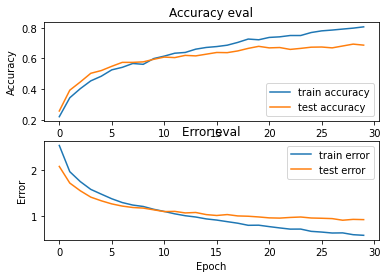

47/47 - 1s - loss: 0.8804 - accuracy: 0.6896 - 725ms/epoch - 15ms/step

Test accuracy: 0.6895861029624939


In [71]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test, z = prepare_datasets(0.25, 0.2)

# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

# plot accuracy/error for training and validation
plot_history(history)

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)



In [81]:
X_to_predict = X_test[100]
y_to_predict = y_test[100]

predict(model, X_to_predict, y_to_predict)

1/1 [==============================] - 0s 34ms/step
Target: country, Predicted label: ['country']
